In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import ee
import geemap
Map= geemap.Map()

In [2]:
lake=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALTM_ALAP_Sta_coordinates')

In [3]:
print(lake.size().getInfo())
print(lake.aggregate_array('Name').distinct().getInfo())
print(lake.first().propertyNames().getInfo())

199
['Eighth Lake', 'Fawn Lake', 'Fifth Lake', 'Fourth Lake', 'Heavens Lake', 'Lake Algonquin', 'Lake Eaton', 'Lake Madeleine', 'Lake Placid', 'Lake Pleasant', 'Lower St. Regis Lake', 'Morehouse Lake', 'Oxbow Lake', 'Sacandaga Lake', 'Seventh Lake', 'Spitfire Lake', 'Spy Lake', 'Upper St. Regis Lake', 'Barnes Lake', 'Big Hope Pond', 'Brook Trout Lake', 'Constable Pond', 'Grass Pond (3)', 'Little Echo Pond', 'Loon Hollow Pond', 'Otter Lake', 'Sochia Pond', 'South Lake (East Branch)', 'Squash Pond', 'Sunday Pond', 'West Pond', 'Willis Lake', 'Windfall Pond', 'Middle Pond*', 'Carry Pond', 'Little Clear Pond', 'Little Hope Pond*', 'Heart Lake', 'Limekiln Lake', 'Avalanche Lake', 'Cascade Lake', 'Grass Pond', 'Little Simon Pond*', 'Long Pond', 'Nate Pond*', 'Raquette Lake Reservoir*', 'Sagamore Lake*', 'Lake Rondaxe', 'Dart Lake', 'G Lake', 'Indian Lake', 'Jockeybush Lake', 'Lake Colden', 'Lost Pond*', 'Middle Branch Lake', 'Middle Settlement Lake', 'North Lake', 'Queer Lake', 'Squaw Lake',

In [4]:
# Function to create a five-sided polygon around the latitude and longitude
import ee
import geemap

# Function to create a five-sided polygon around the latitude and longitude
def create_lake_polygon(lat, lon):
    # Assuming each pixel is approximately 20 meters in size
    buffer_distance_meters = 3 * 20

    
    # Convert buffer distance from meters to degrees (approximate conversion)
    buffer_distance_degrees = buffer_distance_meters / 111320.0

    # Define the coordinates of the five vertices of the polygon
    coordinates = [
        [lon, lat + buffer_distance_degrees],
        [lon + buffer_distance_degrees, lat + buffer_distance_degrees / 2],
        [lon + buffer_distance_degrees / 2, lat - buffer_distance_degrees / 2],
        [lon - buffer_distance_degrees / 2, lat - buffer_distance_degrees / 2],
        [lon - buffer_distance_degrees, lat + buffer_distance_degrees / 2]
    ]

    # Create the polygon geometry
    polygon = ee.Geometry.Polygon(coordinates)

    return polygon

In [5]:
all_lakes=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALAP-ALTM-Lakes-195')
Map.addLayer(all_lakes)
Map.centerObject(all_lakes,16)
Map

Map(center=[44.06877752167093, -74.34748015610103], controls=(WidgetControl(options=['position', 'transparent_…

In [6]:
lake=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALTM_ALAP_Sta_coordinates')\
         .filter(ee.Filter.eq('Name', 'Big Moose Lake'))
lat = ee.Number(lake.first().geometry().coordinates().get(1)).getInfo()
lon = ee.Number(lake.first().geometry().coordinates().get(0)).getInfo()
lake_polygon = ee.Geometry.Point(lon, lat).buffer(100)
Map.addLayer(lake_polygon)
Map.centerObject(lake_polygon,16)
Map

Map(center=[43.83220986995713, -74.84650167925649], controls=(WidgetControl(options=['position', 'transparent_…

In [7]:
ee.Initialize()

lake_names = ['Eighth Lake', 'Fawn Lake', 'Fifth Lake', 'Fourth Lake', 'Heavens Lake', 'Lake Algonquin', 'Lake Eaton', 'Lake Madeleine', 'Lake Placid', 'Lake Pleasant', 'Lower St. Regis Lake', 'Morehouse Lake', 'Oxbow Lake', 'Sacandaga Lake', 'Seventh Lake', 'Spitfire Lake', 'Spy Lake', 'Upper St. Regis Lake', 'Barnes Lake', 'Big Hope Pond', 'Brook Trout Lake', 'Constable Pond', 'Grass Pond (3)', 'Little Echo Pond', 'Loon Hollow Pond', 'Otter Lake', 'Sochia Pond', 'South Lake (East Branch)', 'Squash Pond', 'Sunday Pond', 'West Pond', 'Willis Lake', 'Windfall Pond', 'Middle Pond*', 'Carry Pond', 'Little Clear Pond', 'Little Hope Pond*', 'Heart Lake', 'Limekiln Lake', 'Avalanche Lake', 'Cascade Lake', 'Grass Pond', 'Little Simon Pond*', 'Long Pond', 'Nate Pond*', 'Raquette Lake Reservoir*', 'Sagamore Lake*', 'Lake Rondaxe', 'Dart Lake', 'G Lake', 'Indian Lake', 'Jockeybush Lake', 'Lake Colden', 'Lost Pond*', 'Middle Branch Lake', 'Middle Settlement Lake', 'North Lake', 'Queer Lake', 'Squaw Lake', 'Willys Lake', 'Woods Lake', 'Owen Pond', 'Amber Lake', 'Lake of the Pines', 'Lake Roxanne', 'Alford Pond', 'Augur Lake', 'Austin Pond', 'Big Cherry Patch Pond', 'Butternut Pond', "Chase's Lake", 'Cranberry Lake', 'Echo Lake', 'Eli Pond', 'Fern Lake', 'Fish Creek East', 'Fish Creek Pond', 'Fish Creek West', 'Floodwood Pond', 'Franklin Falls Reservoir', 'Green Lake', 'Green Pond', 'Hidden Lake', 'Highlands Forge Lake', 'Horseshoe Pond', 'Indian Lake- Franklin County', 'Indian Lake- Hamilton County', 'Irving Pond', 'Jabe Pond', 'Jordan Lake', 'Lake Abanakee', 'Lake Adirondack', 'Lake Alice 2', 'Lake Colby', 'Lake Everest', 'Lake Flower', 'Lake Titus', 'Lens Lake', 'Little Polliwog Pond', 'Little Rainbow Pond', 'Little Square Pond', 'Long Pond- Essex County', 'Long Pond- Franklin County', 'Loon Lake- Warren County', 'Lower Ausable Lake', 'Lower Beaver Pond', 'Lower Chateaugay Lake', 'McCauley Pond', 'Middle Saranac Lake', 'Moody Pond', 'Mountain View Lake', 'Oseetah Lake', 'Osgood Pond', 'Otter Pond', 'Owl Pond', 'Penfield Pond', 'Putnam Pond', 'Ragged Lake', 'Rainbow Lake', 'Rat Pond', 'Rollins Pond', 'Rush Pond', 'Slang Pond', 'Trout Pond', 'Union Falls Reservoir', 'Upper Chateaugay Lake', 'Upper Saranac Lake', 'Whey Pond', 'Windover Lake', 'Hewitt Lake', 'Bartlett Pond', 'Blue Mountain Lake', 'Bone Pond', 'Brandreth Lake', 'Canada Lake', 'Catlin Lake', 'Chapel Pond', 'Chazy Lake', 'Connery Pond', 'Deer Lake', 'Eagle Lake', 'East Caroga Lake', 'East Pine Pond', 'Follensby Clear Pond', 'Frank Pond', 'Friends Lake', 'Garnet Lake', 'Gordon Pond', 'Gull Pond', 'Hoel Pond', 'Holcomb Pond', 'Kiwassa Lake', 'Lake Alice', 'Lake Clear', 'Lake Durant', 'Lake Kushaqua', 'Little Green Pond', 'Little Jabe Pond', 'Little Long Lake', 'Long Lake', 'Loon Lake- Franklin County', 'Lower Cascade Lake', 'Lower Saranac Lake', 'Mink Pond', 'Mirror Lake', 'Moose Pond', 'Paradox Lake', 'Pine Lake', 'Pine Pond', 'Pleasant Lake', 'Polliwog Pond', 'Raquette Lake', 'Rich Lake', 'Round Pond', 'Schroon Lake', 'Silver Lake', 'Simon Pond', 'Split Rock Pond', 'Star Lake', 'Stony Creek Pond', 'Taylor Pond', 'Thirteenth Lake', 'Tripp Lake', 'Trout Lake', 'Tupper Lake', 'Turtle Pond', 'Twitchell Lake', 'Upper Ausable Lake', 'Upper Cascade Lake', 'West Caroga Lake', 'White Lake', 'Wolf Lake', 'Zack Pond', 'Copperas Pond', 'Arbutus Pond', 'Moss Lake', 'Big Moose Lake', 'Black Pond', 
              'Clear Pond']

# Define the Landsat 5 bands and their corresponding standard names
LC5_BANDS = ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7', 'ST_B6', 'QA_PIXEL']
LC8_BANDS = ['SR_B2','SR_B3','SR_B4',  'SR_B5','SR_B6','SR_B7','ST_B10','QA_PIXEL']; #Landsat 8
STD_NAMES = ['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'temp', 'QA']

all_lakes=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALAP-ALTM-Lakes-195')

# Define a function to mask clouds and cloud shadows from Landsat 5 surface reflectance imagery
def maskL457sr(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)

    # qa_values_to_filter = [5440,5504]
    
    waterMask= image.select('QA_PIXEL').eq(5440).Or(image.select('QA_PIXEL').eq(5504))

    # mask = image.select('QA_PIXEL').eq(qa_values_to_filter[0])
    # for qa_value in qa_values_to_filter[1:]:
    #     mask = mask.Or(image.select('QA_PIXEL').eq(qa_value))

    # filtered_image = image.updateMask(mask)

    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBand = image.select('ST_B6').multiply(0.00341802).add(-124.15)
    return image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask).updateMask(waterMask).clip(all_lakes)


def maskL8sr(image):
    # Bit 0 - Fill
    # Bit 1 - Dilated Cloud
    # Bit 2 - Cirrus
    # Bit 3 - Cloud
    # Bit 4 - Cloud Shadow
    # Bit 5 - water
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)

    waterMask= image.select('QA_PIXEL').eq(21952).Or(image.select('QA_PIXEL').eq(21824))
    
    # # Specify the QA values to filter
    # qa_values_to_filter = [21824, 21952]
    # #22080 This is mid confidence cloud, it can be filtered in a different way
    
    # # Create a mask for the specified QA values
    # mask = image.select('QA_PIXEL').eq(qa_values_to_filter[0])
    # for qa_value in qa_values_to_filter[1:]:
    #     mask = mask.Or(image.select('QA_PIXEL').eq(qa_value))

    # # Apply the mask to filter the image
    # filtered_image = image.updateMask(mask)
     # Apply the scaling factors to the appropriate bands.
    opticalBands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBands = image.select('ST_B.*').multiply(0.00341802).add(-124.15)

    # Replace the original bands with the scaled ones and apply the masks.
    return image.addBands(opticalBands, None, True) \
        .addBands(thermalBands, None, True) \
        .updateMask(qaMask) \
        .updateMask(saturationMask)\
        .updateMask(waterMask)\
        .clip(all_lakes)



# Define a function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake):
    reflectance_values = img.reduceRegion(reducer=ee.Reducer.median(), geometry=lake_polygon, scale=30).select(STD_NAMES)
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)

# Initialize an empty list to store the dataframes for each lake
dfs = []

# Create a dictionary to map each lake name to a numerical label
lake_name_to_label = {lake_name: i for i, lake_name in enumerate(lake_names)}



# Loop through each lake name and retrieve Landsat 5 imagery for that lake
for SITE_NAME in lake_names:
    # Retrieve the lake using the filter
    lake=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALTM_ALAP_Sta_coordinates')\
         .filter(ee.Filter.eq('Name', SITE_NAME))

   
    # Get the latitude and longitude of the station point
    lat = ee.Number(lake.first().geometry().coordinates().get(1)).getInfo()
    lon = ee.Number(lake.first().geometry().coordinates().get(0)).getInfo()

     # Create a polygon around the station point using the latitude and longitude
    #lake_polygon = create_lake_polygon(lon, lat).buffer(1000)
    lake_polygon = ee.Geometry.Point(lon, lat).buffer(100)

    # Retrieve Landsat 5 imagery for the specific lake
    l5 = ee.ImageCollection('LANDSAT/LT05/C02/T1_L2') \
        .filter(ee.Filter.calendarRange(5, 12, 'month')) \
        .filter(ee.Filter.calendarRange(1985, 2011, 'year')) \
        .filterBounds(lake_polygon) \
        .filter(ee.Filter.lt('CLOUD_COVER', 25)) \
        .map(maskL457sr) \
        .select(LC5_BANDS, STD_NAMES)

    l8 =ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
            .filter(ee.Filter.calendarRange(5, 12, 'month')) \
            .filterBounds(lake_polygon) \
            .filter(ee.Filter.lt('CLOUD_COVER', 25)) \
            .map(maskL8sr) \
            .select(LC8_BANDS, STD_NAMES)
        
    #merge landsat 5 and landsat 8
    lall = ee.ImageCollection(l5.merge(l8));

    # Map the reflectance function over the Landsat 5 ImageCollection for the specific lake
    map_reflectance = lall.map(lambda img: reflectance(img, lake_polygon))

    # Reduce the mapped image collection to get reflectance values for the specific lake
    list_reflectance = map_reflectance.reduceColumns(ee.Reducer.toList(2), ['DATE_SMP', 'reflectance']).values().get(0)

    # Convert the results to a pandas DataFrame
    df_reflectance = pd.DataFrame(list_reflectance.getInfo(), columns=['DATE_SMP', 'reflectance'])
    df_reflectance['DATE_SMP'] = pd.to_datetime(df_reflectance['DATE_SMP'])
    df_reflectance['DATE_SMP'] = df_reflectance['DATE_SMP'].dt.date
    df_reflectance['reflectance'] = df_reflectance['reflectance'].apply(lambda x: {k: v for k, v in x.items() if v is not None})

    # Unpack the 'reflectance' dictionary and create separate columns for each band
    df_reflectance = pd.concat([df_reflectance.drop('reflectance', axis=1),
                                df_reflectance['reflectance'].apply(pd.Series).astype('float64', errors='ignore')], axis=1)

    # Add a new column for the lake name
    df_reflectance['SITE_NAME'] = SITE_NAME

    # Add a new column for the lake label (numeric representation)
    df_reflectance['LAKE_LABEL'] = lake_name_to_label[SITE_NAME]

    # Add the DataFrame to the list
    dfs.append(df_reflectance)


# Concatenate all DataFrames into a single DataFrame
df_all_lakes = pd.concat(dfs, ignore_index=True)

# Sort the DataFrame by 'DATE_SMP' in ascending order
df_all_lakes.sort_values(by='DATE_SMP', inplace=True)

df_all_lakes.dropna(inplace=True)

df_all_lakes

#36361 rows × 11 columns

DATE_SMP       QA      blue     green       nir       red     swir1  \
33523  1985-06-04   5440.0  0.049315  0.063505  0.135225  0.053742  0.064385   
43730  1985-06-04   5440.0  0.037628  0.045025  0.108220  0.041175  0.049150   
22281  1985-06-04   5440.0  0.044970  0.057812  0.111712  0.045245  0.051432   
34430  1985-06-04   5440.0  0.026325  0.038782  0.077172  0.029213  0.033392   
34704  1985-06-04   5440.0  0.027480  0.038178  0.069802  0.028553  0.026050   
...           ...      ...       ...       ...       ...       ...       ...   
50512  2023-10-03  21952.0  0.002180  0.004848  0.004325  0.001630  0.003142   
31184  2023-10-03  21952.0  0.005370  0.012712  0.015957  0.009605  0.008917   
40706  2023-10-03  21824.0  0.007900  0.033172  0.065650  0.031330  0.041175   
12746  2023-10-03  21952.0  0.002537  0.006387  0.006717  0.001795  0.004463   
5124   2023-10-03  21952.0  0.001740  0.004298  0.006717  0.001383  0.004298   

          swir2       temp                 SITE_NAME  LAKE_LABEL  
33523  0.039112   0.512025               Osgood Pond         112  
43730  0.028443   7.177164                 Gull Pond         148  
22281  0.031990   4.723026            Cranberry Lake          71  
34430  0.021815  16.976628             Penfield Pond         115  
34704  0.014967  12.461423               Putnam Pond         116  
...         ...        ...                       ...         ...  
50512  0.002592  19.864855             Raquette Lake         171  
31184  0.005562  18.535245  Loon Lake- Warren County         103  
40706  0.031192  12.451169                Chazy Lake         137  
12746  0.003170  20.442500             Limekiln Lake          38  
5124   0.003170  20.117788              Seventh Lake          14  

[45038 rows x 11 columns]

In [8]:
df_all_lakes[df_all_lakes['LAKE_LABEL'] == 112]

DATE_SMP       QA      blue     green       nir       red     swir1  \
33523  1985-06-04   5440.0  0.049315  0.063505  0.135225  0.053742  0.064385   
33612  1985-07-13   5504.0  0.017058  0.023987  0.031633  0.018597  0.008532   
33524  1985-07-22   5504.0  0.018185  0.024400  0.031715  0.018515  0.010898   
33613  1985-09-15   5504.0  0.011310  0.015407  0.018267  0.011970  0.001823   
33525  1985-10-26   5504.0  0.011090  0.017168  0.008340  0.009797  0.002565   
...           ...      ...       ...       ...       ...       ...       ...   
33821  2023-05-19  21824.0  0.020687  0.038013  0.054925  0.029268  0.027122   
33769  2023-05-28  21952.0  0.013428  0.017415  0.022833  0.012547  0.007983   
33823  2023-06-20  21952.0  0.004325  0.011447  0.018405  0.007818  0.007598   
33824  2023-07-06  21952.0  0.014802  0.018597  0.026710  0.016122  0.014445   
33770  2023-07-15  21824.0  0.016975  0.021072  0.038672  0.014692  0.010100   

          swir2       temp    SITE_NAME  LAKE_LABEL  
33523  0.039112   0.512025  Osgood Pond         112  
33612  0.005507  20.794556  Osgood Pond         112  
33524  0.009055  21.700331  Osgood Pond         112  
33613 -0.001615  16.781801  Osgood Pond         112  
33525 -0.002220   8.766544  Osgood Pond         112  
...         ...        ...          ...         ...  
33821  0.021045  14.891636  Osgood Pond         112  
33769  0.005205  20.398066  Osgood Pond         112  
33823  0.006085  21.433726  Osgood Pond         112  
33824  0.011585  28.563716  Osgood Pond         112  
33770  0.005370  24.301445  Osgood Pond         112  

[227 rows x 11 columns]

In [9]:
df_all_lakes['SITE_NAME'] = df_all_lakes['SITE_NAME'].str.replace('*', '')
df_all_lakes

DATE_SMP       QA      blue     green       nir       red     swir1  \
33523  1985-06-04   5440.0  0.049315  0.063505  0.135225  0.053742  0.064385   
43730  1985-06-04   5440.0  0.037628  0.045025  0.108220  0.041175  0.049150   
22281  1985-06-04   5440.0  0.044970  0.057812  0.111712  0.045245  0.051432   
34430  1985-06-04   5440.0  0.026325  0.038782  0.077172  0.029213  0.033392   
34704  1985-06-04   5440.0  0.027480  0.038178  0.069802  0.028553  0.026050   
...           ...      ...       ...       ...       ...       ...       ...   
50512  2023-10-03  21952.0  0.002180  0.004848  0.004325  0.001630  0.003142   
31184  2023-10-03  21952.0  0.005370  0.012712  0.015957  0.009605  0.008917   
40706  2023-10-03  21824.0  0.007900  0.033172  0.065650  0.031330  0.041175   
12746  2023-10-03  21952.0  0.002537  0.006387  0.006717  0.001795  0.004463   
5124   2023-10-03  21952.0  0.001740  0.004298  0.006717  0.001383  0.004298   

          swir2       temp                 SITE_NAME  LAKE_LABEL  
33523  0.039112   0.512025               Osgood Pond         112  
43730  0.028443   7.177164                 Gull Pond         148  
22281  0.031990   4.723026            Cranberry Lake          71  
34430  0.021815  16.976628             Penfield Pond         115  
34704  0.014967  12.461423               Putnam Pond         116  
...         ...        ...                       ...         ...  
50512  0.002592  19.864855             Raquette Lake         171  
31184  0.005562  18.535245  Loon Lake- Warren County         103  
40706  0.031192  12.451169                Chazy Lake         137  
12746  0.003170  20.442500             Limekiln Lake          38  
5124   0.003170  20.117788              Seventh Lake          14  

[45038 rows x 11 columns]

In [10]:
# Remove duplicates in the 'SITE_NAME' column
unique_lake_names = df_all_lakes['SITE_NAME'].drop_duplicates()

# Count the number of unique lake names
num_unique_lakes = unique_lake_names.nunique()

# Print the unique lake names and the count
print(f"Number of Unique Lakes: {num_unique_lakes}")

#output:Number of Unique Lakes: 199
#after dropping null values the lakes are still 199

Number of Unique Lakes: 196


In [11]:
import pandas as pd

# Assuming df_all_lakes is your DataFrame

df_all_lakes['MNDWI'] = (df_all_lakes['green'] - df_all_lakes['swir1']) / (df_all_lakes['green'] + df_all_lakes['swir1'])

df_all_lakes = df_all_lakes[(df_all_lakes['MNDWI'] > 0.2)]

    
#greater than .2 

In [12]:
df_all_lakes

DATE_SMP       QA      blue     green       nir       red     swir1  \
48809  1985-06-04   5440.0  0.021870  0.029762  0.058748  0.021375  0.018735   
54515  1985-07-13   5504.0  0.016453  0.023300  0.027452  0.014885  0.005810   
25585  1985-07-13   5504.0  0.018075  0.023602  0.027837  0.012190  0.008450   
36415  1985-07-13   5440.0  0.012987  0.017690  0.031990  0.013070  0.006250   
28459  1985-07-13   5504.0  0.016343  0.020028  0.031385  0.015187  0.008422   
...           ...      ...       ...       ...       ...       ...       ...   
39496  2023-10-03  21952.0  0.008560  0.010925  0.011640  0.007102  0.005810   
32257  2023-10-03  21952.0  0.013978  0.016040  0.017662  0.013758  0.008560   
52311  2023-10-03  21952.0  0.007020  0.011750  0.014390  0.007900  0.007350   
40239  2023-10-03  21952.0  0.007350  0.011090  0.012987  0.009275  0.006222   
50512  2023-10-03  21952.0  0.002180  0.004848  0.004325  0.001630  0.003142   

          swir2       temp        SITE_NAME  LAKE_LABEL     MNDWI  
48809  0.011530  15.756395     Paradox Lake         166  0.227383  
54515  0.001905  20.791138   Twitchell Lake         186  0.600824  
25585  0.005480  21.351693   Horseshoe Pond          84  0.472740  
36415  0.002098  21.454234       Slang Pond         122  0.477861  
28459  0.005480  20.210075       Lake Colby          93  0.407909  
...         ...        ...              ...         ...       ...  
39496  0.003362  19.769150   Brandreth Lake         133  0.305647  
32257  0.005288  19.099218    McCauley Pond         107  0.304065  
52311  0.004160  21.167120  Split Rock Pond         177  0.230366  
40239  0.003582  21.597791      Catlin Lake         135  0.281155  
50512  0.002592  19.864855    Raquette Lake         171  0.213392  

[28736 rows x 12 columns]

In [13]:
# df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
# df_all_lakes.set_index('DATE_SMP', inplace=True)
# import matplotlib.pyplot as plt

# df_all_lakes['MNDWI'].plot(figsize=(10, 6))
# plt.title('MNDWI Time Series')
# plt.xlabel('Date')
# plt.ylabel('MNDWI Value')
# plt.show()


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
# df_all_lakes.set_index('DATE_SMP', inplace=True)

# Calculate the three-year rolling average
three_year_avg = df_all_lakes['MNDWI'].rolling(window='365D').mean()

# Extract data for the specified months (May and June)
may_june_1988_to_1990 = df_all_lakes['MNDWI']['1985-09-01':'1985-10-30']
may_june_2018_to_2020 = df_all_lakes['MNDWI']['2020-09-01':'2020-10-30']

# Plot the histogram with different color bars and raw counts
plt.hist([may_june_1988_to_1990.dropna(), may_june_2018_to_2020.dropna()], bins=20, edgecolor='black', color=['blue', 'orange'], label=['1988-1990', '2018-2020'], density=False)
plt.title('Histogram of Three-Year Average MNDWI (May-June)')
plt.xlabel('MNDWI Three-Year Average')
plt.ylabel('Count')
plt.legend()
plt.show()


ValueError: window must be an integer 0 or greater

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the three-year rolling average
three_year_avg = df_all_lakes['MNDWI'].rolling(window='365D').mean()

# Extract data for July and August for each year (1988, 1989, 1990)
july_august_1988_to_1990 = three_year_avg['1988-07-01':'1990-08-31']
july_august_2018_to_2020 = three_year_avg['2018-07-01':'2020-08-31']

# Plot the histograms for each year with different color bars and raw counts
plt.hist([july_august_1988_to_1990.dropna(), july_august_2018_to_2020.dropna()], bins=20, edgecolor='black', color=['blue', 'orange'], label=['1988-1990', '2018-2020'], density=False)
plt.title('Histogram of Three-Year Average MNDWI (July-August)')
plt.xlabel('MNDWI Three-Year Average')
plt.ylabel('Count')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the three-year rolling average
three_year_avg = df_all_lakes['MNDWI'].rolling(window='365D').mean()

# Extract data for September and October for each year (1988, 1989, 1990)
sep_oct_1988_to_1990 = three_year_avg['1988-09-01':'1990-10-31']
sep_oct_2018_to_2020 = three_year_avg['2018-09-01':'2020-10-31']

# Plot the histograms for each year with different color bars and raw counts
plt.hist([sep_oct_1988_to_1990.dropna(), sep_oct_2018_to_2020.dropna()], bins=20, edgecolor='black', color=['blue', 'orange'], label=['1988-1990', '2018-2020'], density=False)
plt.title('Histogram of Three-Year Average MNDWI (September-October)')
plt.xlabel('MNDWI Three-Year Average')
plt.ylabel('Count')
plt.legend()
plt.show()


In [ ]:
import pandas as pd


# Read the Excel file
data_excel = pd.read_excel("LTM_Data_2023_3_9 (2).xlsx", usecols=['DOC_MG_L', 'SITE_ID', 'DATE_SMP', 'SAMPLE_LOCATION'])
data_excel_site = pd.read_excel("Site_Information_2022_8_1 (2).xlsx", usecols=['SITE_ID', 'PROGRAM_ID', 'SITE_NAME','LAKE_DEPTH_MEAN'])

data_second_sheet_COORD = pd.read_excel("ALTM-50-stations (1).xlsx",
                                 sheet_name='updated station coordinates', usecols=['SITE_ID', 'LATDD', 'LONDD','LATDD_CENT','LONDD_CENT','SITE_NAME'])

# Merge the two DataFrames based on the common column 'SITE_ID'
merged_data_excel = pd.merge(data_excel, data_excel_site, on=['SITE_ID'])
merged_data_combined = pd.merge(merged_data_excel, data_second_sheet_COORD, on=['SITE_ID', 'SITE_NAME'])

data_modified = merged_data_combined.drop(columns=['SAMPLE_LOCATION'])


#pd.set_option('display.max_rows', None)
# Display the merged DataFrame
(data_modified)


In [11]:
data_ALAP = pd.read_excel("AWI-ADK.xlsx", usecols=['AWI Site ID', 'AWI Waterbody ID', 'Waterbody Name', 'Parameter','Sample Date','Reported Value','Units'])
doc_data = data_ALAP[data_ALAP['Parameter'] == 'Dissolved Organic Carbon']


doc_data

AWI Site ID AWI Waterbody ID        Waterbody Name Sample Date  \
62    AWI00001.1         AWI00001  Lower St. Regis Lake  2017-06-21   
65    AWI00001.1         AWI00001  Lower St. Regis Lake  2017-07-21   
68    AWI00001.1         AWI00001  Lower St. Regis Lake  2017-08-03   
71    AWI00001.1         AWI00001  Lower St. Regis Lake  2017-08-30   
74    AWI00001.1         AWI00001  Lower St. Regis Lake  2017-09-27   
...          ...              ...                   ...         ...   
8720  AWI00318.1         AWI00318            Green Lake  2022-07-20   
8723  AWI00318.1         AWI00318            Green Lake  2022-08-15   
8726  AWI00319.1         AWI00319           Ragged Lake  2022-08-12   
8729  AWI00319.1         AWI00319           Ragged Lake  2022-09-17   
8732  AWI00319.1         AWI00319           Ragged Lake  2022-10-11   

                     Parameter  Reported Value Units  
62    Dissolved Organic Carbon           4.510  mg/L  
65    Dissolved Organic Carbon           6.060  mg/L  
68    Dissolved Organic Carbon           6.110  mg/L  
71    Dissolved Organic Carbon           5.970  mg/L  
74    Dissolved Organic Carbon           5.600  mg/L  
...                        ...             ...   ...  
8720  Dissolved Organic Carbon           2.671  mg/L  
8723  Dissolved Organic Carbon           2.782  mg/L  
8726  Dissolved Organic Carbon          11.710  mg/L  
8729  Dissolved Organic Carbon          11.500  mg/L  
8732  Dissolved Organic Carbon          11.940  mg/L  

[1725 rows x 7 columns]

In [12]:
alap_data= pd.read_excel("ALAP_DATA (1).xlsx")
alap_data.rename(columns={'LAKE_NAME': 'Waterbody Name'}, inplace=True)
alap_data = alap_data[~alap_data.applymap(lambda x: isinstance(x, (str, bytes)) and '-' in x).any(axis=1)]

alap_data

WATERBODY_ID        Waterbody Name        LAT        LON  LAKE_DEPTH (m)  \
0       AWI00001  Lower St. Regis Lake  44.427034 -74.248048            11.6   
1       AWI00002         Spitfire Lake  44.417981 -74.269630             9.4   
2       AWI00003  Upper St. Regis Lake  44.408394 -74.285134            20.1   
3       AWI00004        Butternut Pond  44.430696 -73.495663             6.3   
4       AWI00006           Osgood Pond  44.451070 -74.228505             4.6   
..           ...                   ...        ...        ...             ...   
157     AWI00262             Whey Pond  44.307694 -74.392854             6.1   
158     AWI00263      West Caroga Lake  43.137154 -74.495462            21.3   
160     AWI00317         Bartlett Pond  44.106152 -73.511043             6.1   
161     AWI00318           Green Lake   43.175716 -74.506639            16.7   
162     AWI00319           Ragged Lake  44.718620 -74.069780            15.2   

     SURFACE_AREA (ha) TROPHIC_STATE  
0                  NaN   Mesotrophic  
1                  NaN   Mesotrophic  
2                  NaN   Mesotrophic  
3                 65.8  Oligotrophic  
4                108.0   Mesotrophic  
..                 ...           ...  
157               47.4   Mesotrophic  
158              129.0  Oligotrophic  
160               40.0  Oligotrophic  
161                NaN  Oligotrophic  
162                NaN   Mesotrophic  

[157 rows x 7 columns]

In [13]:
merged_alap_excel = pd.merge(doc_data, alap_data, on=['Waterbody Name'])
merged_alap_excel.rename(columns={'AWI Waterbody ID': 'SITE_ID' }, inplace=True)
merged_alap_excel.rename(columns={'Waterbody Name': 'SITE_NAME' }, inplace=True)
merged_alap_excel.rename(columns={'Reported Value': 'DOC_MG_L'}, inplace=True)
merged_alap_excel.rename(columns={'LAKE_DEPTH (m)': 'LAKE_DEPTH_MEAN'}, inplace=True)
merged_alap_excel.rename(columns={'Sample Date': 'DATE_SMP'}, inplace=True)
merged_alap_excel = merged_alap_excel[~merged_alap_excel.applymap(lambda x: isinstance(x, (str, bytes)) and '-' in x).any(axis=1)]

selected_columns_alap = merged_alap_excel[['SITE_ID', 'DATE_SMP', 'DOC_MG_L', 'SITE_NAME', 'LAKE_DEPTH_MEAN']]
selected_columns_alap


SITE_ID   DATE_SMP  DOC_MG_L             SITE_NAME  LAKE_DEPTH_MEAN
0     AWI00001 2017-06-21     4.510  Lower St. Regis Lake             11.6
1     AWI00001 2017-07-21     6.060  Lower St. Regis Lake             11.6
2     AWI00001 2017-08-03     6.110  Lower St. Regis Lake             11.6
3     AWI00001 2017-08-30     5.970  Lower St. Regis Lake             11.6
4     AWI00001 2017-09-27     5.600  Lower St. Regis Lake             11.6
...        ...        ...       ...                   ...              ...
1571  AWI00317 2022-08-16     4.685         Bartlett Pond              6.1
1572  AWI00317 2022-09-20     4.532         Bartlett Pond              6.1
1573  AWI00319 2022-08-12    11.710           Ragged Lake             15.2
1574  AWI00319 2022-09-17    11.500           Ragged Lake             15.2
1575  AWI00319 2022-10-11    11.940           Ragged Lake             15.2

[1576 rows x 5 columns]

In [14]:
selected_columns_ALTM = data_modified[['SITE_ID', 'DATE_SMP', 'DOC_MG_L', 'SITE_NAME', 'LAKE_DEPTH_MEAN']]

# Divide the 'LAKE_DEPTH_MEAN' column by 100
selected_columns_ALTM['LAKE_DEPTH_MEAN'] = selected_columns_ALTM['LAKE_DEPTH_MEAN'] / 1000

selected_columns_ALTM

SITE_ID   DATE_SMP  DOC_MG_L   SITE_NAME  LAKE_DEPTH_MEAN
0       040850 1997-09-22  3.100000  Squaw Lake           0.0034
1       040850 1997-09-22  3.100000  Squaw Lake           0.0034
2       040850 1995-03-02  3.031000  Squaw Lake           0.0034
3       040850 1995-03-02  3.031000  Squaw Lake           0.0034
4       040850 1996-08-19  3.595000  Squaw Lake           0.0034
...        ...        ...       ...         ...              ...
17863  1A3-048 2011-05-18  4.283944  Grass Pond           0.0015
17864  1A3-048 2015-06-10  5.509394  Grass Pond           0.0015
17865  1A3-048 2016-07-14  4.884900  Grass Pond           0.0015
17866  1A3-048 2016-09-15  6.344000  Grass Pond           0.0015
17867  1A3-048 2017-05-10  4.644200  Grass Pond           0.0015

[17868 rows x 5 columns]

In [15]:
# merge_50_87 = pd.merge(data_modified, merged_alap_excel, on='DATE_SMP')
# merge_50_87
concatenated_df = pd.concat([selected_columns_ALTM, selected_columns_alap], axis=0, ignore_index=True)
concatenated_df.dropna(inplace=True)
concatenated_df

SITE_ID   DATE_SMP  DOC_MG_L      SITE_NAME  LAKE_DEPTH_MEAN
0        040850 1997-09-22     3.100     Squaw Lake           0.0034
1        040850 1997-09-22     3.100     Squaw Lake           0.0034
2        040850 1995-03-02     3.031     Squaw Lake           0.0034
3        040850 1995-03-02     3.031     Squaw Lake           0.0034
4        040850 1996-08-19     3.595     Squaw Lake           0.0034
...         ...        ...       ...            ...              ...
19439  AWI00317 2022-08-16     4.685  Bartlett Pond           6.1000
19440  AWI00317 2022-09-20     4.532  Bartlett Pond           6.1000
19441  AWI00319 2022-08-12    11.710    Ragged Lake          15.2000
19442  AWI00319 2022-09-17    11.500    Ragged Lake          15.2000
19443  AWI00319 2022-10-11    11.940    Ragged Lake          15.2000

[19034 rows x 5 columns]

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler



df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
concatenated_df['DATE_SMP'] = pd.to_datetime(concatenated_df['DATE_SMP'])

df_all_lakes.sort_values('DATE_SMP', inplace=True)
concatenated_df.sort_values('DATE_SMP', inplace=True)




merged_data_all = pd.merge_asof(concatenated_df, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=1))
merged_data_all['LAKE_DEPTH_MEAN'] = pd.to_numeric(merged_data_all['LAKE_DEPTH_MEAN'], errors='coerce')

# Drop rows where the 'Reflectance' column is null
merged_data_all = merged_data_all.dropna(subset=['blue'])

merged_data_all = merged_data_all.dropna(subset=['DOC_MG_L'])

# merged_data_all = merged_data_all[merged_data_all['PROGRAM_ID'] == 'LTM_ALTM']


# Display the updated DataFrame
# print(merged_data)
merged_data_all


# Preprocessing the 'DATE_SMP' column to extract useful features
merged_data_all['DATE_SMP'] = pd.to_datetime(merged_data_all['DATE_SMP'])  # Convert to datetime if not already done
merged_data_all['year'] = merged_data_all['DATE_SMP'].dt.year
merged_data_all['month'] = merged_data_all['DATE_SMP'].dt.month
merged_data_all['day'] = merged_data_all['DATE_SMP'].dt.day
# merged_data_all['day_of_week'] = merged_data_all['DATE_SMP'].dt.dayofweek

# Drop the original 'DATE_SMP' column as it is no longer needed
merged_data_all = merged_data_all.drop(columns=['DATE_SMP'])


# Calculate NDWI and MNDWI
merged_data_all['NDWI'] = (merged_data_all['green'] - merged_data_all['nir']) / (merged_data_all['green'] + merged_data_all['nir'])
merged_data_all['MNDWI'] = (merged_data_all['green'] - merged_data_all['swir1']) / (merged_data_all['green'] + merged_data_all['swir1'])


# Preparing the training data 
X = merged_data_all[['blue', 'green', 'red', 'nir', 'swir1', 'swir2','LAKE_DEPTH_MEAN']]  # Features
y = merged_data_all['DOC_MG_L']  # Target variable

# Group the data by 'LAKE_LABEL'
grouped_data = merged_data_all.groupby('LAKE_LABEL')

min_samples = 3  # Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'LAKE_DEPTH_MEAN']]
    y_lake = lake_group['DOC_MG_L']

    if len(lake_group) >= min_samples:
        # Split data into training and testing sets for the current lake
        X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

        # Append the data for the current lake to the corresponding lists
        X_train_all.append(X_train_lake)
        X_test_all.append(X_test_lake)
        y_train_all.append(y_train_lake)
        y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(random_state=42)
}

# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict DOC values for the testing data
    y_pred = model.predict(X_test)

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_DOC'] = y_train
    data_train['predicted_DOC'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_DOC'] = y_test
    data_test['predicted_DOC'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

    # Display the predicted DOC values for the training and testing data
    print(f'*************Predicted Training data ({model_name})***************')
    print(data_train)

    print(f'*************Predicted Testing data ({model_name})***************')
    print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# WITH LAKE Depth AS FEATURES 1 day window/n')
print(evaluation_df_all)

**************Data Points Used***************************
Number of rows: 566
Number of columns: 7
*************Predicted Training data (RandomForest)***************
           blue     green       red       nir     swir1     swir2  \
1067   0.034200  0.046590  0.039384  0.114770  0.056814  0.031659   
12170  0.011991  0.016333  0.010237  0.046161  0.018333  0.007146   
4932   0.030170  0.031747  0.028732  0.065089  0.041631  0.022013   
7391   0.016119  0.022642  0.013061  0.046494  0.022011  0.011367   
5996   0.020967  0.026656  0.025689  0.064158  0.055831  0.031542   
...         ...       ...       ...       ...       ...       ...   
16158  0.005525  0.012573  0.007725  0.053097  0.026194  0.012300   
6690   0.043487  0.052940  0.046750  0.100940  0.053652  0.034658   
10653  0.022824  0.029827  0.026276  0.057860  0.036012  0.024838   
16478  0.004267  0.011765  0.007953  0.051774  0.022394  0.011379   
3013   0.010439  0.019452  0.012459  0.052648  0.017115  0.008303   

     

In [17]:
# Assuming you have already trained a Random Forest model
random_forest_model = models['RandomForest']
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display the feature importances with their corresponding column names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
print("RandomForest Feature Importances:")
print(feature_importance_df)


RandomForest Feature Importances:
           Feature  Importance
0             blue    0.095848
1            green    0.097875
2              red    0.096387
3              nir    0.079901
4            swir1    0.079747
5            swir2    0.079709
6  LAKE_DEPTH_MEAN    0.470533


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler



df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
concatenated_df['DATE_SMP'] = pd.to_datetime(concatenated_df['DATE_SMP'])

df_all_lakes.sort_values('DATE_SMP', inplace=True)
concatenated_df.sort_values('DATE_SMP', inplace=True)




merged_data_all = pd.merge_asof(concatenated_df, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=3))
merged_data_all['LAKE_DEPTH_MEAN'] = pd.to_numeric(merged_data_all['LAKE_DEPTH_MEAN'], errors='coerce')

# Drop rows where the 'Reflectance' column is null
merged_data_all = merged_data_all.dropna(subset=['blue'])

merged_data_all = merged_data_all.dropna(subset=['DOC_MG_L'])

# merged_data_all = merged_data_all[merged_data_all['PROGRAM_ID'] == 'LTM_ALTM']


# Display the updated DataFrame
# print(merged_data)
merged_data_all


# Preprocessing the 'DATE_SMP' column to extract useful features
merged_data_all['DATE_SMP'] = pd.to_datetime(merged_data_all['DATE_SMP'])  # Convert to datetime if not already done
merged_data_all['year'] = merged_data_all['DATE_SMP'].dt.year
merged_data_all['month'] = merged_data_all['DATE_SMP'].dt.month
merged_data_all['day'] = merged_data_all['DATE_SMP'].dt.day
# merged_data_all['day_of_week'] = merged_data_all['DATE_SMP'].dt.dayofweek

# Drop the original 'DATE_SMP' column as it is no longer needed
merged_data_all = merged_data_all.drop(columns=['DATE_SMP'])


# Calculate NDWI and MNDWI
merged_data_all['NDWI'] = (merged_data_all['green'] - merged_data_all['nir']) / (merged_data_all['green'] + merged_data_all['nir'])
merged_data_all['MNDWI'] = (merged_data_all['green'] - merged_data_all['swir1']) / (merged_data_all['green'] + merged_data_all['swir1'])


# Preparing the training data 
X = merged_data_all[['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'LAKE_DEPTH_MEAN']]  # Features
y = merged_data_all['DOC_MG_L']  # Target variable

# Group the data by 'LAKE_LABEL'
grouped_data = merged_data_all.groupby('LAKE_LABEL')

min_samples = 3  # Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'LAKE_DEPTH_MEAN']]
    y_lake = lake_group['DOC_MG_L']

    if len(lake_group) >= min_samples:
        # Split data into training and testing sets for the current lake
        X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

        # Append the data for the current lake to the corresponding lists
        X_train_all.append(X_train_lake)
        X_test_all.append(X_test_lake)
        y_train_all.append(y_train_lake)
        y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(random_state=42)
}

# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict DOC values for the testing data
    y_pred = model.predict(X_test)

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_DOC'] = y_train
    data_train['predicted_DOC'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_DOC'] = y_test
    data_test['predicted_DOC'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

    # Display the predicted DOC values for the training and testing data
    print(f'*************Predicted Training data ({model_name})***************')
    print(data_train)

    print(f'*************Predicted Testing data ({model_name})***************')
    print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# WITH LAKE Depth AS FEATURES 3 day window/n')
print(evaluation_df_all)

**************Data Points Used***************************
Number of rows: 1048
Number of columns: 7
*************Predicted Training data (RandomForest)***************
           blue     green       red       nir     swir1     swir2  \
17782  0.036484  0.047649  0.045810  0.066877  0.050986  0.041140   
18819  0.032339  0.037500  0.032266  0.061074  0.038899  0.028077   
8073   0.034303  0.041513  0.029865  0.121285  0.033613  0.017285   
5996   0.020967  0.026656  0.025689  0.064158  0.055831  0.031542   
7393   0.016119  0.022642  0.013061  0.046494  0.022011  0.011367   
...         ...       ...       ...       ...       ...       ...   
5317   0.018085  0.024239  0.021842  0.058588  0.030508  0.015379   
8936   0.008884  0.017859  0.013183  0.055402  0.021228  0.010238   
17003  0.010499  0.018074  0.012324  0.064655  0.026784  0.012913   
12175  0.011247  0.013953  0.009566  0.032787  0.008654  0.003825   
2806   0.025227  0.030426  0.021446  0.048085  0.016711  0.009102   

    

In [19]:
# Assuming you have already trained a Random Forest model
random_forest_model = models['RandomForest']
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display the feature importances with their corresponding column names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
print("RandomForest Feature Importances:")
print(feature_importance_df)


RandomForest Feature Importances:
           Feature  Importance
0             blue    0.059688
1            green    0.069269
2              red    0.046834
3              nir    0.095885
4            swir1    0.072895
5            swir2    0.052945
6  LAKE_DEPTH_MEAN    0.602484


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler



df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
concatenated_df['DATE_SMP'] = pd.to_datetime(concatenated_df['DATE_SMP'])

df_all_lakes.sort_values('DATE_SMP', inplace=True)
concatenated_df.sort_values('DATE_SMP', inplace=True)




merged_data_all = pd.merge_asof(concatenated_df, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=7))
merged_data_all['LAKE_DEPTH_MEAN'] = pd.to_numeric(merged_data_all['LAKE_DEPTH_MEAN'], errors='coerce')

# Drop rows where the 'Reflectance' column is null
merged_data_all = merged_data_all.dropna(subset=['blue'])

merged_data_all = merged_data_all.dropna(subset=['DOC_MG_L'])

# merged_data_all = merged_data_all[merged_data_all['PROGRAM_ID'] == 'LTM_ALTM']


# Display the updated DataFrame
# print(merged_data)
merged_data_all


# Preprocessing the 'DATE_SMP' column to extract useful features
merged_data_all['DATE_SMP'] = pd.to_datetime(merged_data_all['DATE_SMP'])  # Convert to datetime if not already done
merged_data_all['year'] = merged_data_all['DATE_SMP'].dt.year
merged_data_all['month'] = merged_data_all['DATE_SMP'].dt.month
merged_data_all['day'] = merged_data_all['DATE_SMP'].dt.day
# merged_data_all['day_of_week'] = merged_data_all['DATE_SMP'].dt.dayofweek

# Drop the original 'DATE_SMP' column as it is no longer needed
merged_data_all = merged_data_all.drop(columns=['DATE_SMP'])


# Calculate NDWI and MNDWI
merged_data_all['NDWI'] = (merged_data_all['green'] - merged_data_all['nir']) / (merged_data_all['green'] + merged_data_all['nir'])
merged_data_all['MNDWI'] = (merged_data_all['green'] - merged_data_all['swir1']) / (merged_data_all['green'] + merged_data_all['swir1'])


# Preparing the training data 
X = merged_data_all[['blue', 'green', 'red', 'nir', 'swir1', 'swir2','LAKE_DEPTH_MEAN']]  # Features
y = merged_data_all['DOC_MG_L']  # Target variable

# Group the data by 'LAKE_LABEL'
grouped_data = merged_data_all.groupby('LAKE_LABEL')

min_samples = 3  # Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'LAKE_DEPTH_MEAN']]
    y_lake = lake_group['DOC_MG_L']

    if len(lake_group) >= min_samples:
        # Split data into training and testing sets for the current lake
        X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

        # Append the data for the current lake to the corresponding lists
        X_train_all.append(X_train_lake)
        X_test_all.append(X_test_lake)
        y_train_all.append(y_train_lake)
        y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(random_state=42)
}

# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict DOC values for the testing data
    y_pred = model.predict(X_test)

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_DOC'] = y_train
    data_train['predicted_DOC'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_DOC'] = y_test
    data_test['predicted_DOC'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

    # Display the predicted DOC values for the training and testing data
    print(f'*************Predicted Training data ({model_name})***************')
    print(data_train)

    print(f'*************Predicted Testing data ({model_name})***************')
    print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# WITH LAKE Depth AS FEATURES 7 day window/n')
print(evaluation_df_all)

**************Data Points Used***************************
Number of rows: 1955
Number of columns: 7
*************Predicted Training data (RandomForest)***************
           blue     green       red       nir     swir1     swir2  \
16850  0.015006  0.024685  0.015543  0.104517  0.051266  0.026048   
17809  0.010330  0.024216  0.017772  0.090241  0.053675  0.028453   
17782  0.036484  0.047649  0.045810  0.066877  0.050986  0.041140   
18819  0.032339  0.037500  0.032266  0.061074  0.038899  0.028077   
10651  0.019622  0.025856  0.022249  0.055341  0.047777  0.029118   
...         ...       ...       ...       ...       ...       ...   
16158  0.005525  0.012573  0.007725  0.053097  0.026194  0.012300   
3401   0.038370  0.045217  0.035977  0.079565  0.034135  0.026133   
10003  0.020525  0.027517  0.023491  0.063598  0.036299  0.018917   
17847  0.006944  0.014680  0.009234  0.055241  0.027778  0.014552   
15202  0.013108  0.019696  0.012692  0.060748  0.030109  0.016065   

    

In [21]:
# Assuming you have already trained a Random Forest model
random_forest_model = models['RandomForest']
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display the feature importances with their corresponding column names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
print("RandomForest Feature Importances:")
print(feature_importance_df)


RandomForest Feature Importances:
           Feature  Importance
0             blue    0.041161
1            green    0.062901
2              red    0.061234
3              nir    0.097520
4            swir1    0.057542
5            swir2    0.045200
6  LAKE_DEPTH_MEAN    0.634442


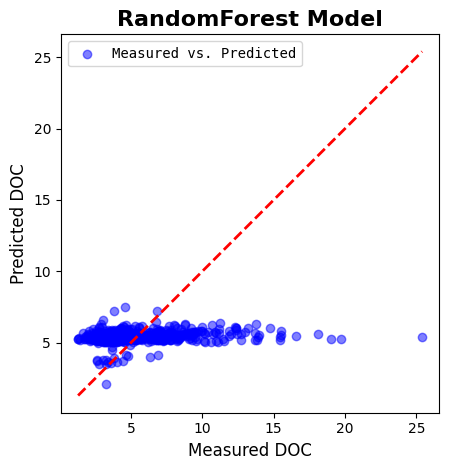

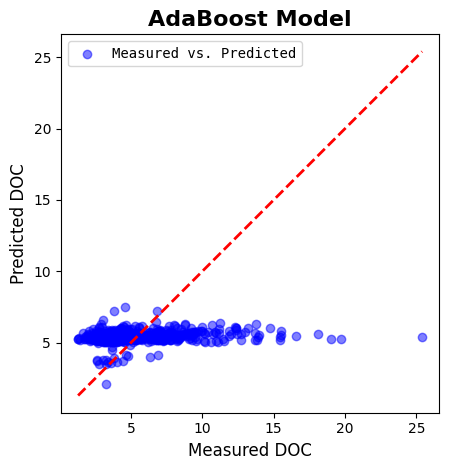

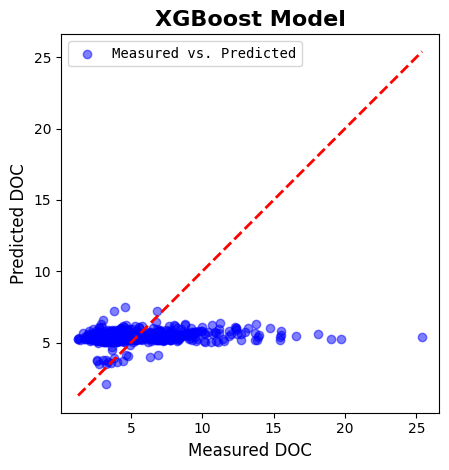

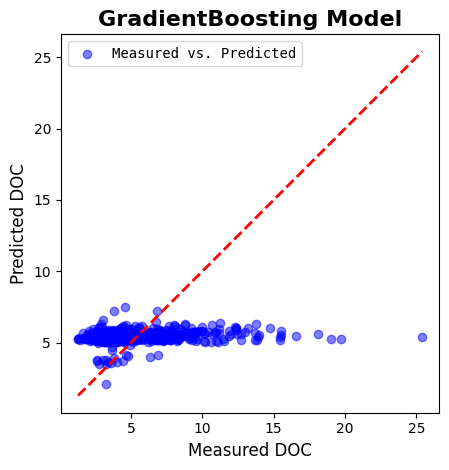

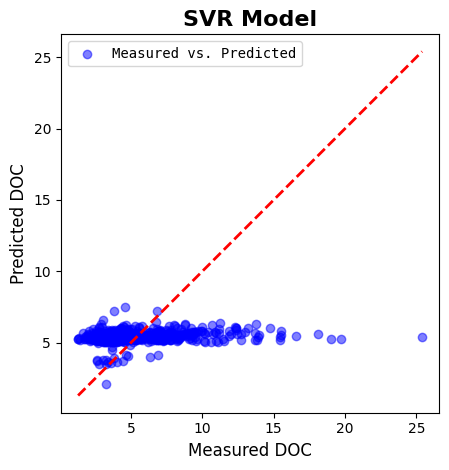

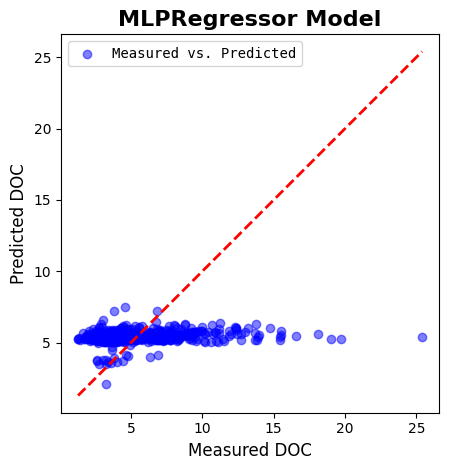

In [22]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# Initialize the font properties
title_font = font_manager.FontProperties(family='sans-serif', style='normal', size=16, weight='bold')
axis_label_font = font_manager.FontProperties(family='sans-serif', style='normal', size=12)
legend_font = font_manager.FontProperties(family='monospace', style='normal', size=10)

# Loop through each model and create the plots
for model_name, model in models.items():
    # Create a subplot for the current model
    fig, ax = plt.subplots()
    
    # Plot measured DOC vs. predicted DOC
    ax.scatter(data_test['original_DOC'], data_test['predicted_DOC'], label='Measured vs. Predicted', c='b', alpha=0.5)
    
    # Customize the plot
    ax.set_title(f'{model_name} Model', fontproperties=title_font)
    ax.set_xlabel('Measured DOC', fontproperties=axis_label_font)
    ax.set_ylabel('Predicted DOC', fontproperties=axis_label_font)
    
    # Add legend
    ax.legend(loc='upper left', prop=legend_font)

    # Set a 1:1 aspect ratio for the plot
    ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
    ax.set_aspect('equal')

    # Display the plot
    plt.tight_layout()
    plt.show()


In [23]:
import numpy as np
# Coefficients
a1 = -0.5986
a2 = 5.5510

#Martins et all (2018) landsat 5

# Calculate the B4/B1 ratio and add it as a new column to the DataFrame
df_all_lakes['B4_B1_Ratio'] = df_all_lakes['nir'] / df_all_lakes['blue']

# Apply the equation to estimate CDOM at 485 nm
df_all_lakes['aCDOM_485'] = a1 + a2 * (df_all_lakes['B4_B1_Ratio'])



In [24]:
df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
data_modified['DATE_SMP'] = pd.to_datetime(data_modified['DATE_SMP'])

data_modified.sort_values('DATE_SMP', inplace=True)
df_all_lakes.sort_values('DATE_SMP', inplace=True)


merged_data = pd.merge_asof(data_modified, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=3))
# Drop rows with null values in the merged dataframe
merged_data.dropna(inplace=True)

merged_data = merged_data.dropna(subset=['blue'])

merged_data = merged_data.dropna(subset=['DOC_MG_L'])

# merged_data = merged_data[merged_data['PROGRAM_ID'] == 'LTM_ALTM']
merged_data

SITE_ID   DATE_SMP   DOC_MG_L PROGRAM_ID         SITE_NAME  \
262    1A1-052 1985-07-22   5.000000   LTM_ALTM      Arbutus Pond   
263    1A2-077 1985-07-22   3.300000   LTM_ALTM        Clear Pond   
264    1A1-107 1985-07-22  13.800000   LTM_ALTM  Little Echo Pond   
265    1A1-102 1985-07-22   3.000000   LTM_ALTM        Heart Lake   
286    1A1-102 1985-10-26   3.300000   LTM_ALTM        Heart Lake   
...        ...        ...        ...        ...               ...   
17553  1A1-105 2020-07-07   6.066766   LTM_ALTM      Cascade Lake   
17558  1A1-110 2020-07-09   4.457849   LTM_ALTM      Lake Rondaxe   
17745  1A1-111 2021-05-06  11.240100   LTM_ALTM       Squash Pond   
17746  1A1-017 2021-05-06   8.036800   LTM_ALTM    Constable Pond   
17755   040576 2021-05-13   4.763200   LTM_ALTM        Woods Lake   

       LAKE_DEPTH_MEAN     LATDD     LONDD  LATDD_CENT  LONDD_CENT  ...  \
262                2.8  43.98230 -74.23556    43.98787   -74.24151  ...   
263                9.2  43.99568 -73.83082    43.99719   -73.82435  ...   
264                2.9  44.30576 -74.35721    44.30849   -74.35564  ...   
265                5.1  44.18050 -73.96726    44.18229   -73.96920  ...   
286                5.1  44.18050 -73.96726    44.18229   -73.96920  ...   
...                ...       ...       ...         ...         ...  ...   
17553              4.2  43.78910 -74.81204    43.79039   -74.80236  ...   
17558              3.0  43.76088 -74.91592    43.76697   -74.90136  ...   
17745              1.4  43.82557 -74.88614    43.82649   -74.88699  ...   
17746              2.1  43.83101 -74.80642    43.83290   -74.79820  ...   
17755              3.5  43.86566 -74.95512    43.87003   -74.95232  ...   

           blue     green       nir       red     swir1     swir2       temp  \
262    0.017451  0.022204  0.043193  0.016561  0.013362  0.008674  21.863874   
263    0.014135  0.019049  0.043335  0.012808  0.014010  0.009788  21.227089   
264    0.009391  0.014274  0.034940  0.007598  0.013107  0.006074  21.886970   
265    0.015236  0.021877  0.045613  0.012890  0.016889  0.008107  21.025456   
286    0.021543  0.027626  0.060076  0.024692  0.050054  0.033341   9.464886   
...         ...       ...       ...       ...       ...       ...        ...   
17553  0.018989  0.029790  0.160644  0.016706  0.069662  0.029443  26.343214   
17558  0.009677  0.025341  0.092154  0.013804  0.047167  0.021865  28.701132   
17745  0.011077  0.019255  0.084112  0.018570  0.056248  0.033294  11.411781   
17746  0.014782  0.028153  0.135874  0.025780  0.079875  0.043615   9.834784   
17755  0.026199  0.033259  0.061150  0.033764  0.065741  0.046172  14.590739   

       LAKE_LABEL  B4_B1_Ratio  aCDOM_485  
262         194.0     2.475130  13.140845  
263         198.0     3.065729  16.419260  
264          23.0     3.720795  20.055535  
265          37.0     2.993849  16.020256  
286          37.0     2.788595  14.880891  
...           ...          ...        ...  
17553        40.0     8.459851  46.362031  
17558        47.0     9.523442  52.266025  
17745        28.0     7.593103  41.550713  
17746        21.0     9.192036  50.426389  
17755        60.0     2.334074  12.357847  

[994 rows x 21 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


R^2: 0.011987968189143494
RMSE: 43.297852772620665


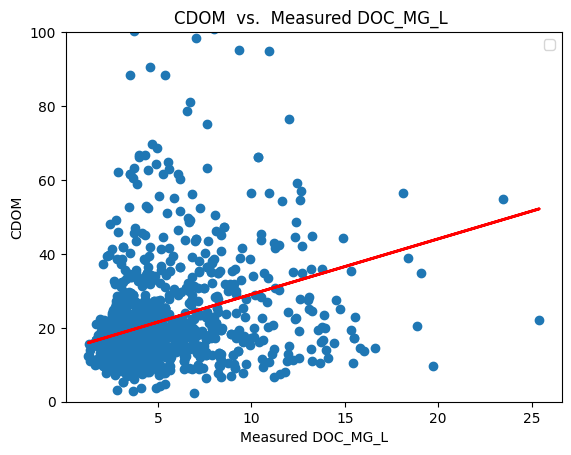

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X = merged_data['DOC_MG_L'].values.reshape(-1, 1)
y = merged_data['aCDOM_485'].values

# Create a linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Predict y values using the model
y_pred = regression_model.predict(X)

# Calculate R^2
r2 = r2_score(y, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Print R^2 and RMSE
print("R^2:", r2)
print("RMSE:", rmse)

# Plot measured DOC_MG_L against aCDOM
plt.scatter(merged_data['DOC_MG_L'], merged_data['aCDOM_485'])
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel('Measured DOC_MG_L')
plt.ylabel('CDOM')
plt.title('CDOM  vs.  Measured DOC_MG_L ')
plt.legend()
plt.ylim(0,100)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


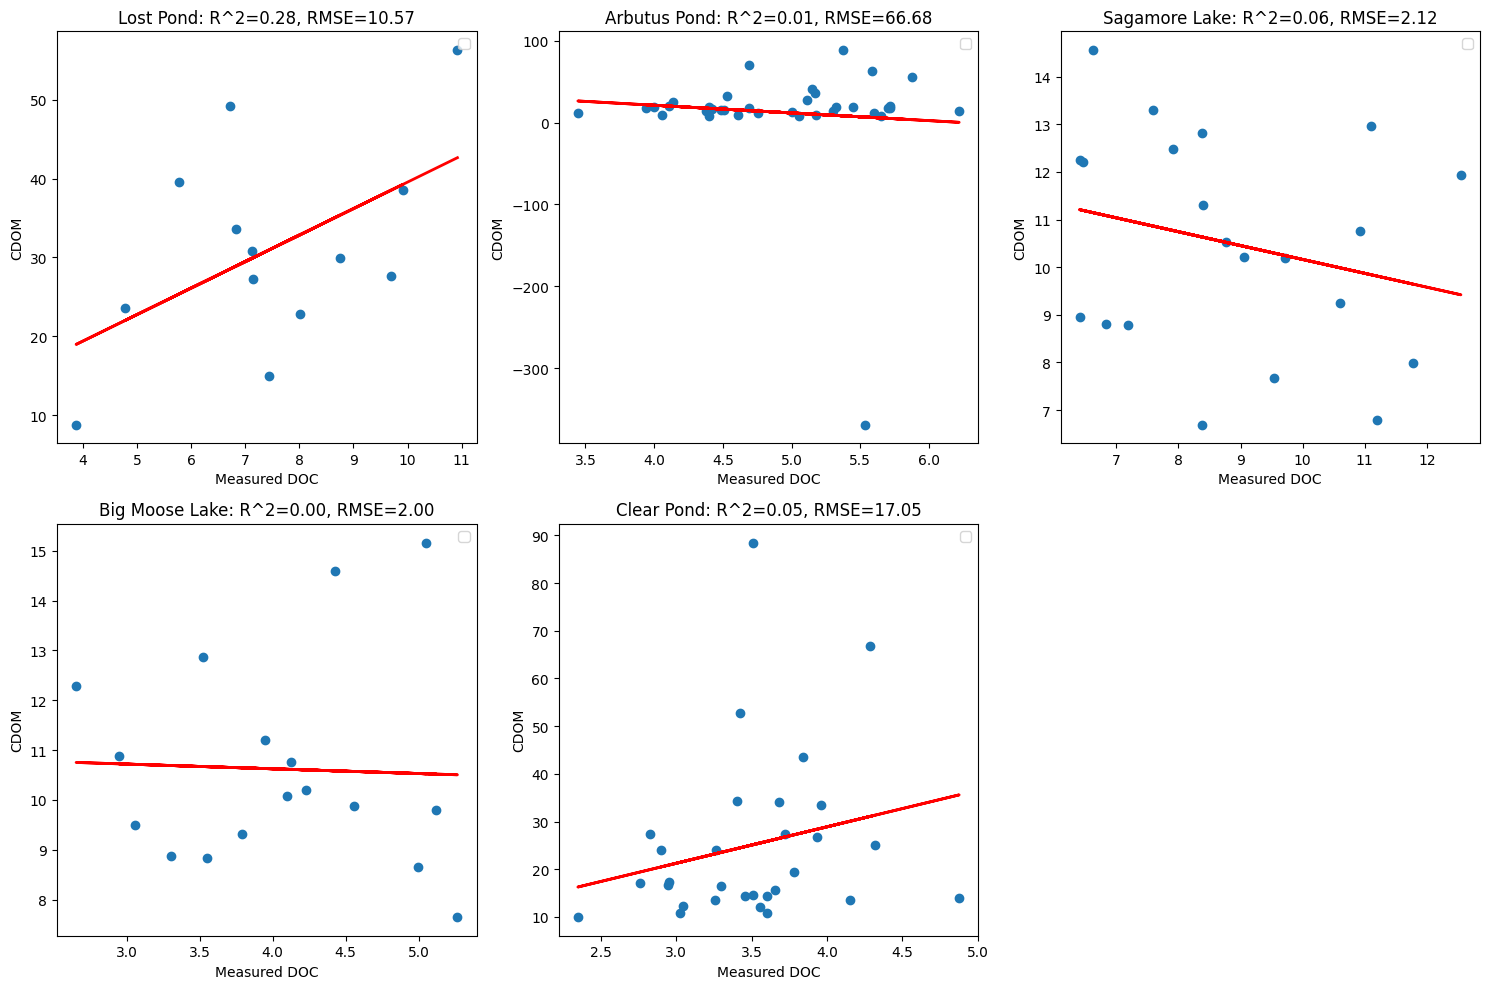

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'aCDOM_485'  # Replace with the actual column name for aCDOM_485

# Create a list of lakes
lakes = ["Lost Pond", "Arbutus Pond", "Sagamore Lake", "Big Moose Lake", "Clear Pond"]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(lakes)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for all lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(lakes):
    # Filter the data for the current lake
    lake_data = merged_data[merged_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(len(lakes), num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

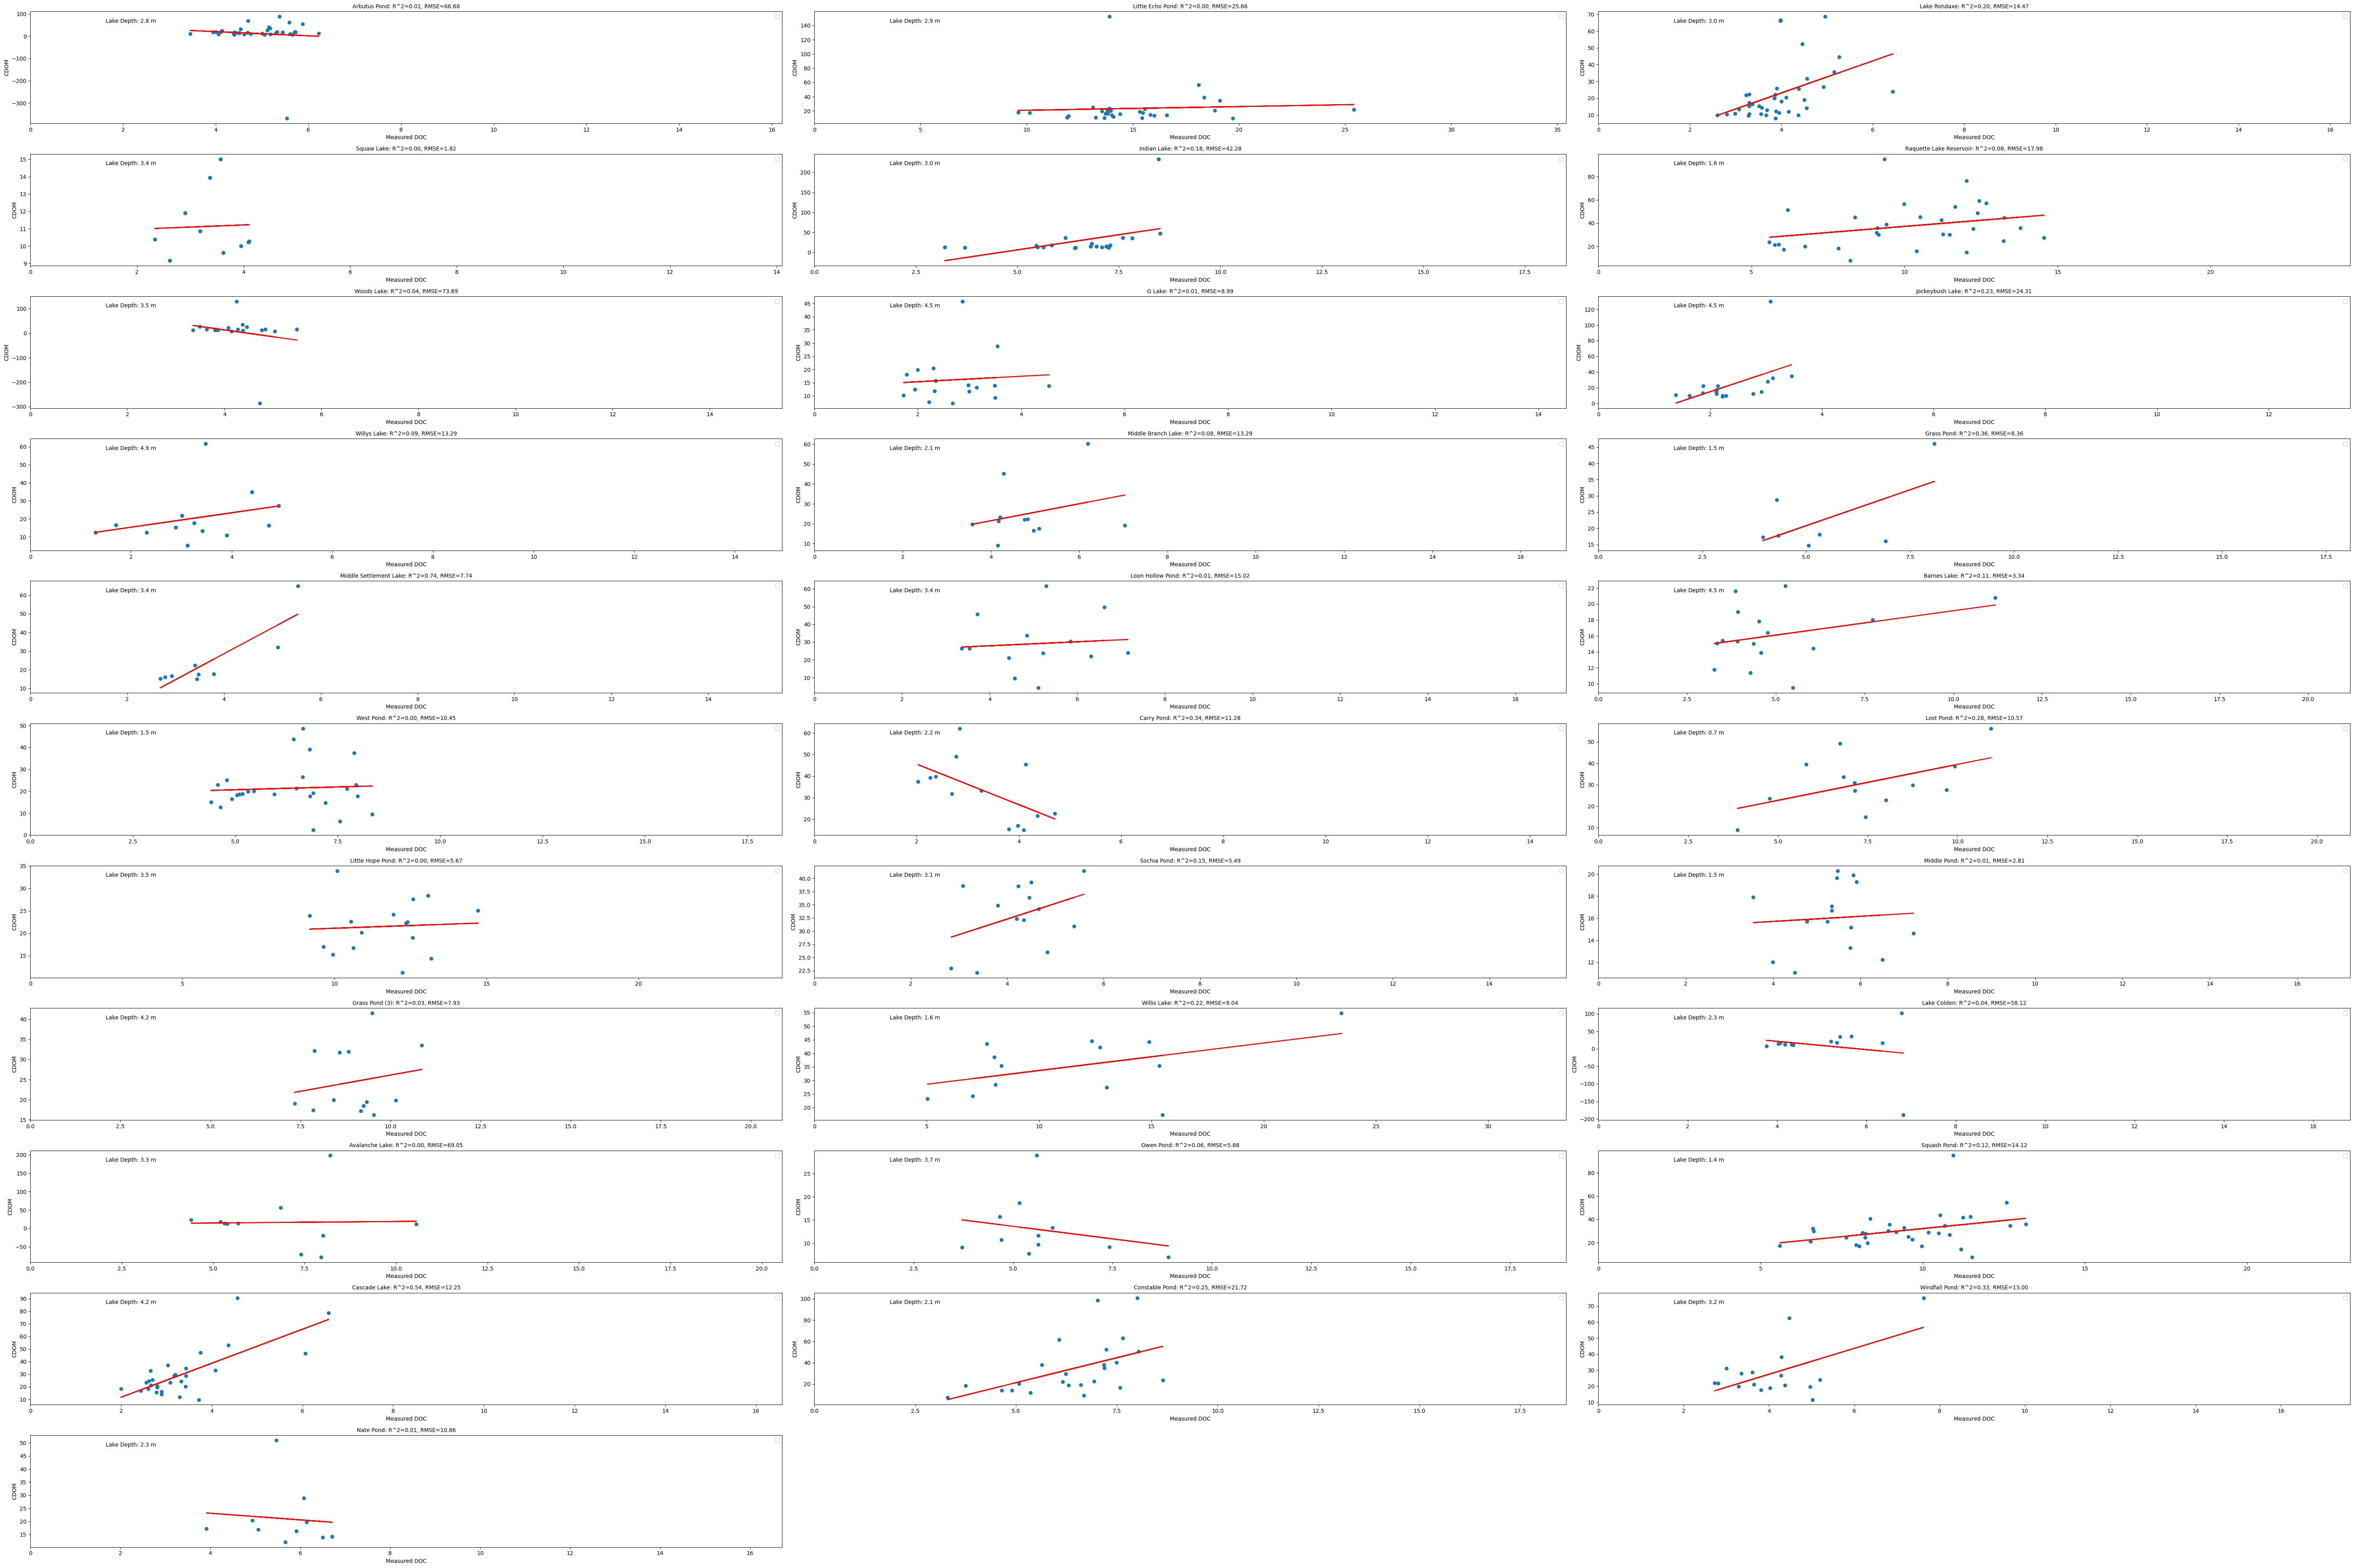

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'aCDOM_485'  # Replace with the actual column name for aCDOM_485

# Filter data for lakes with LAKE_DEPTH (m) less than or equal to 5
filtered_data = merged_data[merged_data['LAKE_DEPTH_MEAN'] <= 5]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(filtered_data['SITE_NAME'].unique())
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for filtered lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(60, 40))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(filtered_data['SITE_NAME'].unique()):
    # Filter the data for the current lake
    lake_data = filtered_data[filtered_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}', fontsize=10)
        axes[i].set_xlim([0, max(X)[0] + 10])  # Adjust the x-axis limit
        axes[i].text(0.1, 0.9, f'Lake Depth: {lake_data["LAKE_DEPTH_MEAN"].values[0]:.1f} m',
                     transform=axes[i].transAxes, fontsize=10)
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(num_lakes, num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

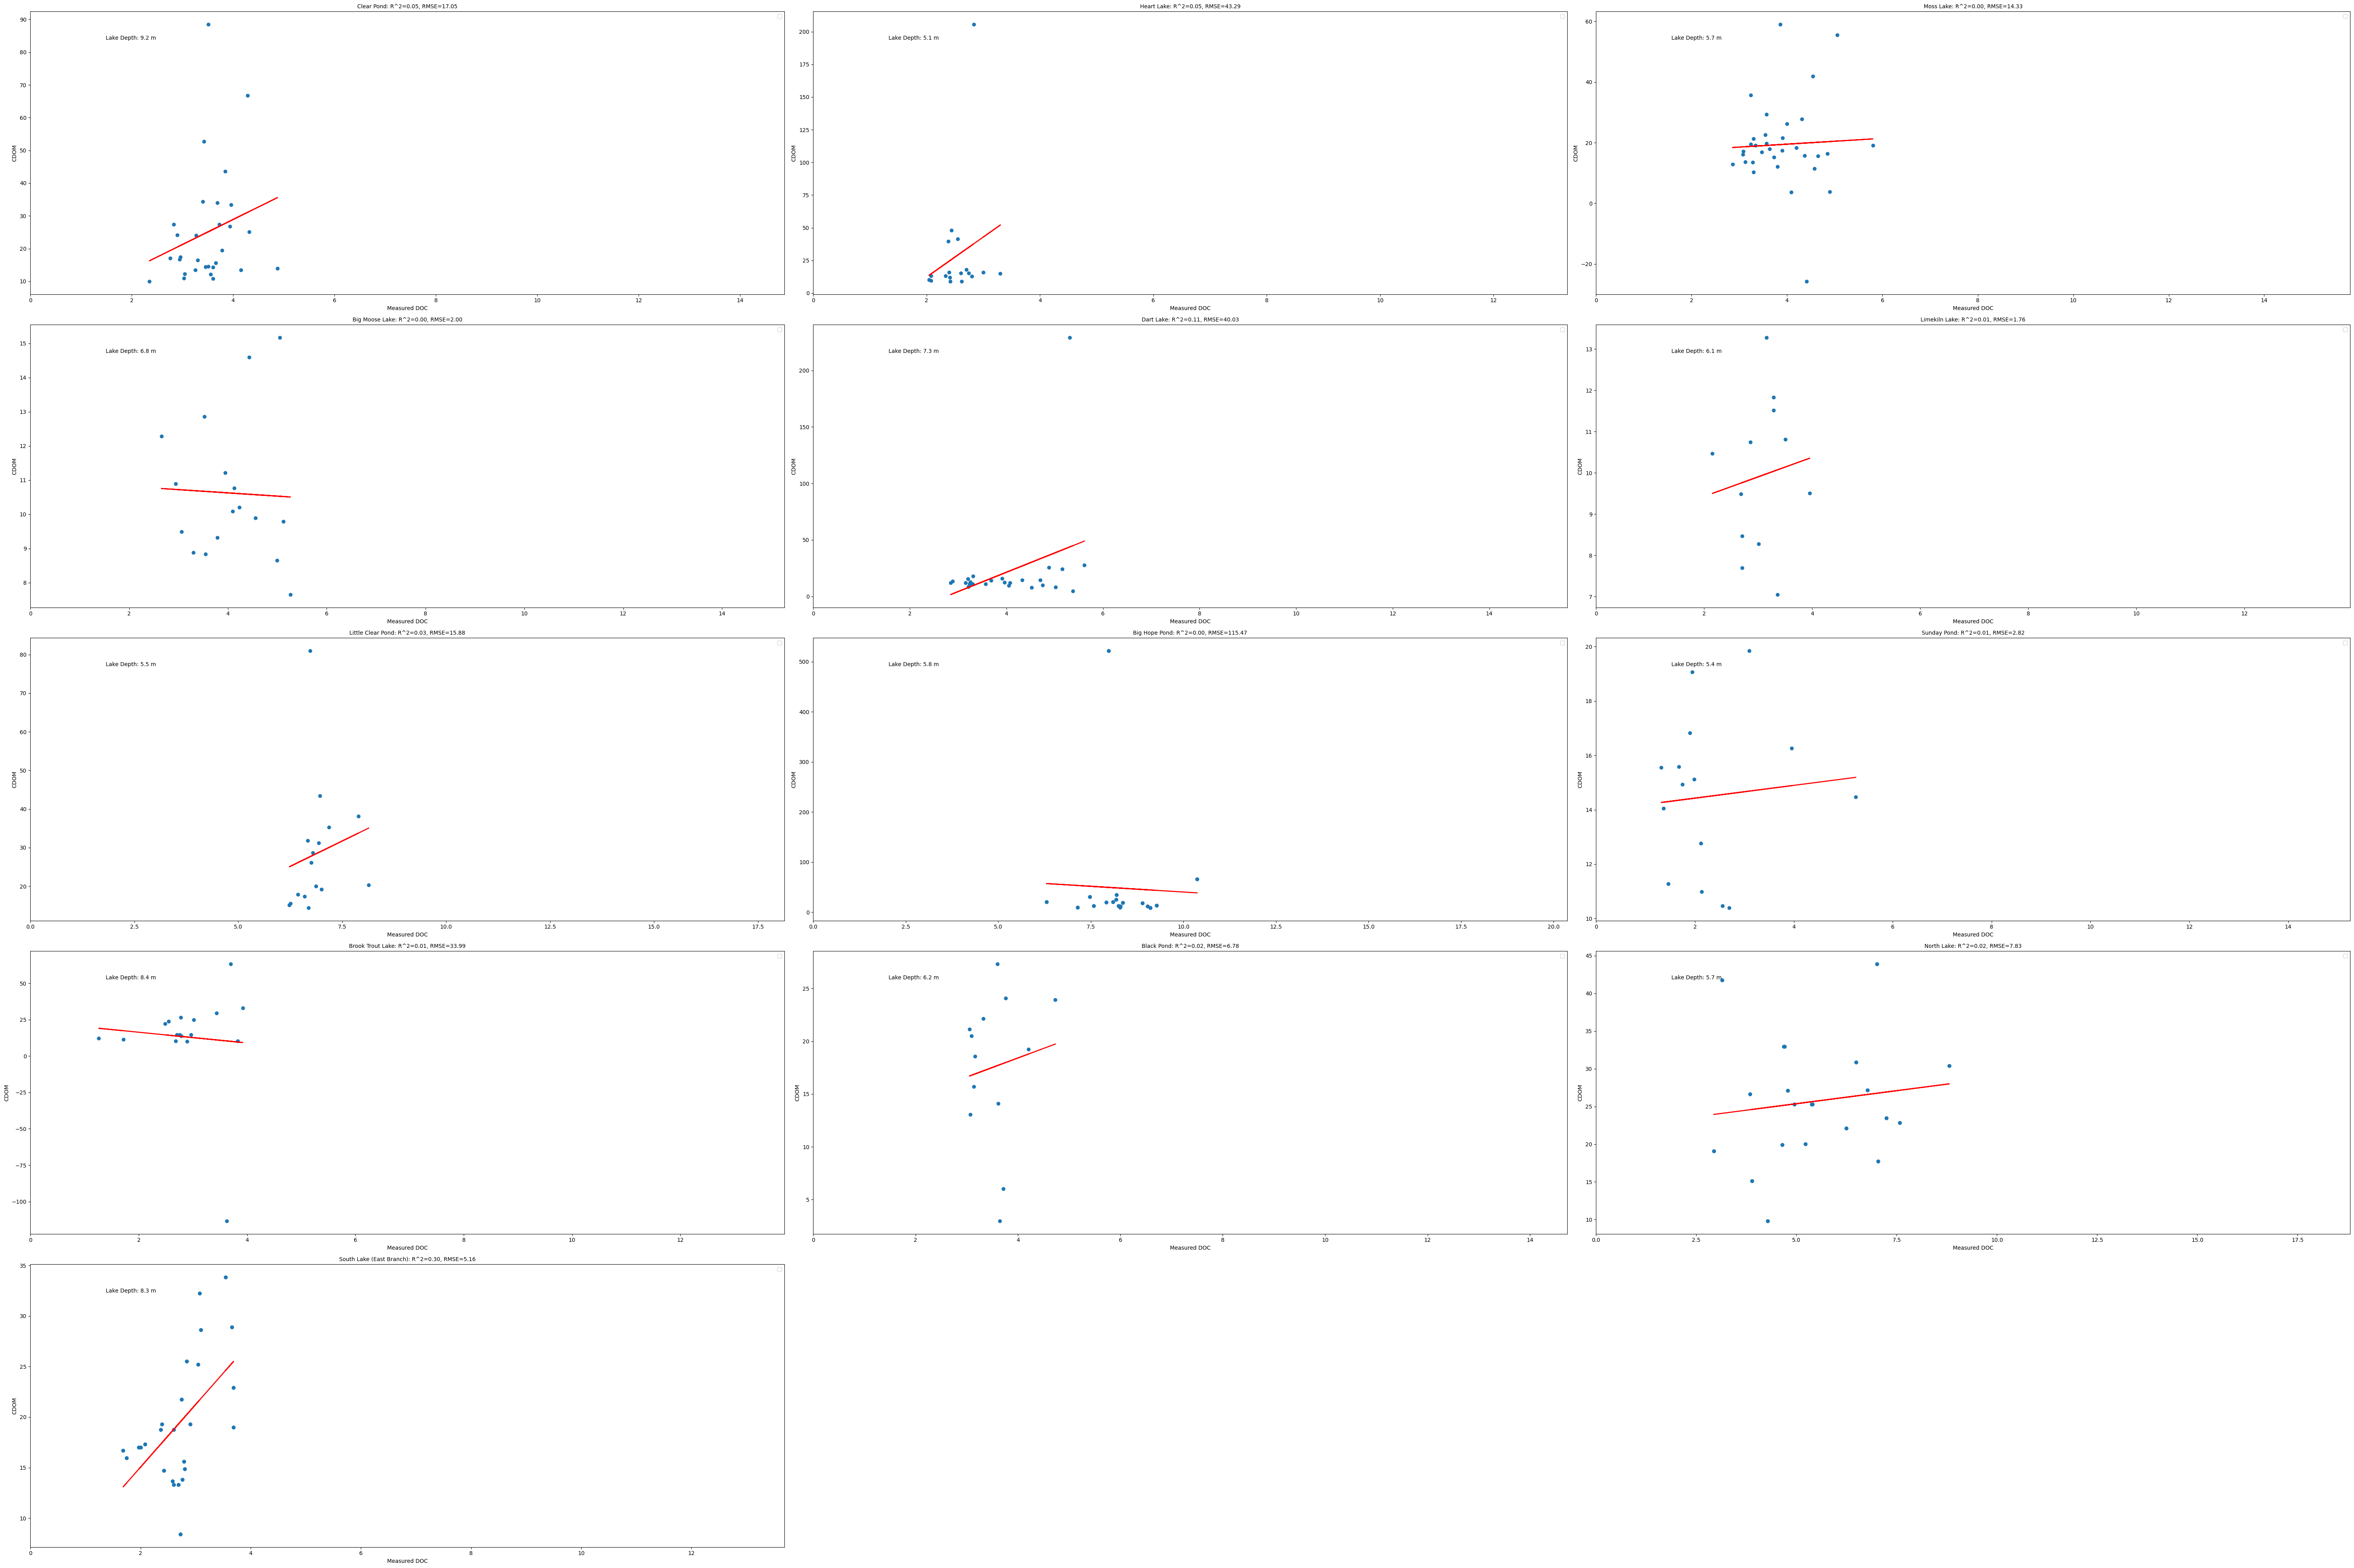

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'aCDOM_485'  # Replace with the actual column name for aCDOM_485

# Filter data for lakes with LAKE_DEPTH (m) between 5 and 10
filtered_data = merged_data[(merged_data['LAKE_DEPTH_MEAN'] > 5) & (merged_data['LAKE_DEPTH_MEAN'] < 10)]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(filtered_data['SITE_NAME'].unique())
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for filtered lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(60, 40))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(filtered_data['SITE_NAME'].unique()):
    # Filter the data for the current lake
    lake_data = filtered_data[filtered_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}', fontsize=10)
        axes[i].set_xlim([0, max(X)[0] + 10])  # Adjust the x-axis limit
        axes[i].text(0.1, 0.9, f'Lake Depth: {lake_data["LAKE_DEPTH_MEAN"].values[0]:.1f} m',
                     transform=axes[i].transAxes, fontsize=10)
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(num_lakes, num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


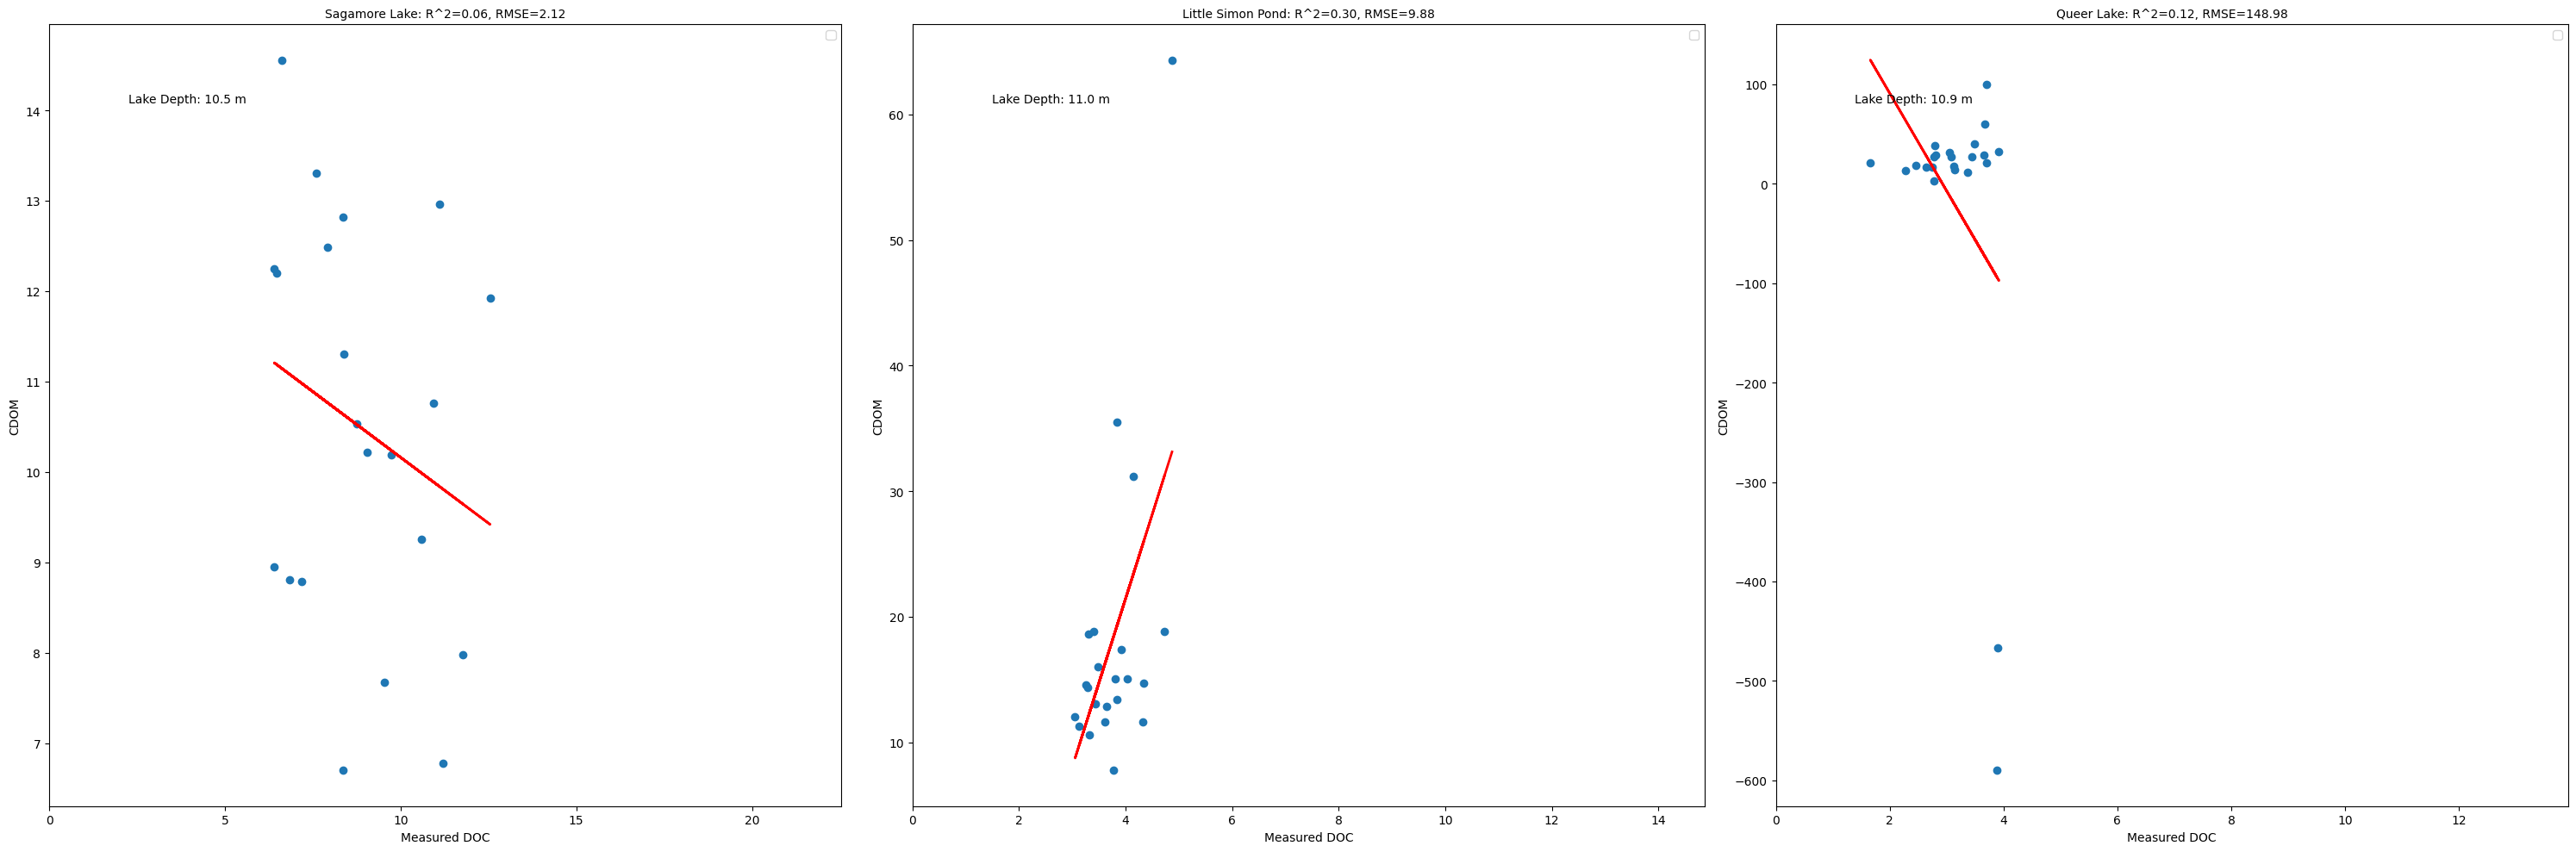

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'aCDOM_485'  # Replace with the actual column name for aCDOM_485

# Filter data for lakes with LAKE_DEPTH (m) greater than 10
filtered_data = merged_data[merged_data['LAKE_DEPTH_MEAN'] > 10]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(filtered_data['SITE_NAME'].unique())
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for filtered lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 10))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(filtered_data['SITE_NAME'].unique()):
    # Filter the data for the current lake
    lake_data = filtered_data[filtered_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}', fontsize=10)
        axes[i].set_xlim([0, max(X)[0] + 10])  # Adjust the x-axis limit
        axes[i].text(0.1, 0.9, f'Lake Depth: {lake_data["LAKE_DEPTH_MEAN"].values[0]:.1f} m',
                     transform=axes[i].transAxes, fontsize=10)
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(num_lakes, num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


In [30]:
import numpy as np

# Define the coefficients
a1 = 0.42
a2 = 1.79
a3 = 6.07

#olmanson (landsat 8)
df_all_lakes['Rrs_ratio1'] = df_all_lakes['red'] / df_all_lakes['green']
df_all_lakes['Rrs_ratio2'] = df_all_lakes['nir'] / df_all_lakes['green']

# Apply the equation
df_all_lakes['ln_a440'] = a1 * df_all_lakes['Rrs_ratio1'] + a2 * df_all_lakes['Rrs_ratio2'] +a3



In [31]:
df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
data_modified['DATE_SMP'] = pd.to_datetime(data_modified['DATE_SMP'])

data_modified.sort_values('DATE_SMP', inplace=True)
df_all_lakes.sort_values('DATE_SMP', inplace=True)


merged_data = pd.merge_asof(data_modified, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=3))
# Drop rows with null values in the merged dataframe
merged_data.dropna(inplace=True)

merged_data = merged_data.dropna(subset=['blue'])

merged_data = merged_data.dropna(subset=['DOC_MG_L'])

# merged_data = merged_data[merged_data['PROGRAM_ID'] == 'LTM_ALTM']
merged_data

SITE_ID   DATE_SMP   DOC_MG_L PROGRAM_ID         SITE_NAME  \
262    1A1-052 1985-07-22   5.000000   LTM_ALTM      Arbutus Pond   
263    1A2-077 1985-07-22   3.300000   LTM_ALTM        Clear Pond   
264    1A1-107 1985-07-22  13.800000   LTM_ALTM  Little Echo Pond   
265    1A1-102 1985-07-22   3.000000   LTM_ALTM        Heart Lake   
286    1A1-102 1985-10-26   3.300000   LTM_ALTM        Heart Lake   
...        ...        ...        ...        ...               ...   
17552  1A1-111 2020-07-07  10.539715   LTM_ALTM       Squash Pond   
17558  1A1-110 2020-07-09   4.457849   LTM_ALTM      Lake Rondaxe   
17745  1A1-017 2021-05-06   8.036800   LTM_ALTM    Constable Pond   
17746  1A1-111 2021-05-06  11.240100   LTM_ALTM       Squash Pond   
17755   040576 2021-05-13   4.763200   LTM_ALTM        Woods Lake   

       LAKE_DEPTH_MEAN     LATDD     LONDD  LATDD_CENT  LONDD_CENT  ...  \
262                2.8  43.98230 -74.23556    43.98787   -74.24151  ...   
263                9.2  43.99568 -73.83082    43.99719   -73.82435  ...   
264                2.9  44.30576 -74.35721    44.30849   -74.35564  ...   
265                5.1  44.18050 -73.96726    44.18229   -73.96920  ...   
286                5.1  44.18050 -73.96726    44.18229   -73.96920  ...   
...                ...       ...       ...         ...         ...  ...   
17552              1.4  43.82557 -74.88614    43.82649   -74.88699  ...   
17558              3.0  43.76088 -74.91592    43.76697   -74.90136  ...   
17745              2.1  43.83101 -74.80642    43.83290   -74.79820  ...   
17746              1.4  43.82557 -74.88614    43.82649   -74.88699  ...   
17755              3.5  43.86566 -74.95512    43.87003   -74.95232  ...   

            red     swir1     swir2       temp  LAKE_LABEL  B4_B1_Ratio  \
262    0.016561  0.013362  0.008674  21.863874       194.0     2.475130   
263    0.012808  0.014010  0.009788  21.227089       198.0     3.065729   
264    0.007598  0.013107  0.006074  21.886970        23.0     3.720795   
265    0.012890  0.016889  0.008107  21.025456        37.0     2.993849   
286    0.024692  0.050054  0.033341   9.464886        37.0     2.788595   
...         ...       ...       ...        ...         ...          ...   
17552  0.022071  0.085826  0.044776  27.992958        28.0     8.002779   
17558  0.013804  0.047167  0.021865  28.701132        47.0     9.523442   
17745  0.025780  0.079875  0.043615   9.834784        21.0     9.192036   
17746  0.018570  0.056248  0.033294  11.411781        28.0     7.593103   
17755  0.033764  0.065741  0.046172  14.590739        60.0     2.334074   

       aCDOM_485  Rrs_ratio1  Rrs_ratio2    ln_a440  
262    13.140845    0.745848    1.945299   9.865341  
263    16.419260    0.672361    2.274927  10.424510  
264    20.055535    0.532318    2.447787  10.675112  
265    16.020256    0.589207    2.084973  10.049569  
286    14.880891    0.893807    2.174652  10.338026  
...          ...         ...         ...        ...  
17552  43.824826    0.766905    5.030513  15.396718  
17558  52.266025    0.544737    3.636551  12.808215  
17745  50.426389    0.915704    4.826249  15.093581  
17746  41.550713    0.964441    4.368309  14.294338  
17755  12.357847    1.015194    1.838605   9.787484  

[994 rows x 24 columns]

R^2: 0.047602017525666396
RMSE: 2.433999274110095


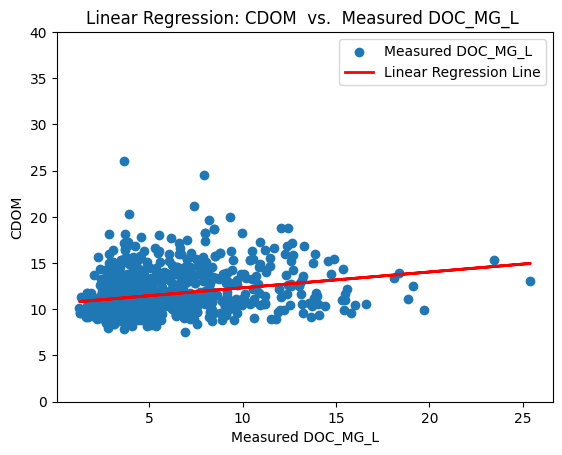

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X = merged_data['DOC_MG_L'].values.reshape(-1, 1)
y = merged_data['ln_a440'].values

# Create a linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Predict y values using the model
y_pred = regression_model.predict(X)

# Calculate R^2
r2 = r2_score(y, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Print R^2 and RMSE
print("R^2:", r2)
print("RMSE:", rmse)

# Plot measured DOC_MG_L against aCDOM
plt.scatter(merged_data['DOC_MG_L'], merged_data['ln_a440'],  label='Measured DOC_MG_L')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Measured DOC_MG_L')
plt.ylabel('CDOM')
plt.title('Linear Regression: CDOM  vs.  Measured DOC_MG_L ')
plt.legend()
plt.ylim(0,40)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


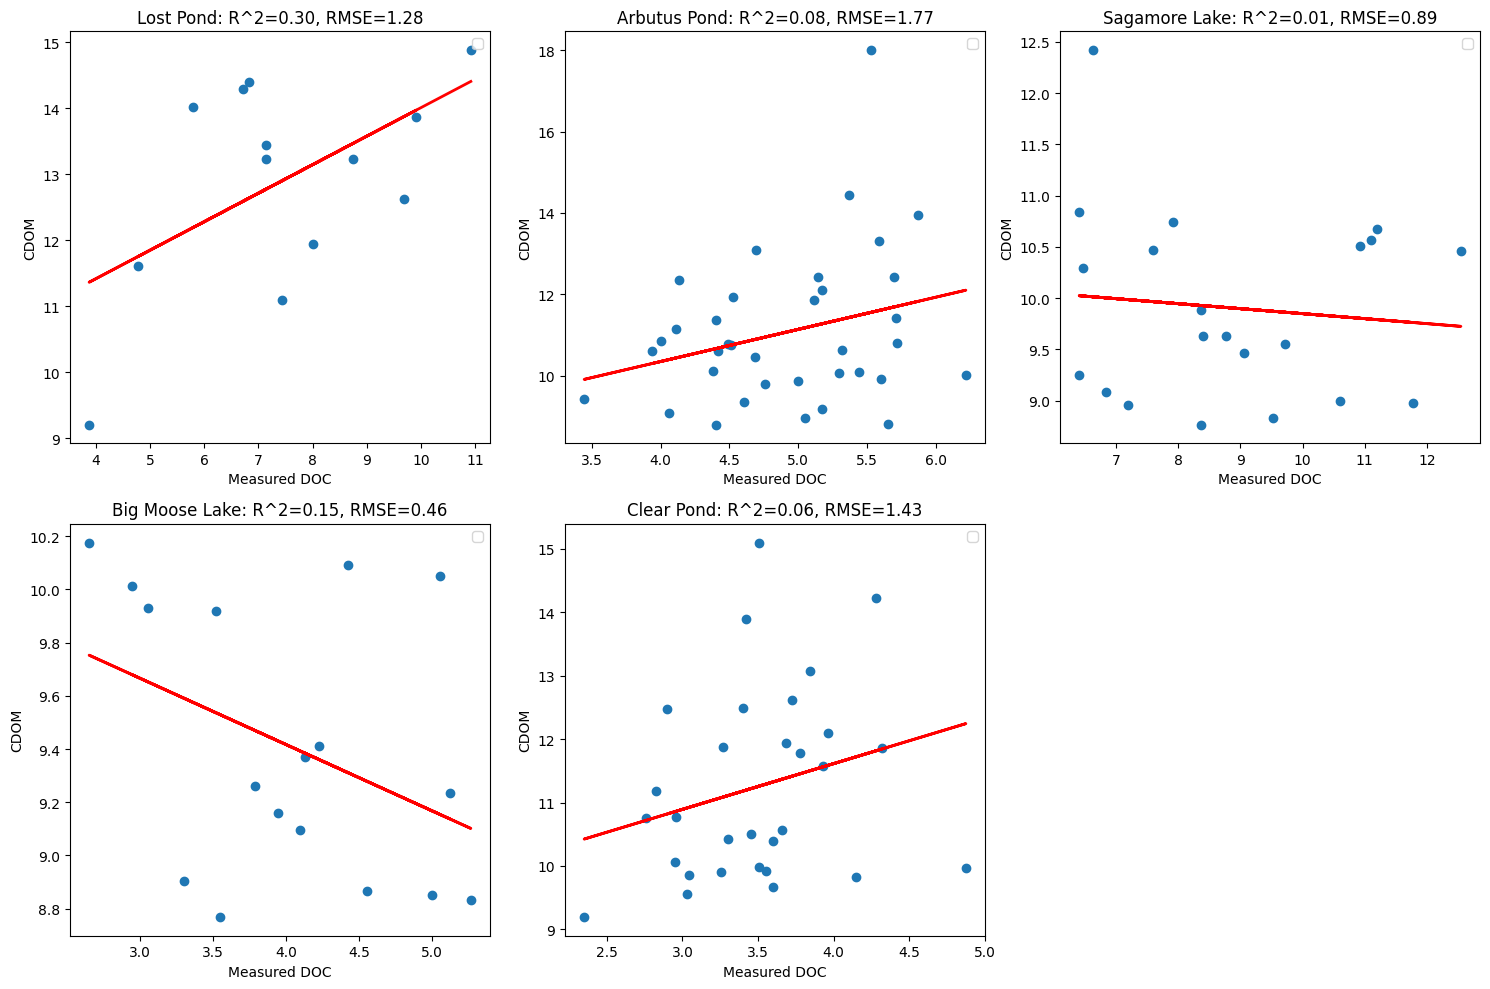

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'ln_a440'  # Replace with the actual column name for aCDOM_485

# Create a list of lakes
lakes = ["Lost Pond", "Arbutus Pond", "Sagamore Lake", "Big Moose Lake", "Clear Pond"]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(lakes)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for all lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(lakes):
    # Filter the data for the current lake
    lake_data = merged_data[merged_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(len(lakes), num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

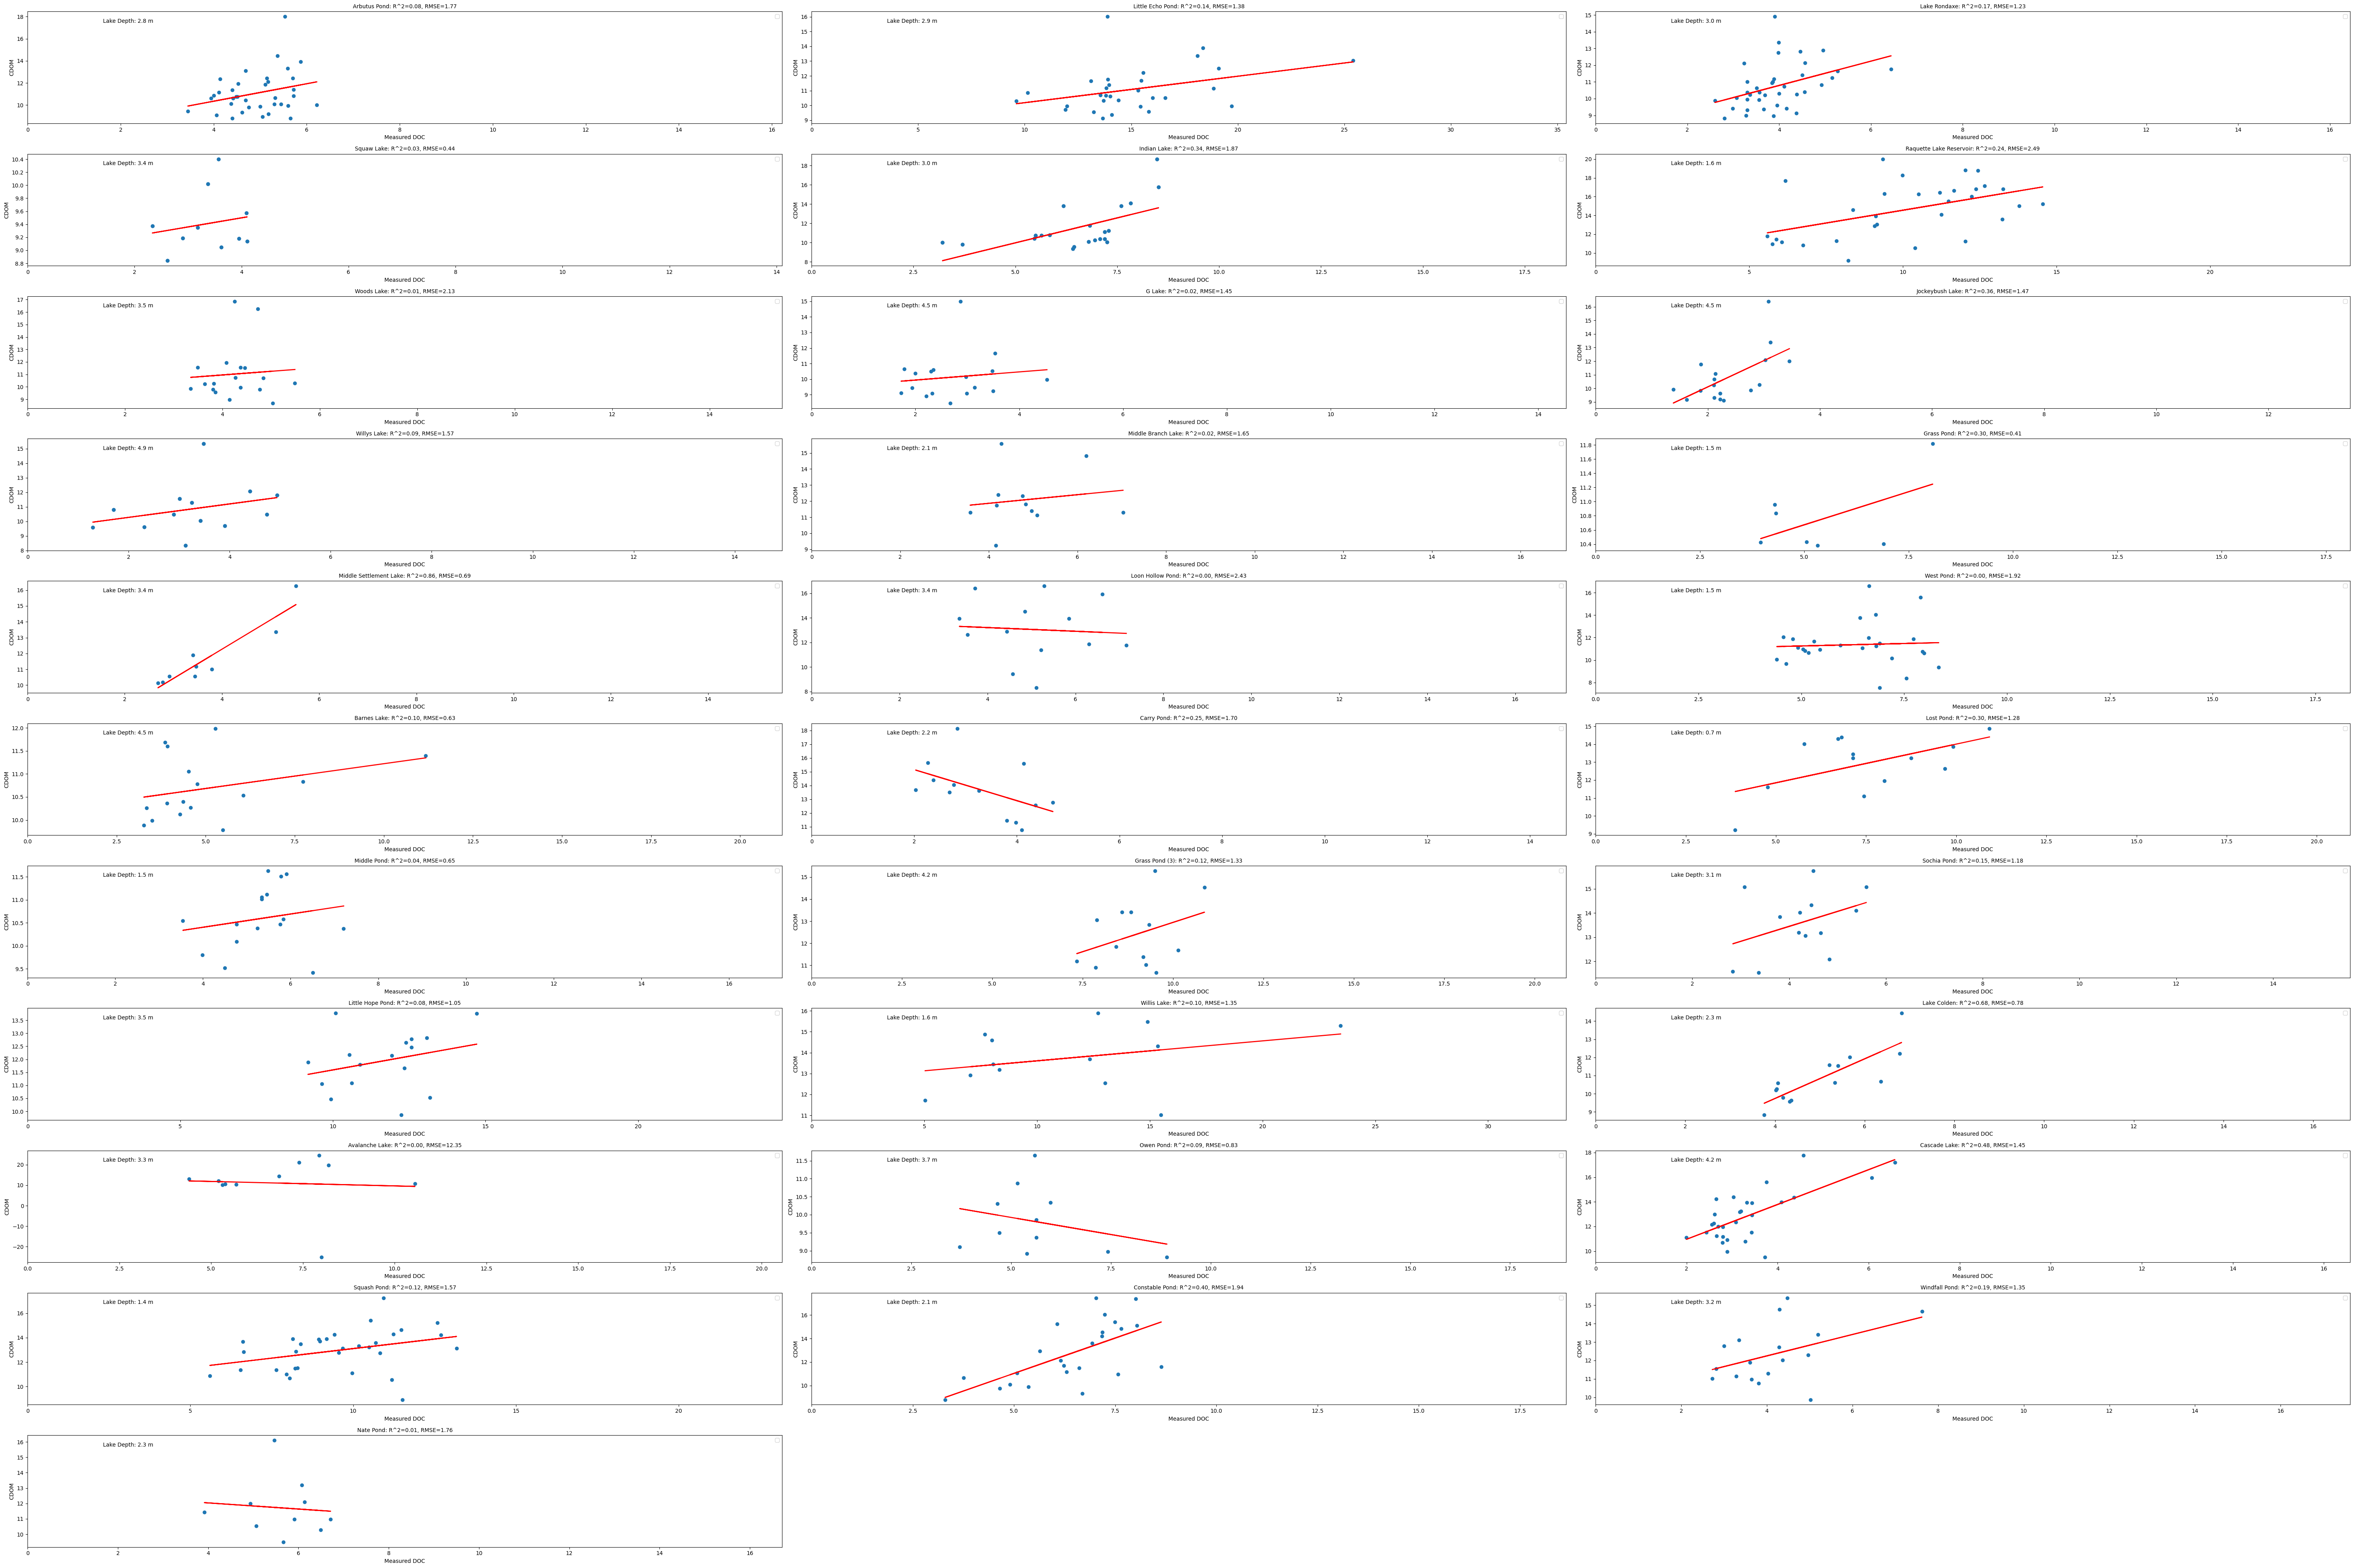

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'ln_a440'  # Replace with the actual column name for aCDOM_485

# Filter data for lakes with LAKE_DEPTH (m) less than or equal to 5
filtered_data = merged_data[merged_data['LAKE_DEPTH_MEAN'] <= 5]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(filtered_data['SITE_NAME'].unique())
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for filtered lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(60, 40))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(filtered_data['SITE_NAME'].unique()):
    # Filter the data for the current lake
    lake_data = filtered_data[filtered_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}', fontsize=10)
        axes[i].set_xlim([0, max(X)[0] + 10])  # Adjust the x-axis limit
        axes[i].text(0.1, 0.9, f'Lake Depth: {lake_data["LAKE_DEPTH_MEAN"].values[0]:.1f} m',
                     transform=axes[i].transAxes, fontsize=10)
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(num_lakes, num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

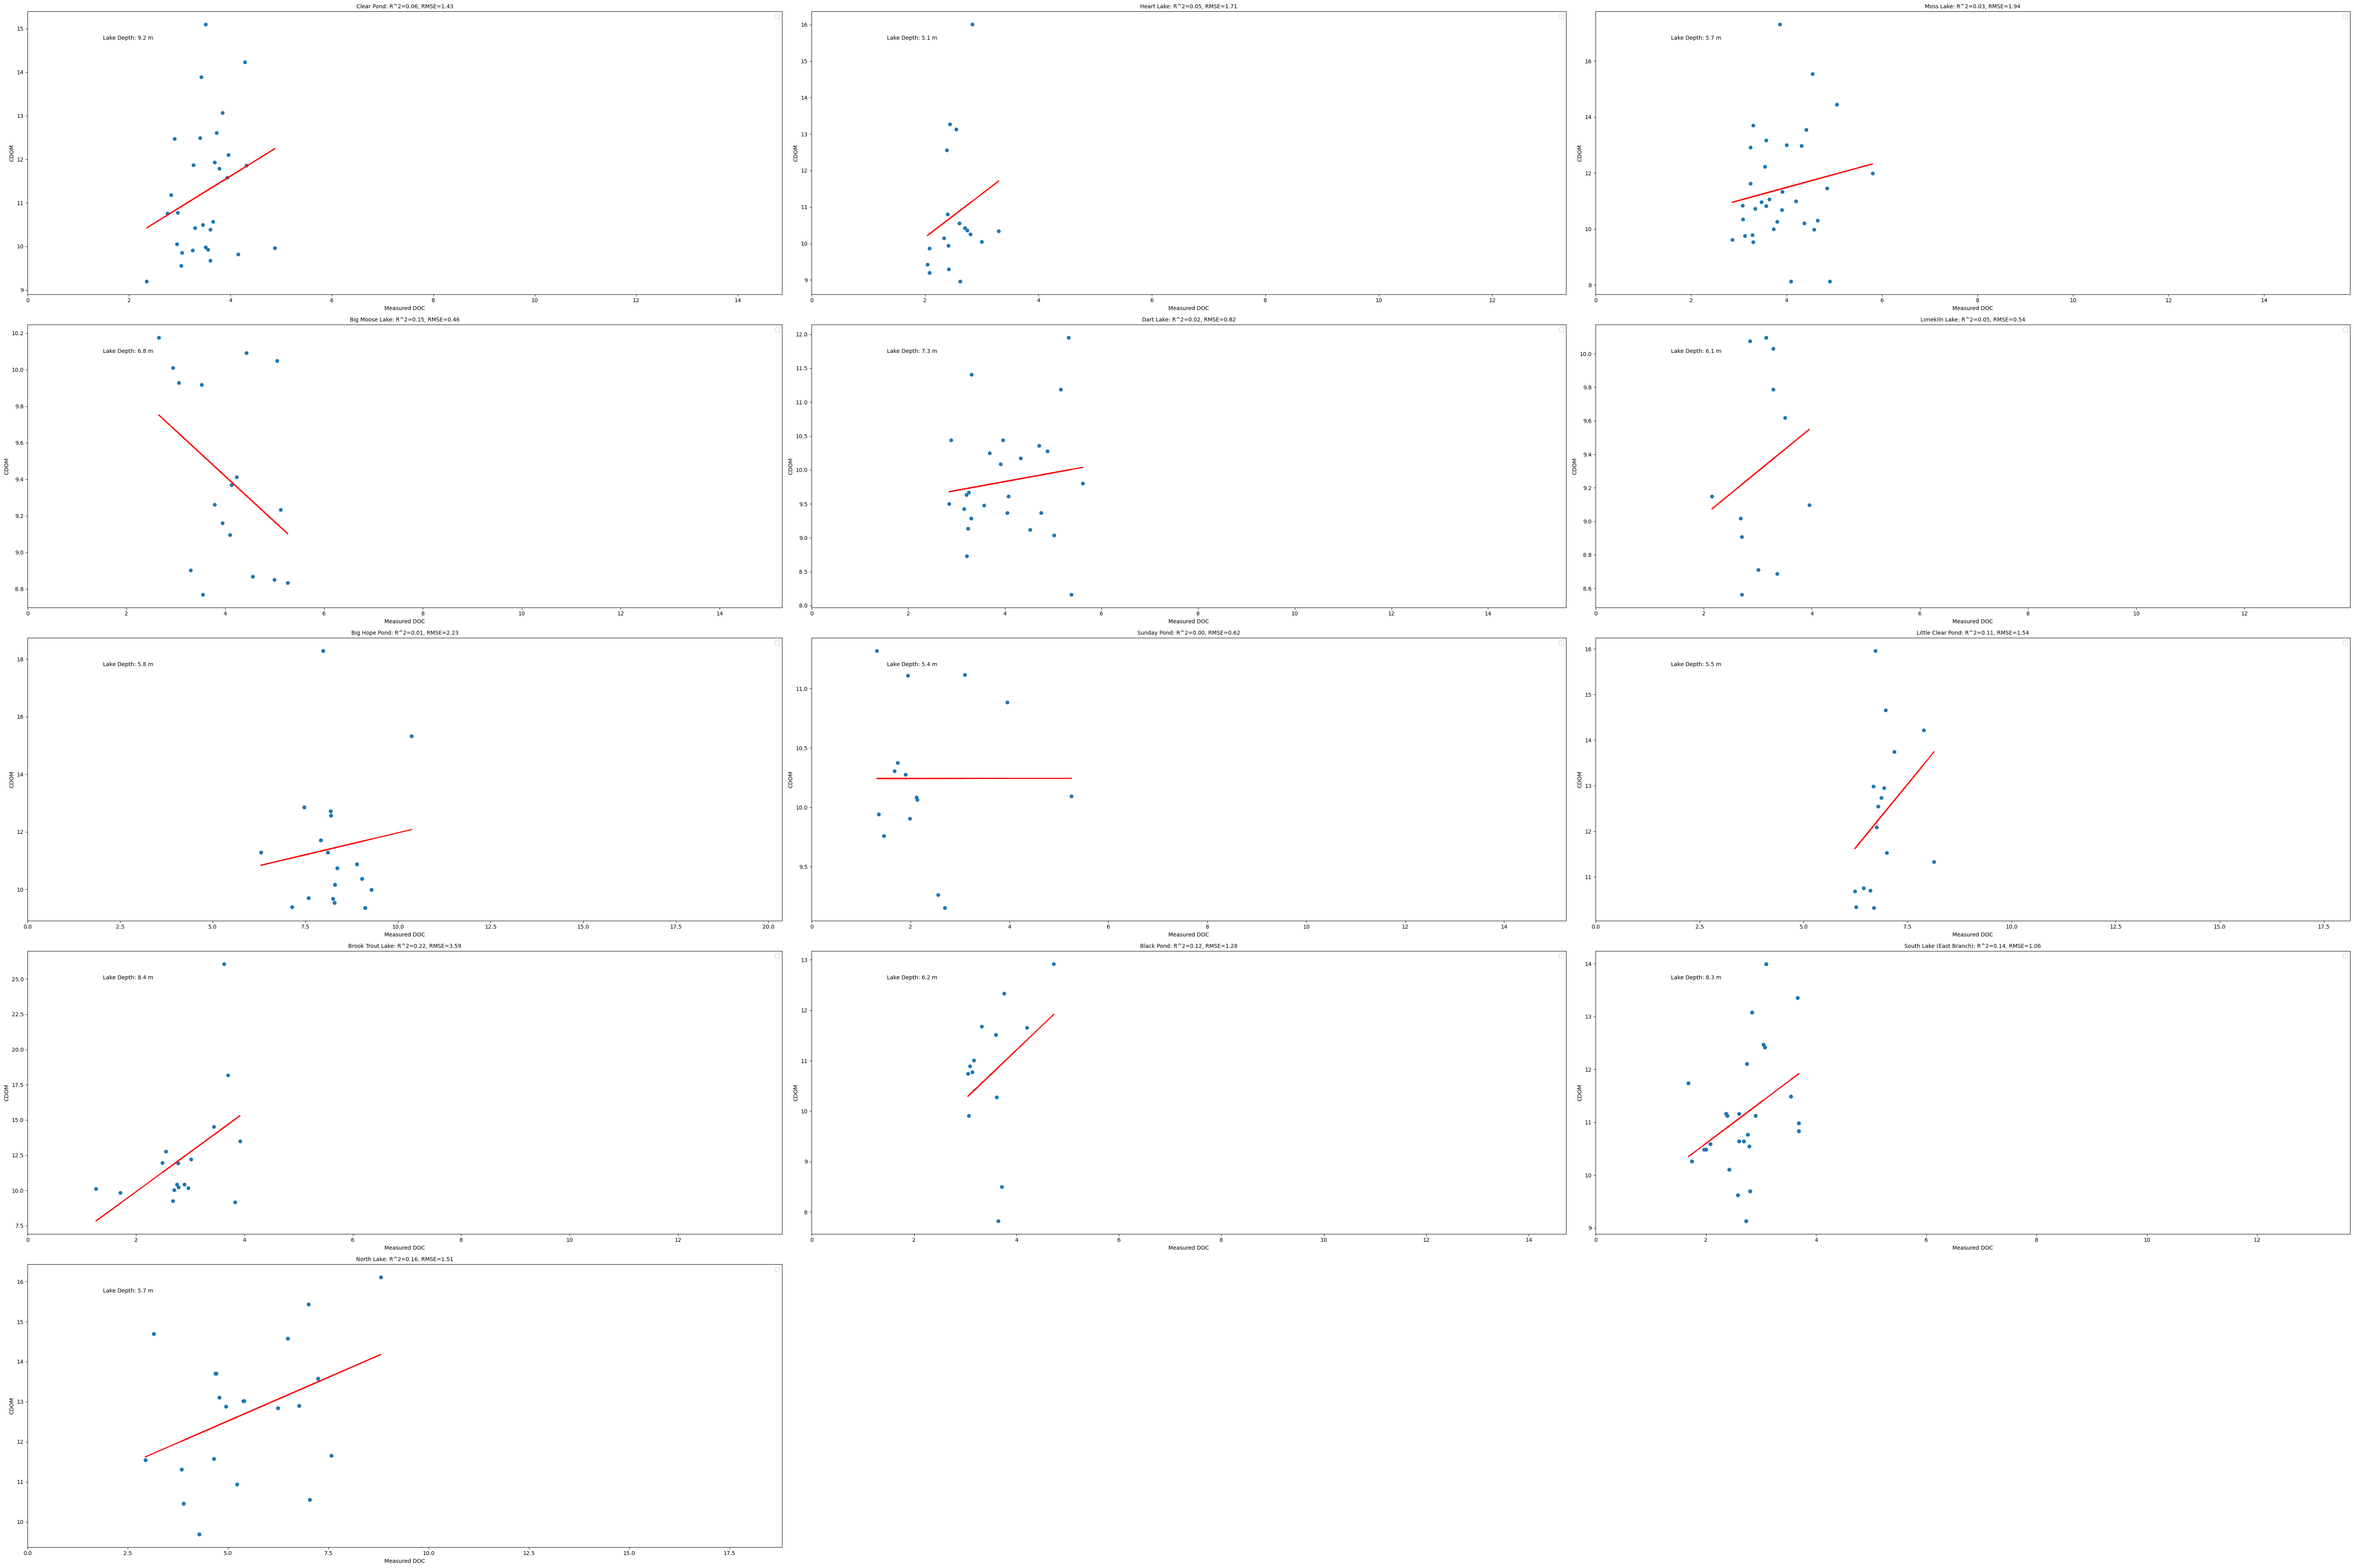

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'ln_a440'  # Replace with the actual column name for aCDOM_485

# Filter data for lakes with LAKE_DEPTH (m) between 5 and 10
filtered_data = merged_data[(merged_data['LAKE_DEPTH_MEAN'] > 5) & (merged_data['LAKE_DEPTH_MEAN'] < 10)]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(filtered_data['SITE_NAME'].unique())
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for filtered lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(60, 40))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(filtered_data['SITE_NAME'].unique()):
    # Filter the data for the current lake
    lake_data = filtered_data[filtered_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}', fontsize=10)
        axes[i].set_xlim([0, max(X)[0] + 10])  # Adjust the x-axis limit
        axes[i].text(0.1, 0.9, f'Lake Depth: {lake_data["LAKE_DEPTH_MEAN"].values[0]:.1f} m',
                     transform=axes[i].transAxes, fontsize=10)
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(num_lakes, num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


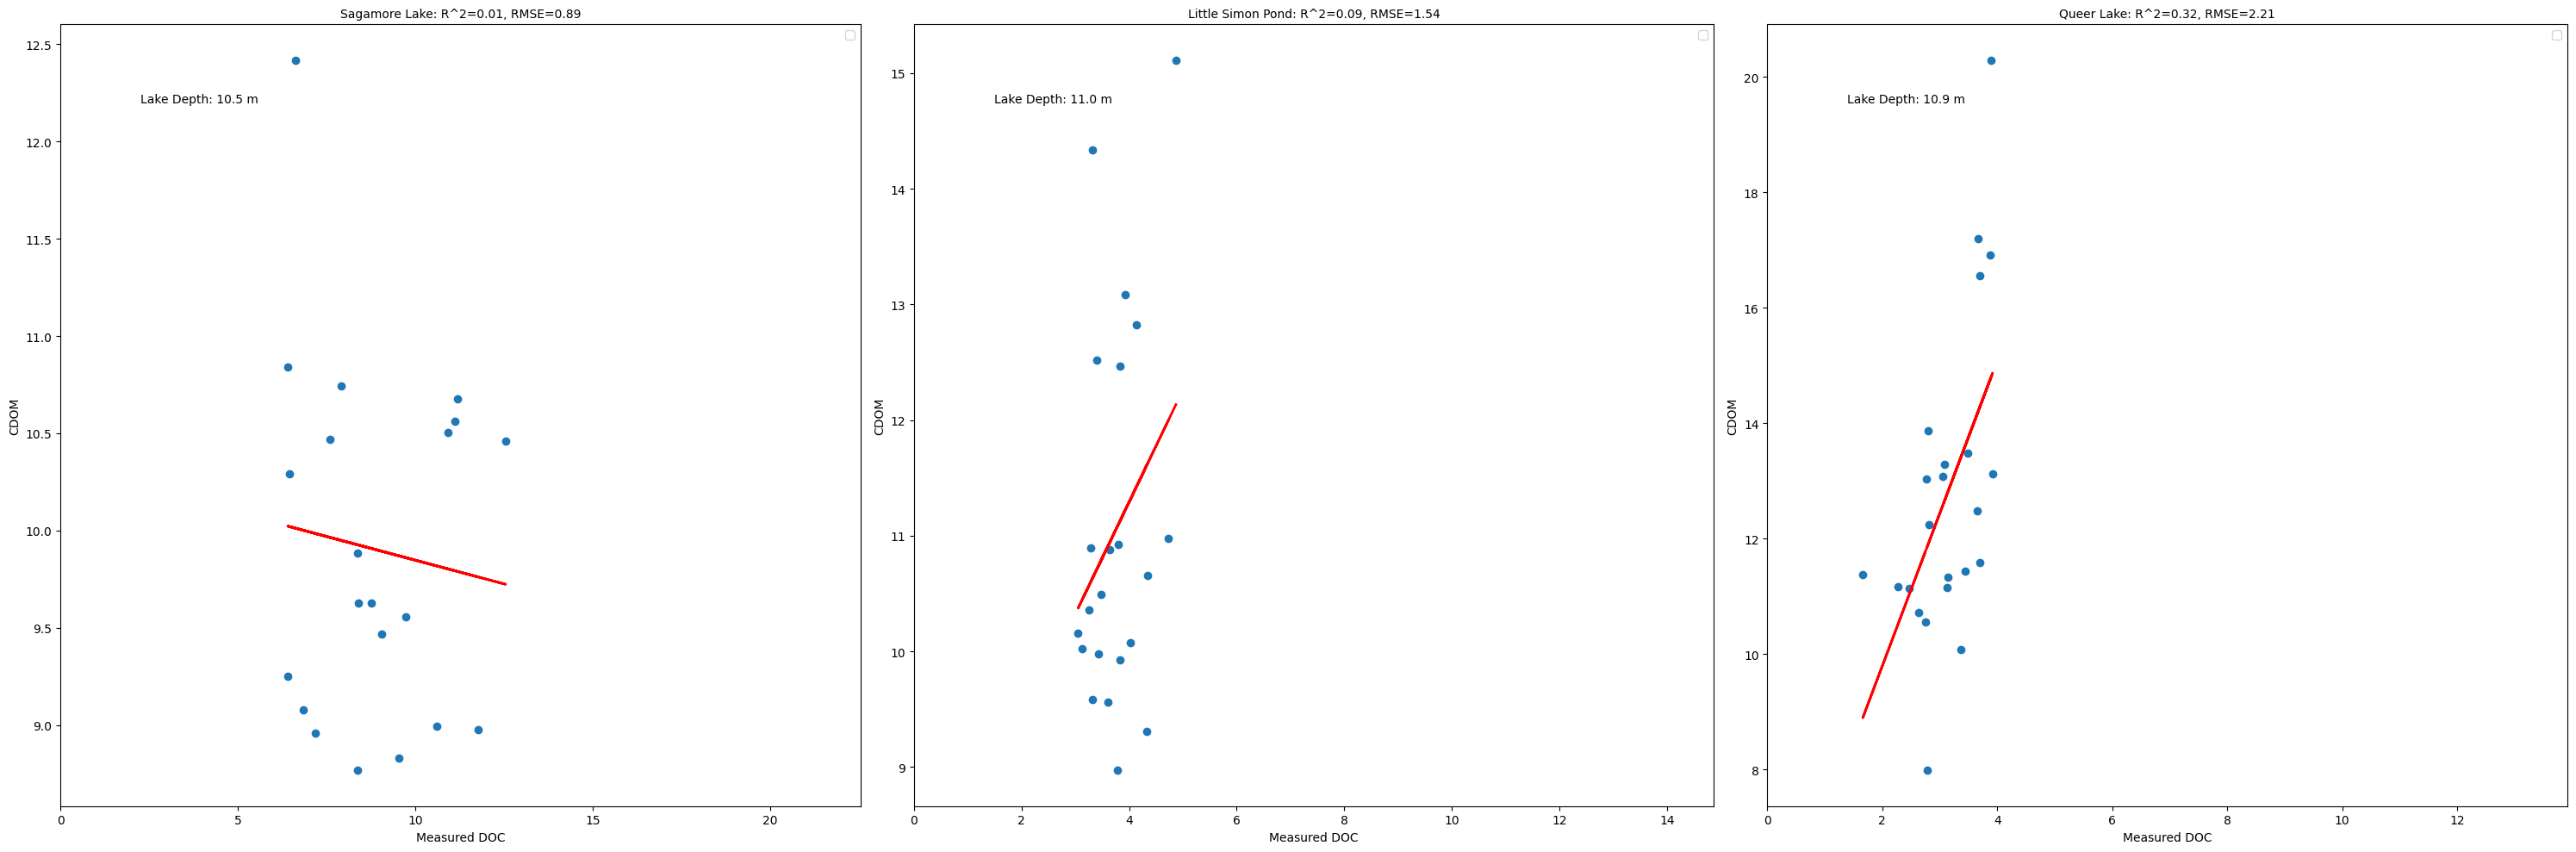

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'ln_a440'  # Replace with the actual column name for aCDOM_485

# Filter data for lakes with LAKE_DEPTH (m) greater than 10
filtered_data = merged_data[merged_data['LAKE_DEPTH_MEAN'] > 10]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(filtered_data['SITE_NAME'].unique())
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for filtered lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 10))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(filtered_data['SITE_NAME'].unique()):
    # Filter the data for the current lake
    lake_data = filtered_data[filtered_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}', fontsize=10)
        axes[i].set_xlim([0, max(X)[0] + 10])  # Adjust the x-axis limit
        axes[i].text(0.1, 0.9, f'Lake Depth: {lake_data["LAKE_DEPTH_MEAN"].values[0]:.1f} m',
                     transform=axes[i].transAxes, fontsize=10)
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(num_lakes, num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


In [37]:
import numpy as np


#Koll-eyed et all (landsat 8) 2021

# Coefficients
a1 = 3.65
a2 = 2.91
a3 = 0.41


# Calculate ln(CDOM(a440))
df_all_lakes['ln_CDOM_a440'] = a1 - a2 * np.log(df_all_lakes['green'] / df_all_lakes['red']) - a3 * np.log(df_all_lakes['blue'])

In [38]:
df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
data_modified['DATE_SMP'] = pd.to_datetime(data_modified['DATE_SMP'])

data_modified.sort_values('DATE_SMP', inplace=True)
df_all_lakes.sort_values('DATE_SMP', inplace=True)


merged_data = pd.merge_asof(data_modified, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=3))
# Drop rows with null values in the merged dataframe
merged_data.dropna(inplace=True)

merged_data = merged_data.dropna(subset=['blue'])

merged_data = merged_data.dropna(subset=['DOC_MG_L'])

# merged_data = merged_data[merged_data['PROGRAM_ID'] == 'LTM_ALTM']
merged_data

SITE_ID   DATE_SMP   DOC_MG_L PROGRAM_ID         SITE_NAME  \
262    1A1-052 1985-07-22   5.000000   LTM_ALTM      Arbutus Pond   
263    1A2-077 1985-07-22   3.300000   LTM_ALTM        Clear Pond   
264    1A1-107 1985-07-22  13.800000   LTM_ALTM  Little Echo Pond   
265    1A1-102 1985-07-22   3.000000   LTM_ALTM        Heart Lake   
286    1A1-102 1985-10-26   3.300000   LTM_ALTM        Heart Lake   
...        ...        ...        ...        ...               ...   
17553  1A1-105 2020-07-07   6.066766   LTM_ALTM      Cascade Lake   
17558  1A1-110 2020-07-09   4.457849   LTM_ALTM      Lake Rondaxe   
17745  1A1-111 2021-05-06  11.240100   LTM_ALTM       Squash Pond   
17746  1A1-017 2021-05-06   8.036800   LTM_ALTM    Constable Pond   
17755   040576 2021-05-13   4.763200   LTM_ALTM        Woods Lake   

       LAKE_DEPTH_MEAN     LATDD     LONDD  LATDD_CENT  LONDD_CENT  ...  \
262                2.8  43.98230 -74.23556    43.98787   -74.24151  ...   
263                9.2  43.99568 -73.83082    43.99719   -73.82435  ...   
264                2.9  44.30576 -74.35721    44.30849   -74.35564  ...   
265                5.1  44.18050 -73.96726    44.18229   -73.96920  ...   
286                5.1  44.18050 -73.96726    44.18229   -73.96920  ...   
...                ...       ...       ...         ...         ...  ...   
17553              4.2  43.78910 -74.81204    43.79039   -74.80236  ...   
17558              3.0  43.76088 -74.91592    43.76697   -74.90136  ...   
17745              1.4  43.82557 -74.88614    43.82649   -74.88699  ...   
17746              2.1  43.83101 -74.80642    43.83290   -74.79820  ...   
17755              3.5  43.86566 -74.95512    43.87003   -74.95232  ...   

          swir1     swir2       temp  LAKE_LABEL  B4_B1_Ratio  aCDOM_485  \
262    0.013362  0.008674  21.863874       194.0     2.475130  13.140845   
263    0.014010  0.009788  21.227089       198.0     3.065729  16.419260   
264    0.013107  0.006074  21.886970        23.0     3.720795  20.055535   
265    0.016889  0.008107  21.025456        37.0     2.993849  16.020256   
286    0.050054  0.033341   9.464886        37.0     2.788595  14.880891   
...         ...       ...        ...         ...          ...        ...   
17553  0.069662  0.029443  26.343214        40.0     8.459851  46.362031   
17558  0.047167  0.021865  28.701132        47.0     9.523442  52.266025   
17745  0.056248  0.033294  11.411781        28.0     7.593103  41.550713   
17746  0.079875  0.043615   9.834784        21.0     9.192036  50.426389   
17755  0.065741  0.046172  14.590739        60.0     2.334074  12.357847   

       Rrs_ratio1  Rrs_ratio2    ln_a440  ln_CDOM_a440  
262      0.745848    1.945299   9.865341      4.456519  
263      0.672361    2.274927  10.424510      4.241067  
264      0.532318    2.447787  10.675112      3.729107  
265      0.589207    2.084973  10.049569      3.826163  
286      0.893807    2.174652  10.338026      4.896757  
...           ...         ...        ...           ...  
17553    0.560806    5.392583  15.958263      3.592111  
17558    0.544737    3.636551  12.808215      3.783914  
17745    0.964441    4.368309  14.294338      5.390803  
17746    0.915704    4.826249  15.093581      5.121629  
17755    1.015194    1.838605   9.787484      5.187117  

[984 rows x 25 columns]

R^2: 0.018315324585556292
RMSE: 0.6801799738133599


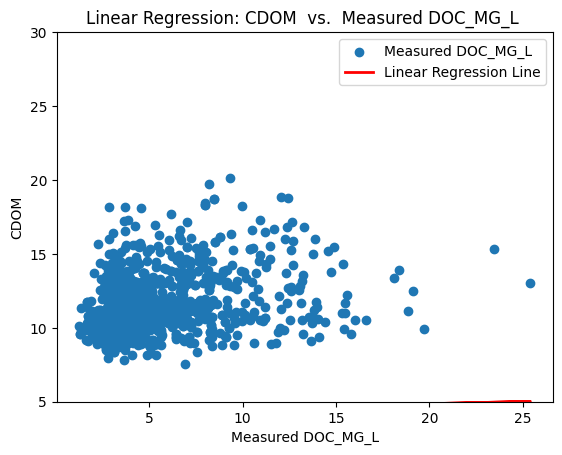

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X = merged_data['DOC_MG_L'].values.reshape(-1, 1)
y = merged_data['ln_CDOM_a440'].values

# Create a linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Predict y values using the model
y_pred = regression_model.predict(X)

# Calculate R^2
r2 = r2_score(y, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Print R^2 and RMSE
print("R^2:", r2)
print("RMSE:", rmse)

# Plot measured DOC_MG_L against aCDOM
plt.scatter(merged_data['DOC_MG_L'], merged_data['ln_a440'],  label='Measured DOC_MG_L')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Measured DOC_MG_L')
plt.ylabel('CDOM')
plt.title('Linear Regression: CDOM  vs.  Measured DOC_MG_L ')
plt.legend()
plt.ylim(5,30)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


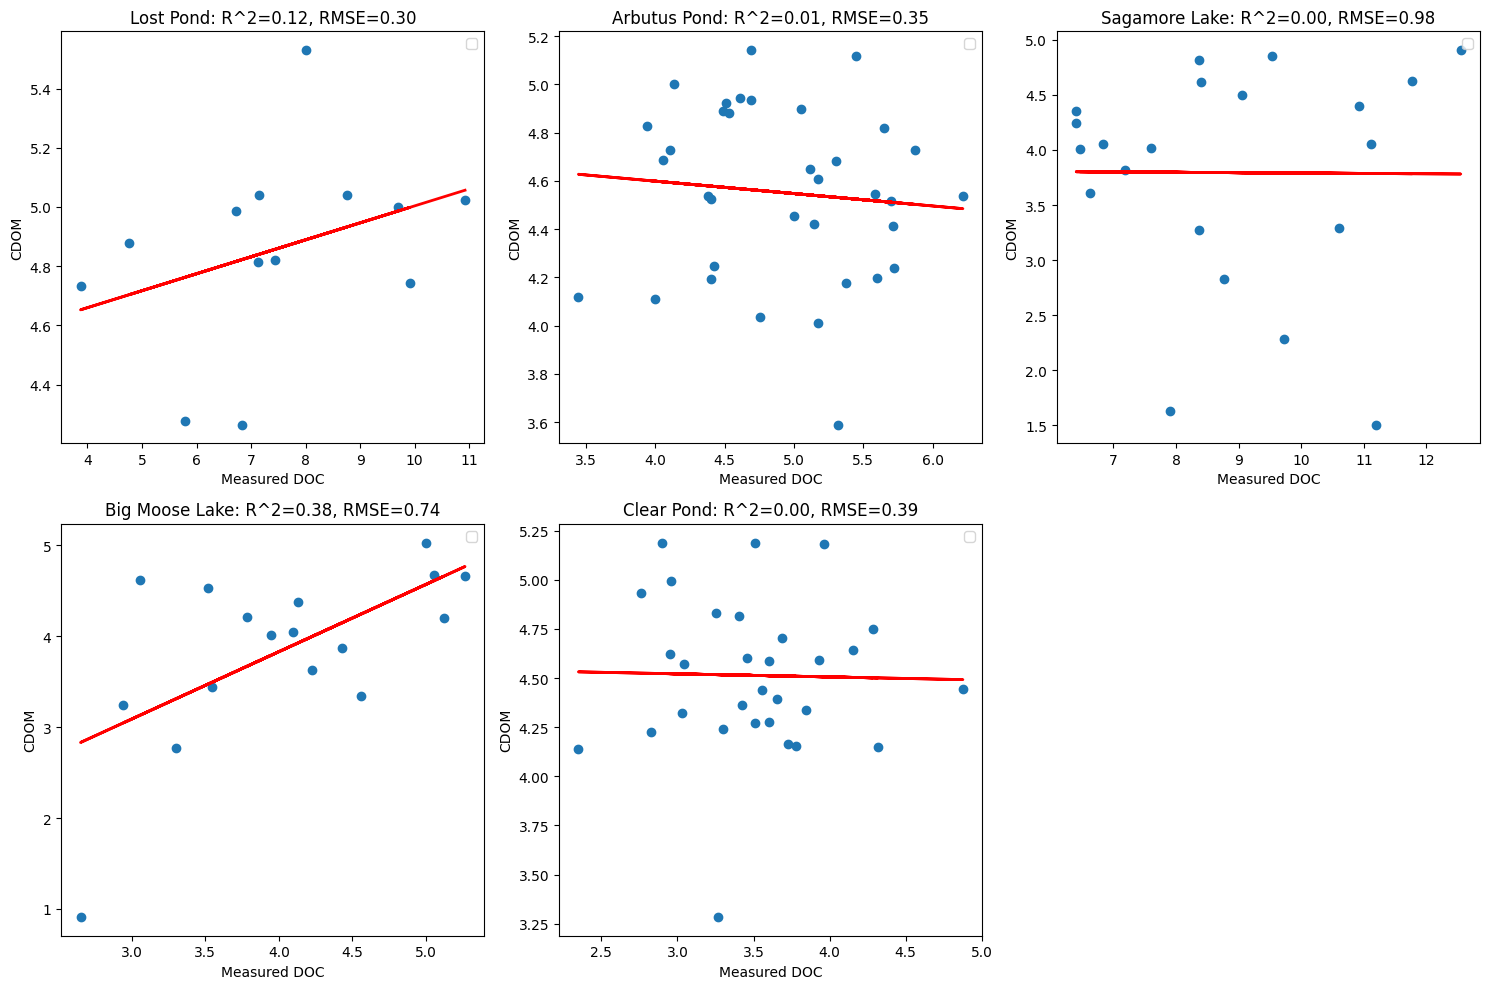

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'ln_CDOM_a440'  # Replace with the actual column name for aCDOM_485

# Create a list of lakes
lakes = ["Lost Pond", "Arbutus Pond", "Sagamore Lake", "Big Moose Lake", "Clear Pond"]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(lakes)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for all lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(lakes):
    # Filter the data for the current lake
    lake_data = merged_data[merged_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(len(lakes), num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

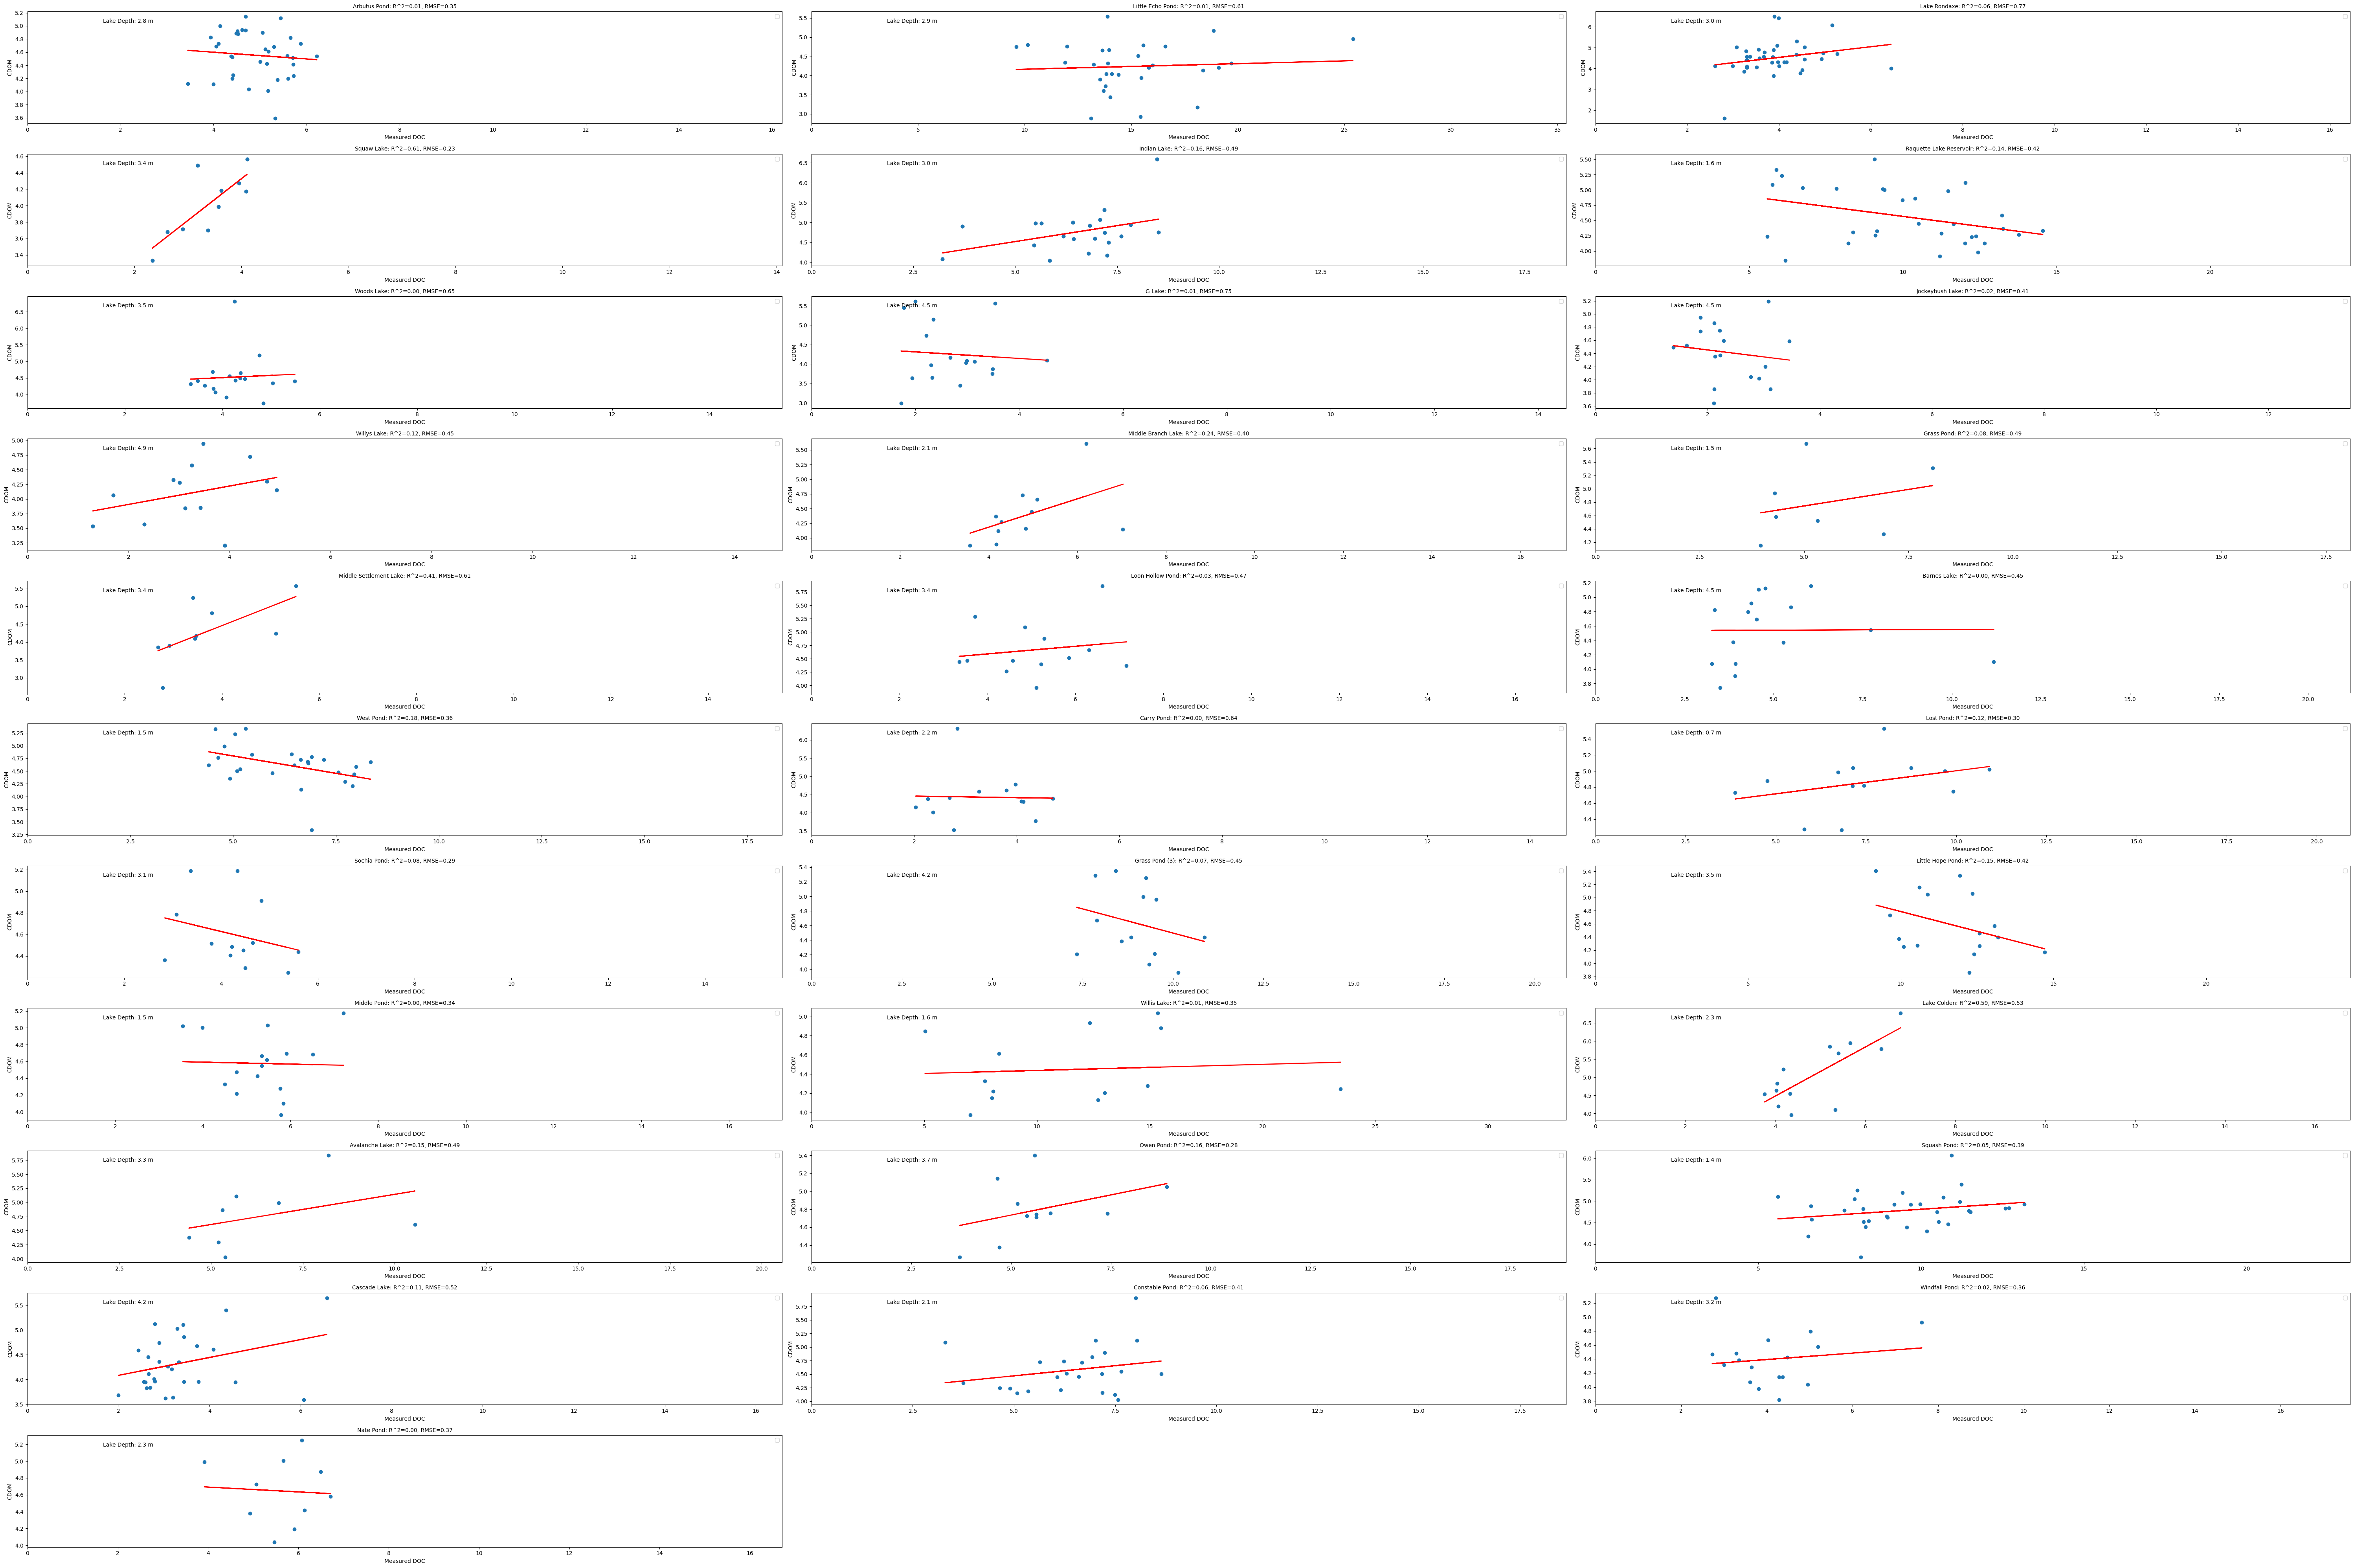

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'ln_CDOM_a440'  # Replace with the actual column name for aCDOM_485

# Filter data for lakes with LAKE_DEPTH (m) less than or equal to 5
filtered_data = merged_data[merged_data['LAKE_DEPTH_MEAN'] <= 5]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(filtered_data['SITE_NAME'].unique())
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for filtered lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(60, 40))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(filtered_data['SITE_NAME'].unique()):
    # Filter the data for the current lake
    lake_data = filtered_data[filtered_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}', fontsize=10)
        axes[i].set_xlim([0, max(X)[0] + 10])  # Adjust the x-axis limit
        axes[i].text(0.1, 0.9, f'Lake Depth: {lake_data["LAKE_DEPTH_MEAN"].values[0]:.1f} m',
                     transform=axes[i].transAxes, fontsize=10)
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(num_lakes, num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

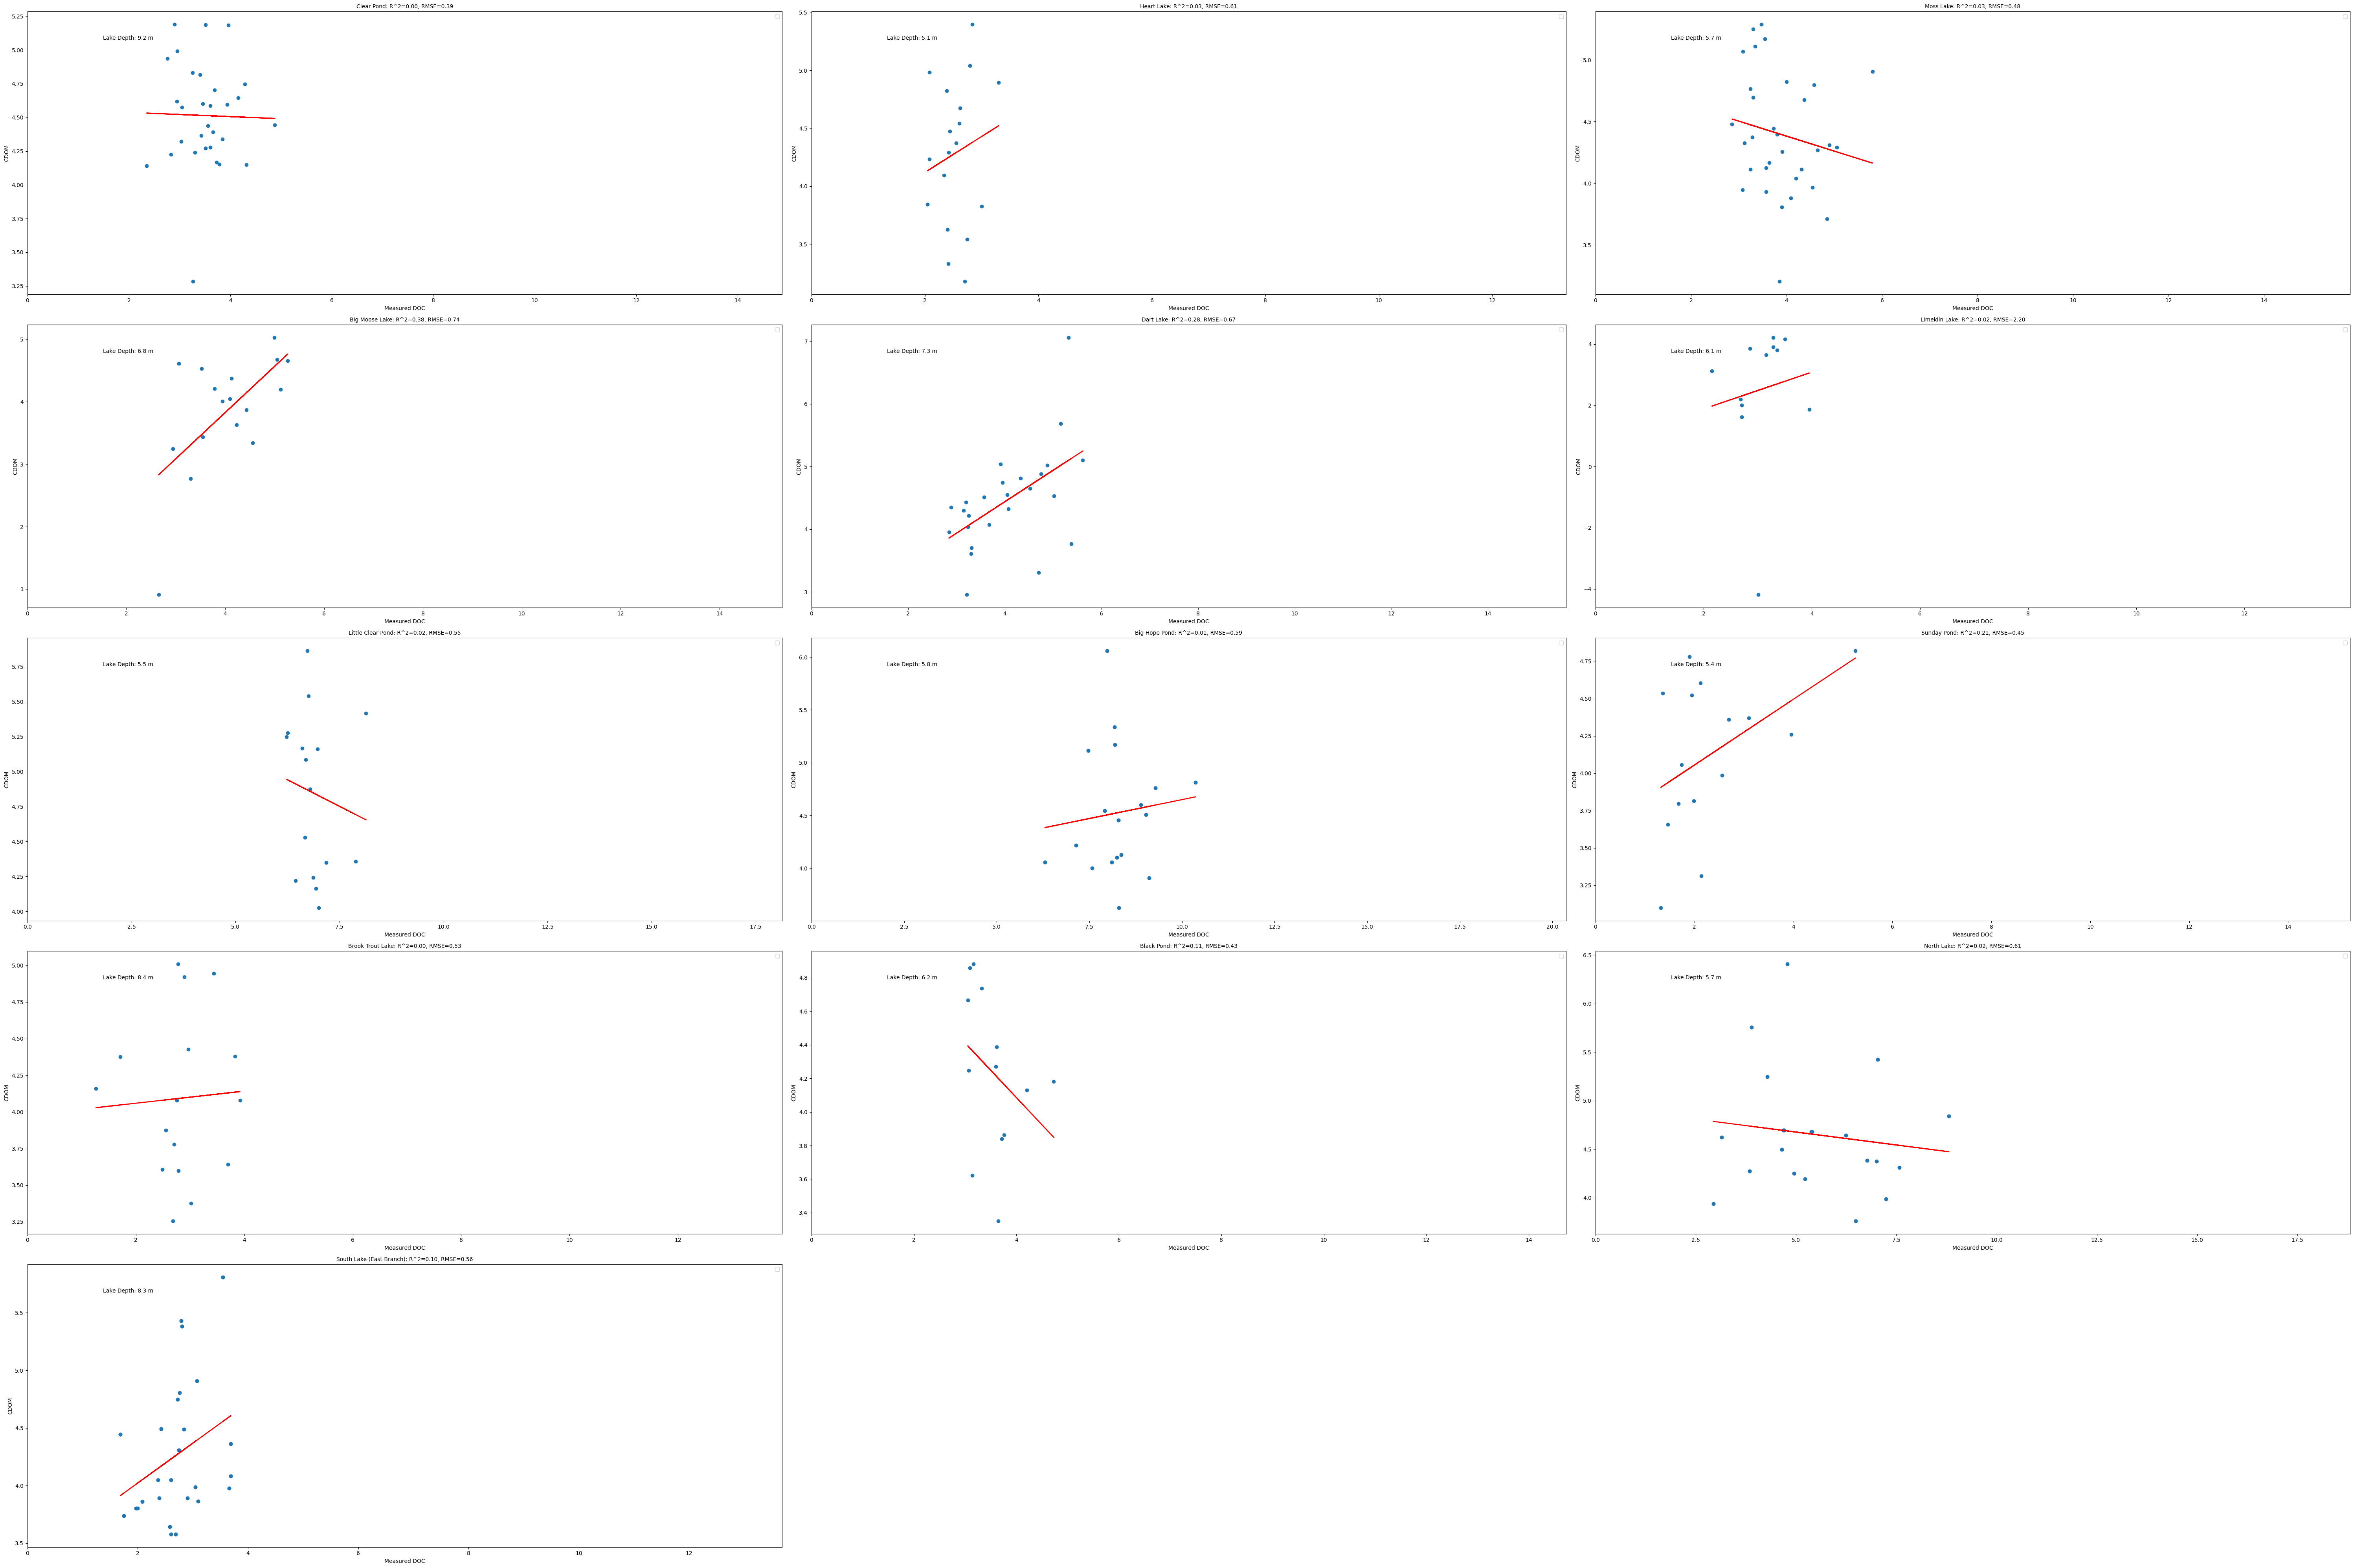

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'ln_CDOM_a440'  # Replace with the actual column name for aCDOM_485

# Filter data for lakes with LAKE_DEPTH (m) between 5 and 10
filtered_data = merged_data[(merged_data['LAKE_DEPTH_MEAN'] > 5) & (merged_data['LAKE_DEPTH_MEAN'] < 10)]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(filtered_data['SITE_NAME'].unique())
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for filtered lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(60, 40))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(filtered_data['SITE_NAME'].unique()):
    # Filter the data for the current lake
    lake_data = filtered_data[filtered_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}', fontsize=10)
        axes[i].set_xlim([0, max(X)[0] + 10])  # Adjust the x-axis limit
        axes[i].text(0.1, 0.9, f'Lake Depth: {lake_data["LAKE_DEPTH_MEAN"].values[0]:.1f} m',
                     transform=axes[i].transAxes, fontsize=10)
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(num_lakes, num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


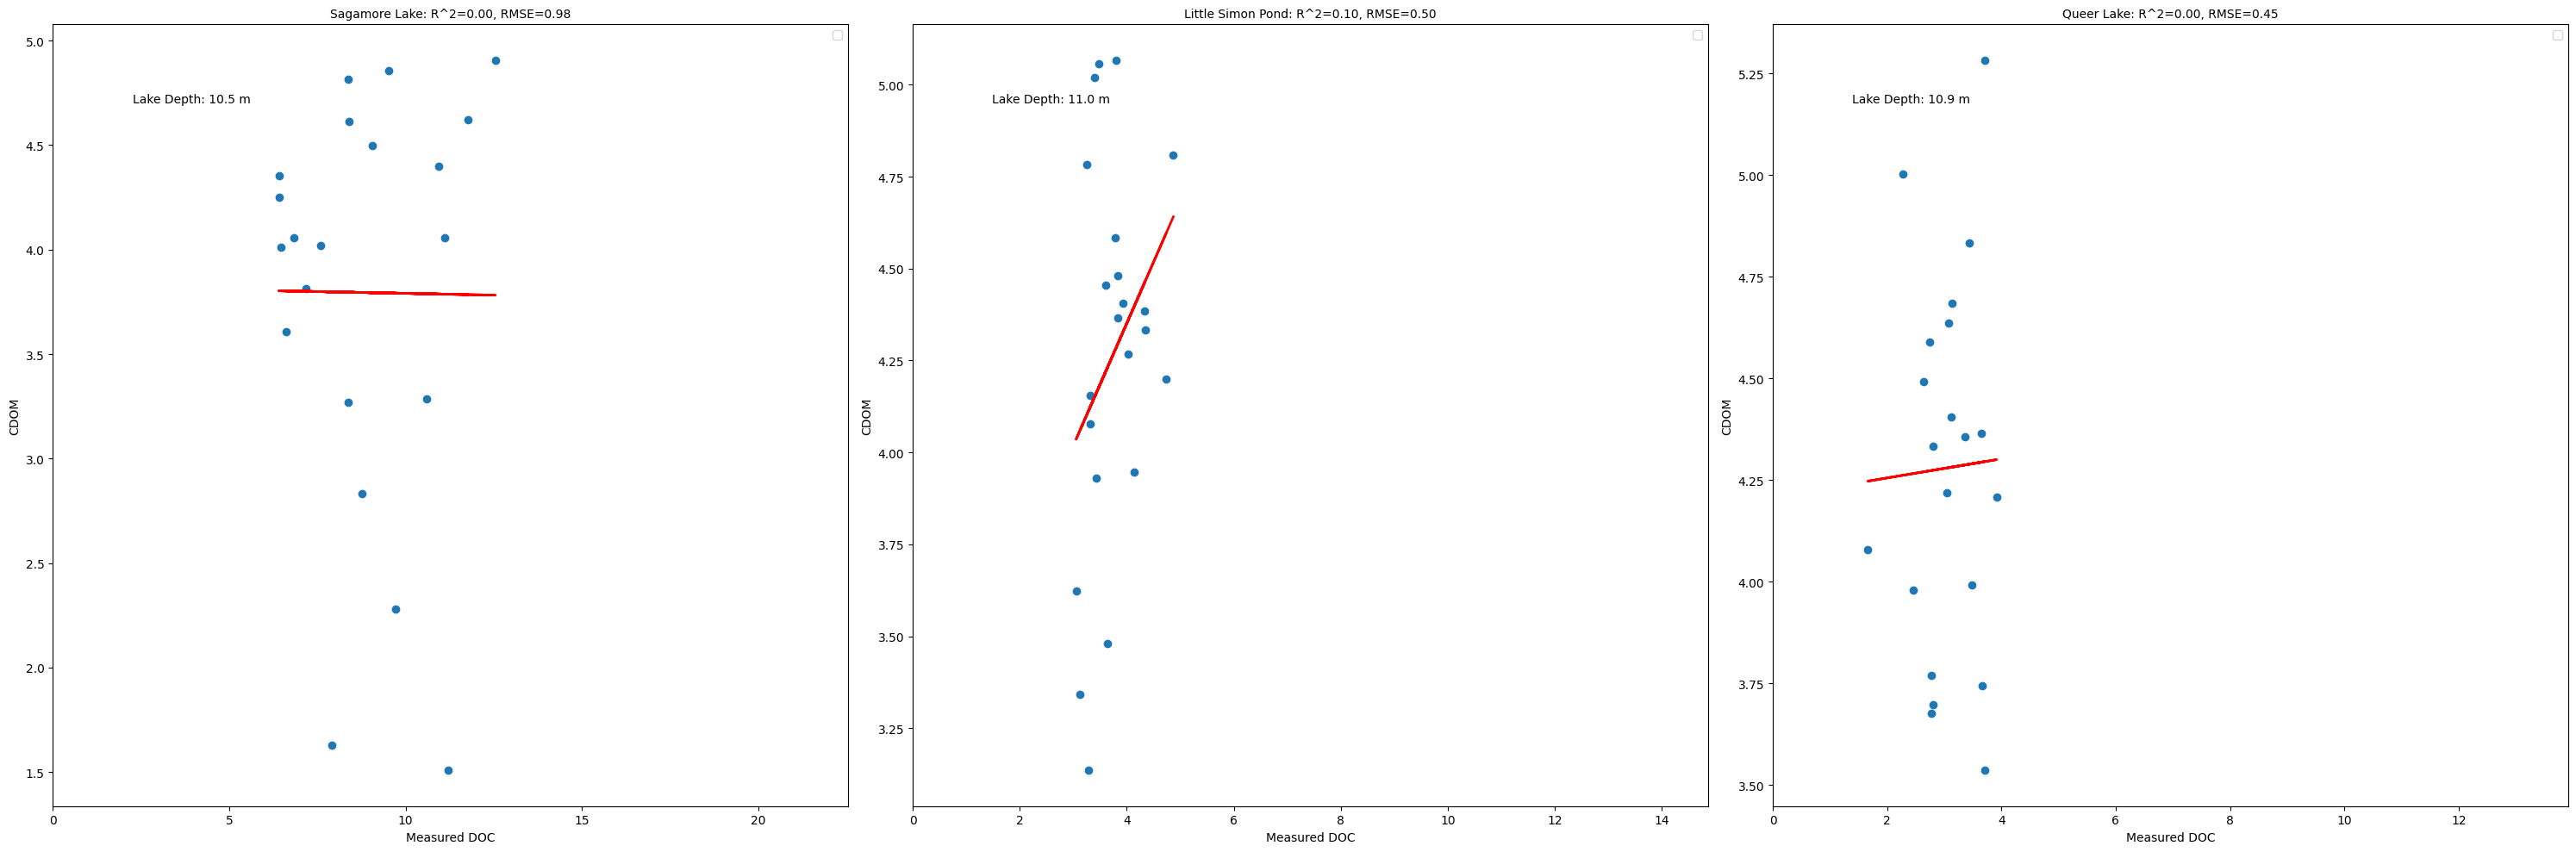

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'ln_CDOM_a440'  # Replace with the actual column name for aCDOM_485

# Filter data for lakes with LAKE_DEPTH (m) greater than 10
filtered_data = merged_data[merged_data['LAKE_DEPTH_MEAN'] > 10]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(filtered_data['SITE_NAME'].unique())
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for filtered lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 10))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(filtered_data['SITE_NAME'].unique()):
    # Filter the data for the current lake
    lake_data = filtered_data[filtered_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}', fontsize=10)
        axes[i].set_xlim([0, max(X)[0] + 10])  # Adjust the x-axis limit
        axes[i].text(0.1, 0.9, f'Lake Depth: {lake_data["LAKE_DEPTH_MEAN"].values[0]:.1f} m',
                     transform=axes[i].transAxes, fontsize=10)
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(num_lakes, num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


In [44]:
# Olmanson et al. (2016)
# LC5_BANDS = ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7', 'ST_B6', 'QA_PIXEL']
# LC8_BANDS = ['SR_B2','SR_B3','SR_B4',  'SR_B5','SR_B6','SR_B7','ST_B10','QA_PIXEL']; #Landsat 8
# STD_NAMES = ['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'temp', 'QA']


a1=14.62
a2= 2.77 
a3= -14.21
df_all_lakes['ln(a440)_equation4'] = a1 + a2 * (df_all_lakes['blue'] / df_all_lakes['nir']) + a3 * (df_all_lakes['green'] / df_all_lakes['nir'])


In [45]:
df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
data_modified['DATE_SMP'] = pd.to_datetime(data_modified['DATE_SMP'])

data_modified.sort_values('DATE_SMP', inplace=True)
df_all_lakes.sort_values('DATE_SMP', inplace=True)


merged_data = pd.merge_asof(data_modified, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=3))
# Drop rows with null values in the merged dataframe
merged_data.dropna(inplace=True)

merged_data = merged_data.dropna(subset=['blue'])

merged_data = merged_data.dropna(subset=['DOC_MG_L'])

# merged_data = merged_data[merged_data['PROGRAM_ID'] == 'LTM_ALTM']
merged_data

SITE_ID   DATE_SMP   DOC_MG_L PROGRAM_ID         SITE_NAME  \
262    1A1-052 1985-07-22   5.000000   LTM_ALTM      Arbutus Pond   
263    1A2-077 1985-07-22   3.300000   LTM_ALTM        Clear Pond   
264    1A1-107 1985-07-22  13.800000   LTM_ALTM  Little Echo Pond   
265    1A1-102 1985-07-22   3.000000   LTM_ALTM        Heart Lake   
286    1A1-102 1985-10-26   3.300000   LTM_ALTM        Heart Lake   
...        ...        ...        ...        ...               ...   
17552  1A1-111 2020-07-07  10.539715   LTM_ALTM       Squash Pond   
17558  1A1-110 2020-07-09   4.457849   LTM_ALTM      Lake Rondaxe   
17745  1A1-017 2021-05-06   8.036800   LTM_ALTM    Constable Pond   
17746  1A1-111 2021-05-06  11.240100   LTM_ALTM       Squash Pond   
17755   040576 2021-05-13   4.763200   LTM_ALTM        Woods Lake   

       LAKE_DEPTH_MEAN     LATDD     LONDD  LATDD_CENT  LONDD_CENT  ...  \
262                2.8  43.98230 -74.23556    43.98787   -74.24151  ...   
263                9.2  43.99568 -73.83082    43.99719   -73.82435  ...   
264                2.9  44.30576 -74.35721    44.30849   -74.35564  ...   
265                5.1  44.18050 -73.96726    44.18229   -73.96920  ...   
286                5.1  44.18050 -73.96726    44.18229   -73.96920  ...   
...                ...       ...       ...         ...         ...  ...   
17552              1.4  43.82557 -74.88614    43.82649   -74.88699  ...   
17558              3.0  43.76088 -74.91592    43.76697   -74.90136  ...   
17745              2.1  43.83101 -74.80642    43.83290   -74.79820  ...   
17746              1.4  43.82557 -74.88614    43.82649   -74.88699  ...   
17755              3.5  43.86566 -74.95512    43.87003   -74.95232  ...   

          swir2       temp  LAKE_LABEL  B4_B1_Ratio  aCDOM_485  Rrs_ratio1  \
262    0.008674  21.863874       194.0     2.475130  13.140845    0.745848   
263    0.009788  21.227089       198.0     3.065729  16.419260    0.672361   
264    0.006074  21.886970        23.0     3.720795  20.055535    0.532318   
265    0.008107  21.025456        37.0     2.993849  16.020256    0.589207   
286    0.033341   9.464886        37.0     2.788595  14.880891    0.893807   
...         ...        ...         ...          ...        ...         ...   
17552  0.044776  27.992958        28.0     8.002779  43.824826    0.766905   
17558  0.021865  28.701132        47.0     9.523442  52.266025    0.544737   
17745  0.043615   9.834784        21.0     9.192036  50.426389    0.915704   
17746  0.033294  11.411781        28.0     7.593103  41.550713    0.964441   
17755  0.046172  14.590739        60.0     2.334074  12.357847    1.015194   

       Rrs_ratio2    ln_a440  ln_CDOM_a440  ln(a440)_equation4  
262      1.945299   9.865341      4.456519            8.434343  
263      2.274927  10.424510      4.241067            9.277182  
264      2.447787  10.675112      3.729107            9.559221  
265      2.084973  10.049569      3.826163            8.729795  
286      2.174652  10.338026      4.896757            9.078954  
...           ...        ...           ...                 ...  
17552    5.030513  15.396718      4.522784           12.141368  
17558    3.636551  12.808215      3.783914           11.003312  
17745    4.826249  15.093581      5.121629           11.977032  
17746    4.368309  14.294338      5.390803           11.731830  
17755    1.838605   9.787484      5.187117            8.078079  

[985 rows x 26 columns]

R^2: 0.05712182608734906
RMSE: 1.7345745474321623


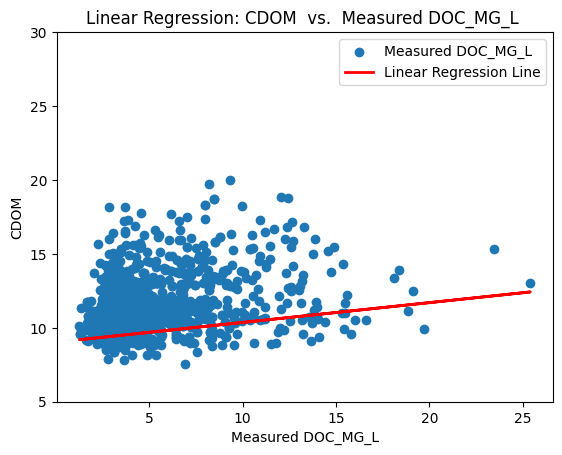

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X = merged_data['DOC_MG_L'].values.reshape(-1, 1)
y = merged_data['ln(a440)_equation4'].values

# Create a linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Predict y values using the model
y_pred = regression_model.predict(X)

# Calculate R^2
r2 = r2_score(y, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Print R^2 and RMSE
print("R^2:", r2)
print("RMSE:", rmse)

# Plot measured DOC_MG_L against aCDOM
plt.scatter(merged_data['DOC_MG_L'], merged_data['ln_a440'],  label='Measured DOC_MG_L')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Measured DOC_MG_L')
plt.ylabel('CDOM')
plt.title('Linear Regression: CDOM  vs.  Measured DOC_MG_L ')
plt.legend()
plt.ylim(5,30)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


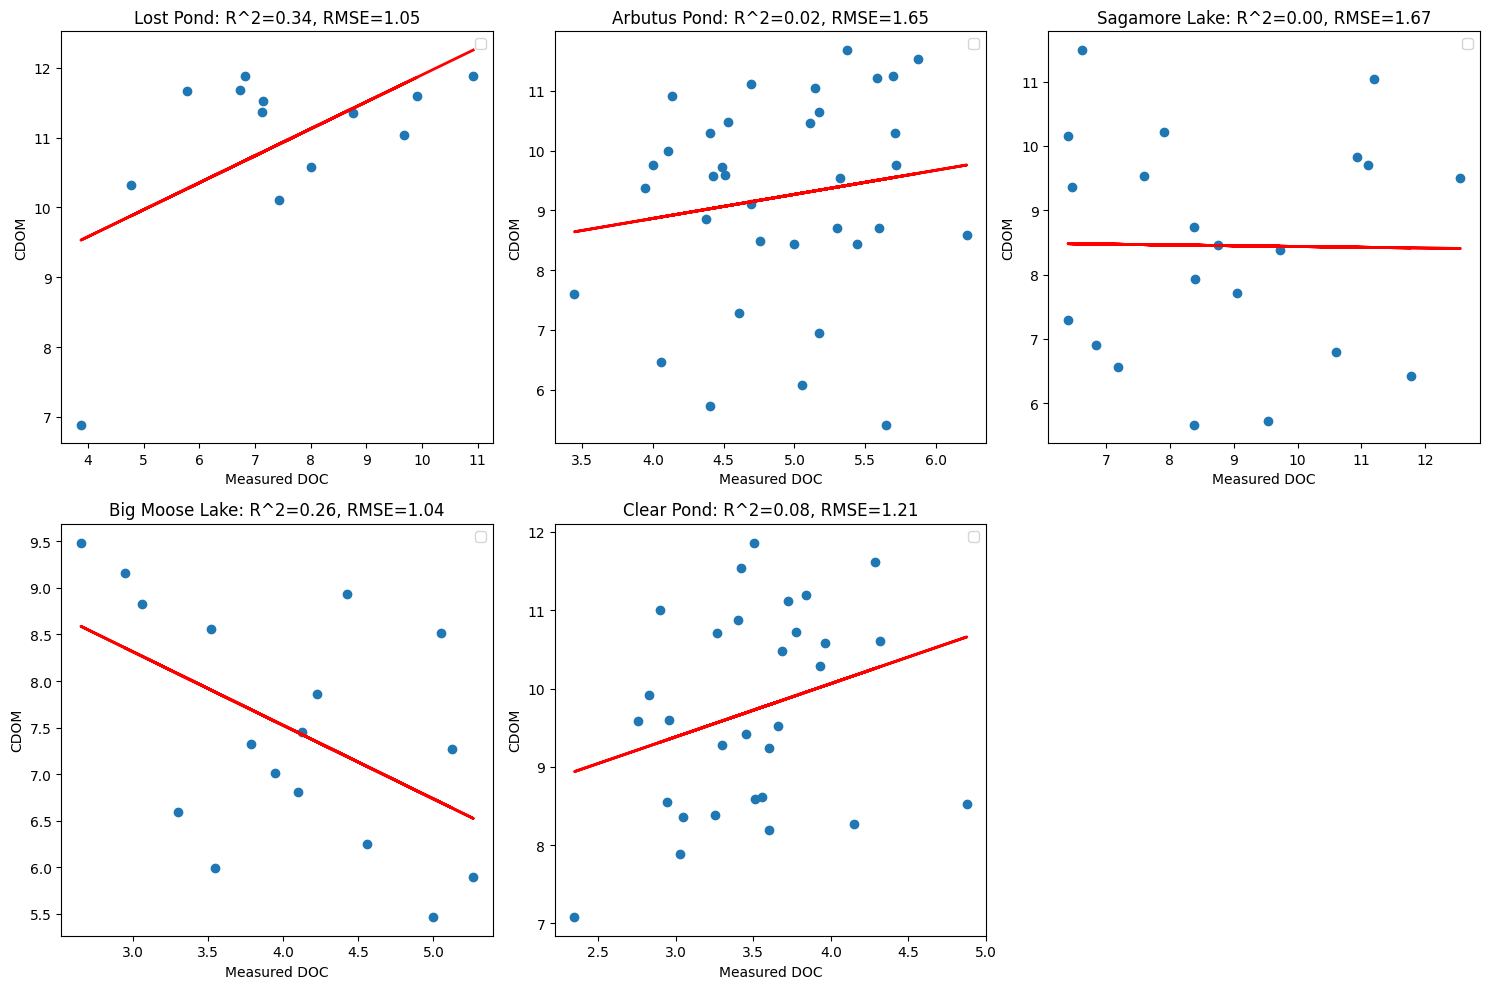

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'ln(a440)_equation4'  # Replace with the actual column name for aCDOM_485

# Create a list of lakes
lakes = ["Lost Pond", "Arbutus Pond", "Sagamore Lake", "Big Moose Lake", "Clear Pond"]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(lakes)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for all lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(lakes):
    # Filter the data for the current lake
    lake_data = merged_data[merged_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(len(lakes), num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

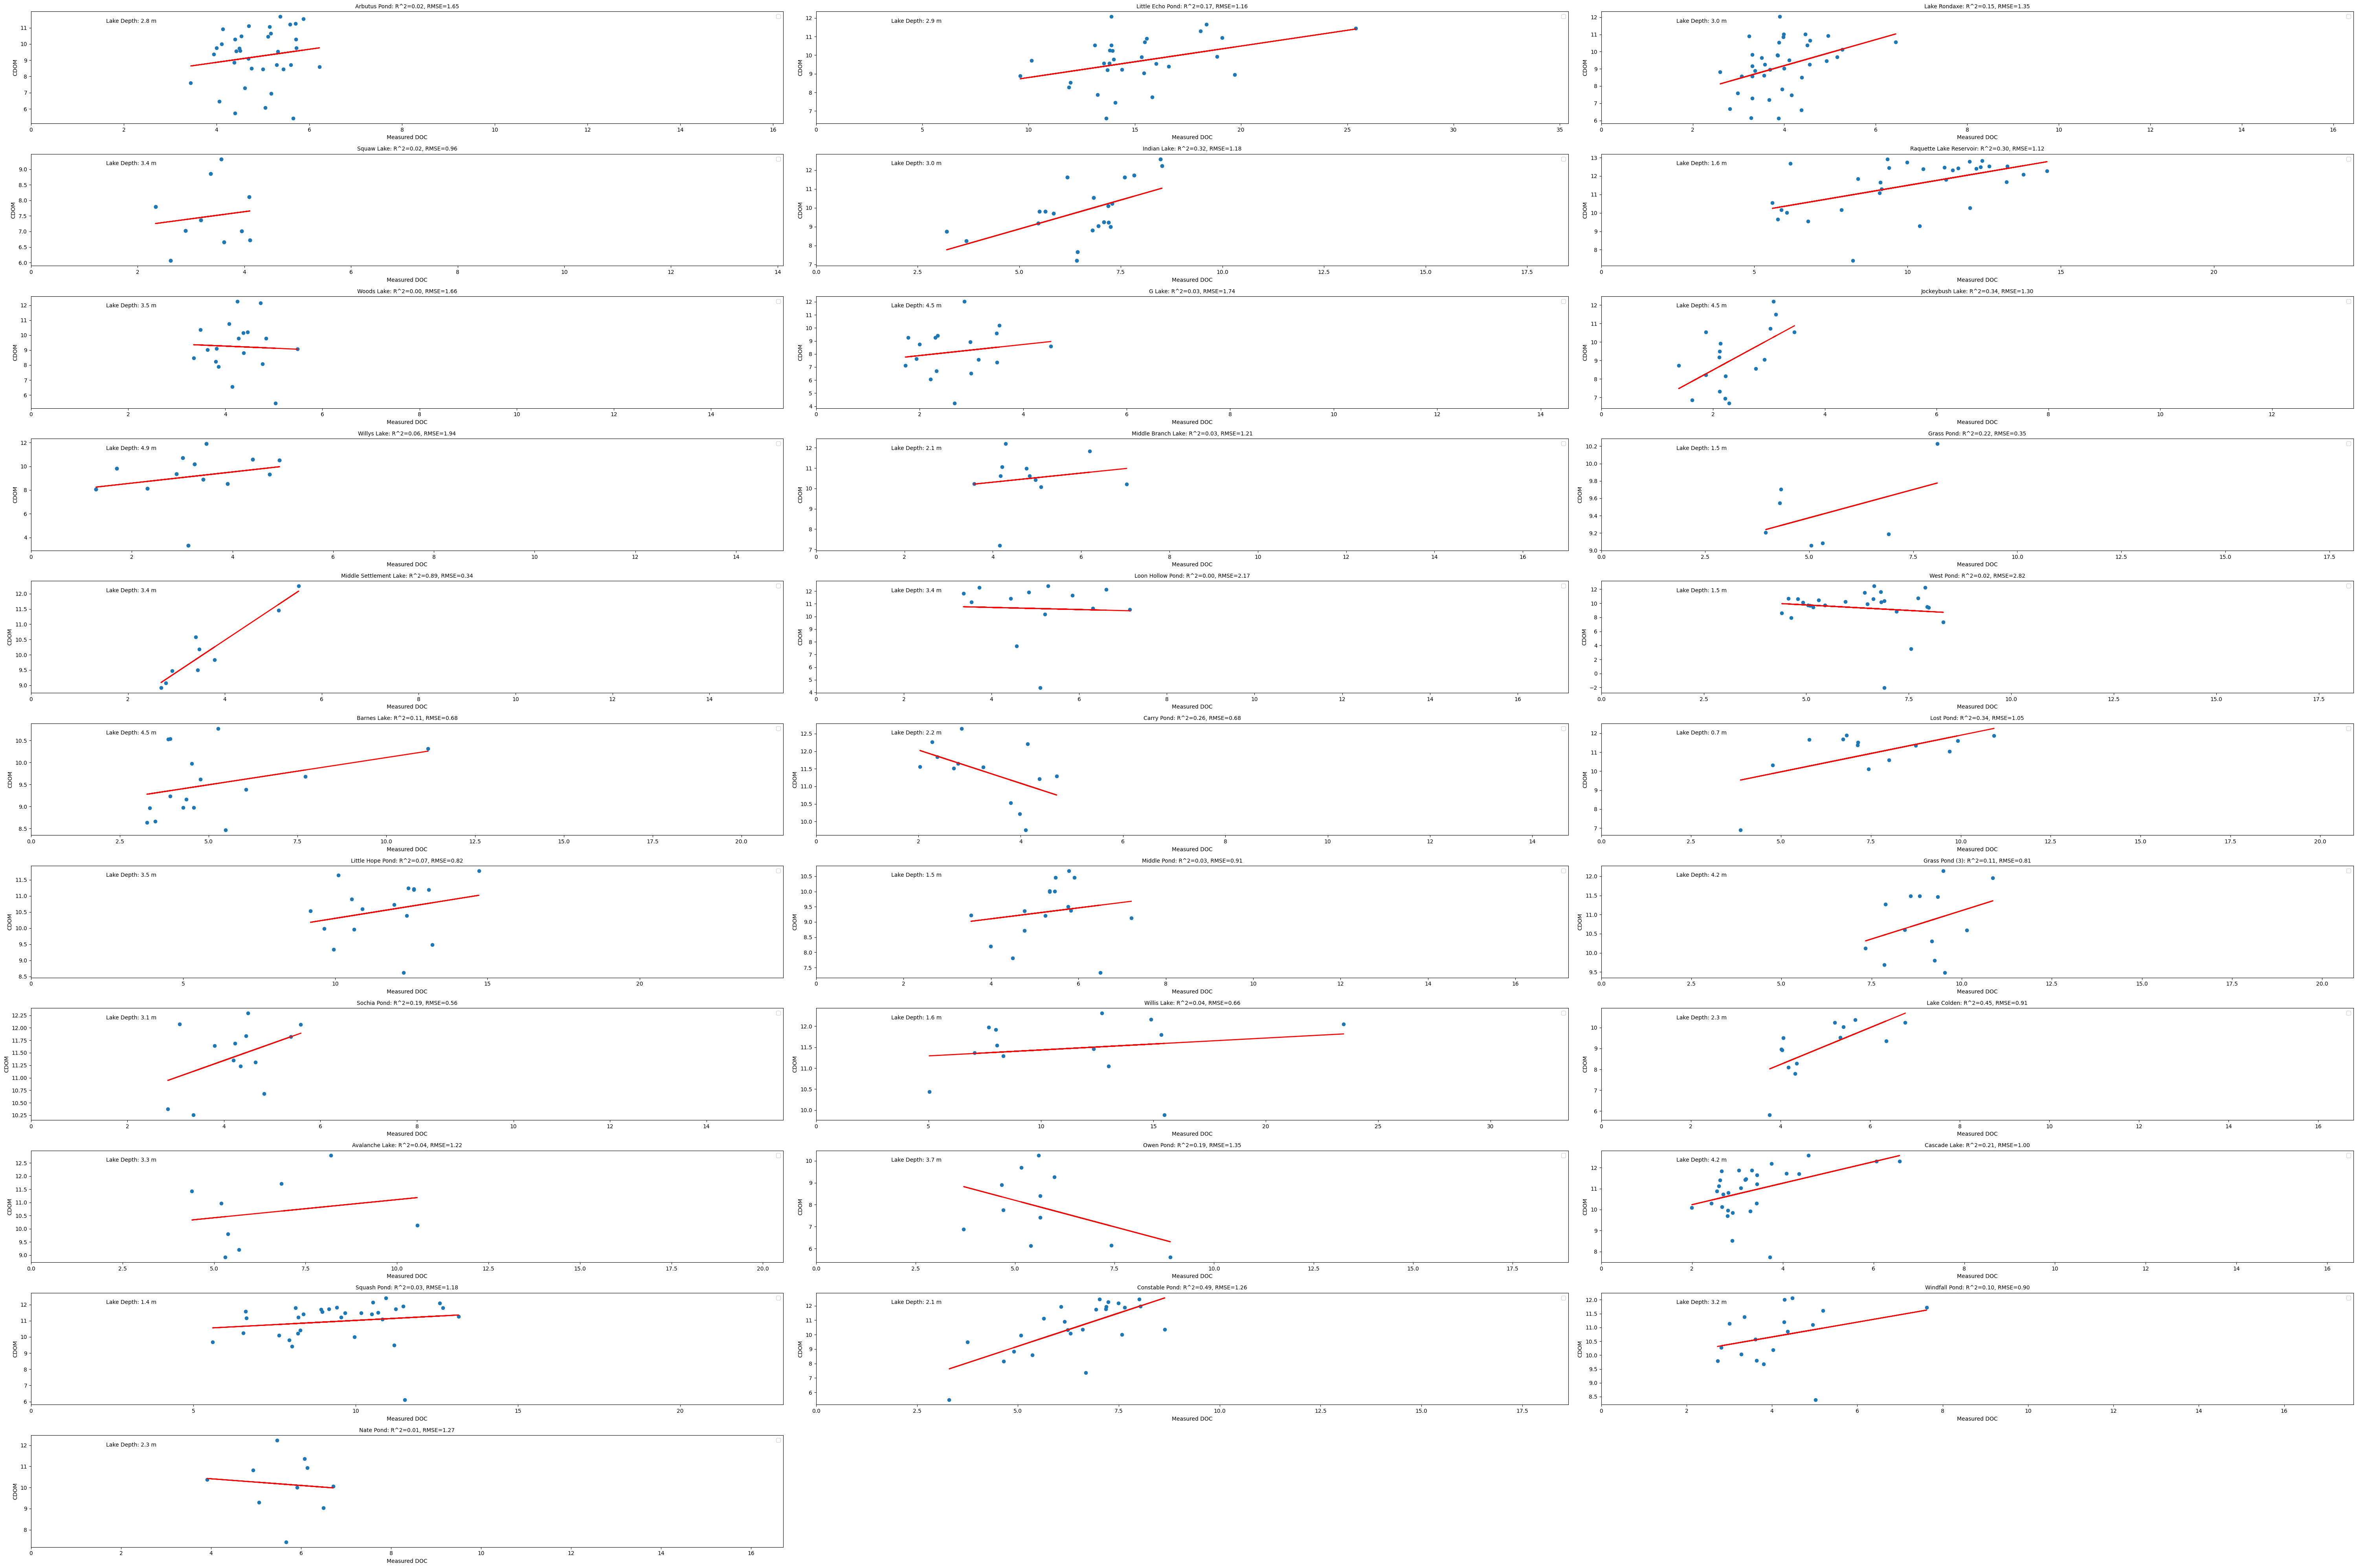

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'ln(a440)_equation4'  # Replace with the actual column name for aCDOM_485

# Filter data for lakes with LAKE_DEPTH (m) less than or equal to 5
filtered_data = merged_data[merged_data['LAKE_DEPTH_MEAN'] <= 5]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(filtered_data['SITE_NAME'].unique())
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for filtered lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(60, 40))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(filtered_data['SITE_NAME'].unique()):
    # Filter the data for the current lake
    lake_data = filtered_data[filtered_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}', fontsize=10)
        axes[i].set_xlim([0, max(X)[0] + 10])  # Adjust the x-axis limit
        axes[i].text(0.1, 0.9, f'Lake Depth: {lake_data["LAKE_DEPTH_MEAN"].values[0]:.1f} m',
                     transform=axes[i].transAxes, fontsize=10)
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(num_lakes, num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

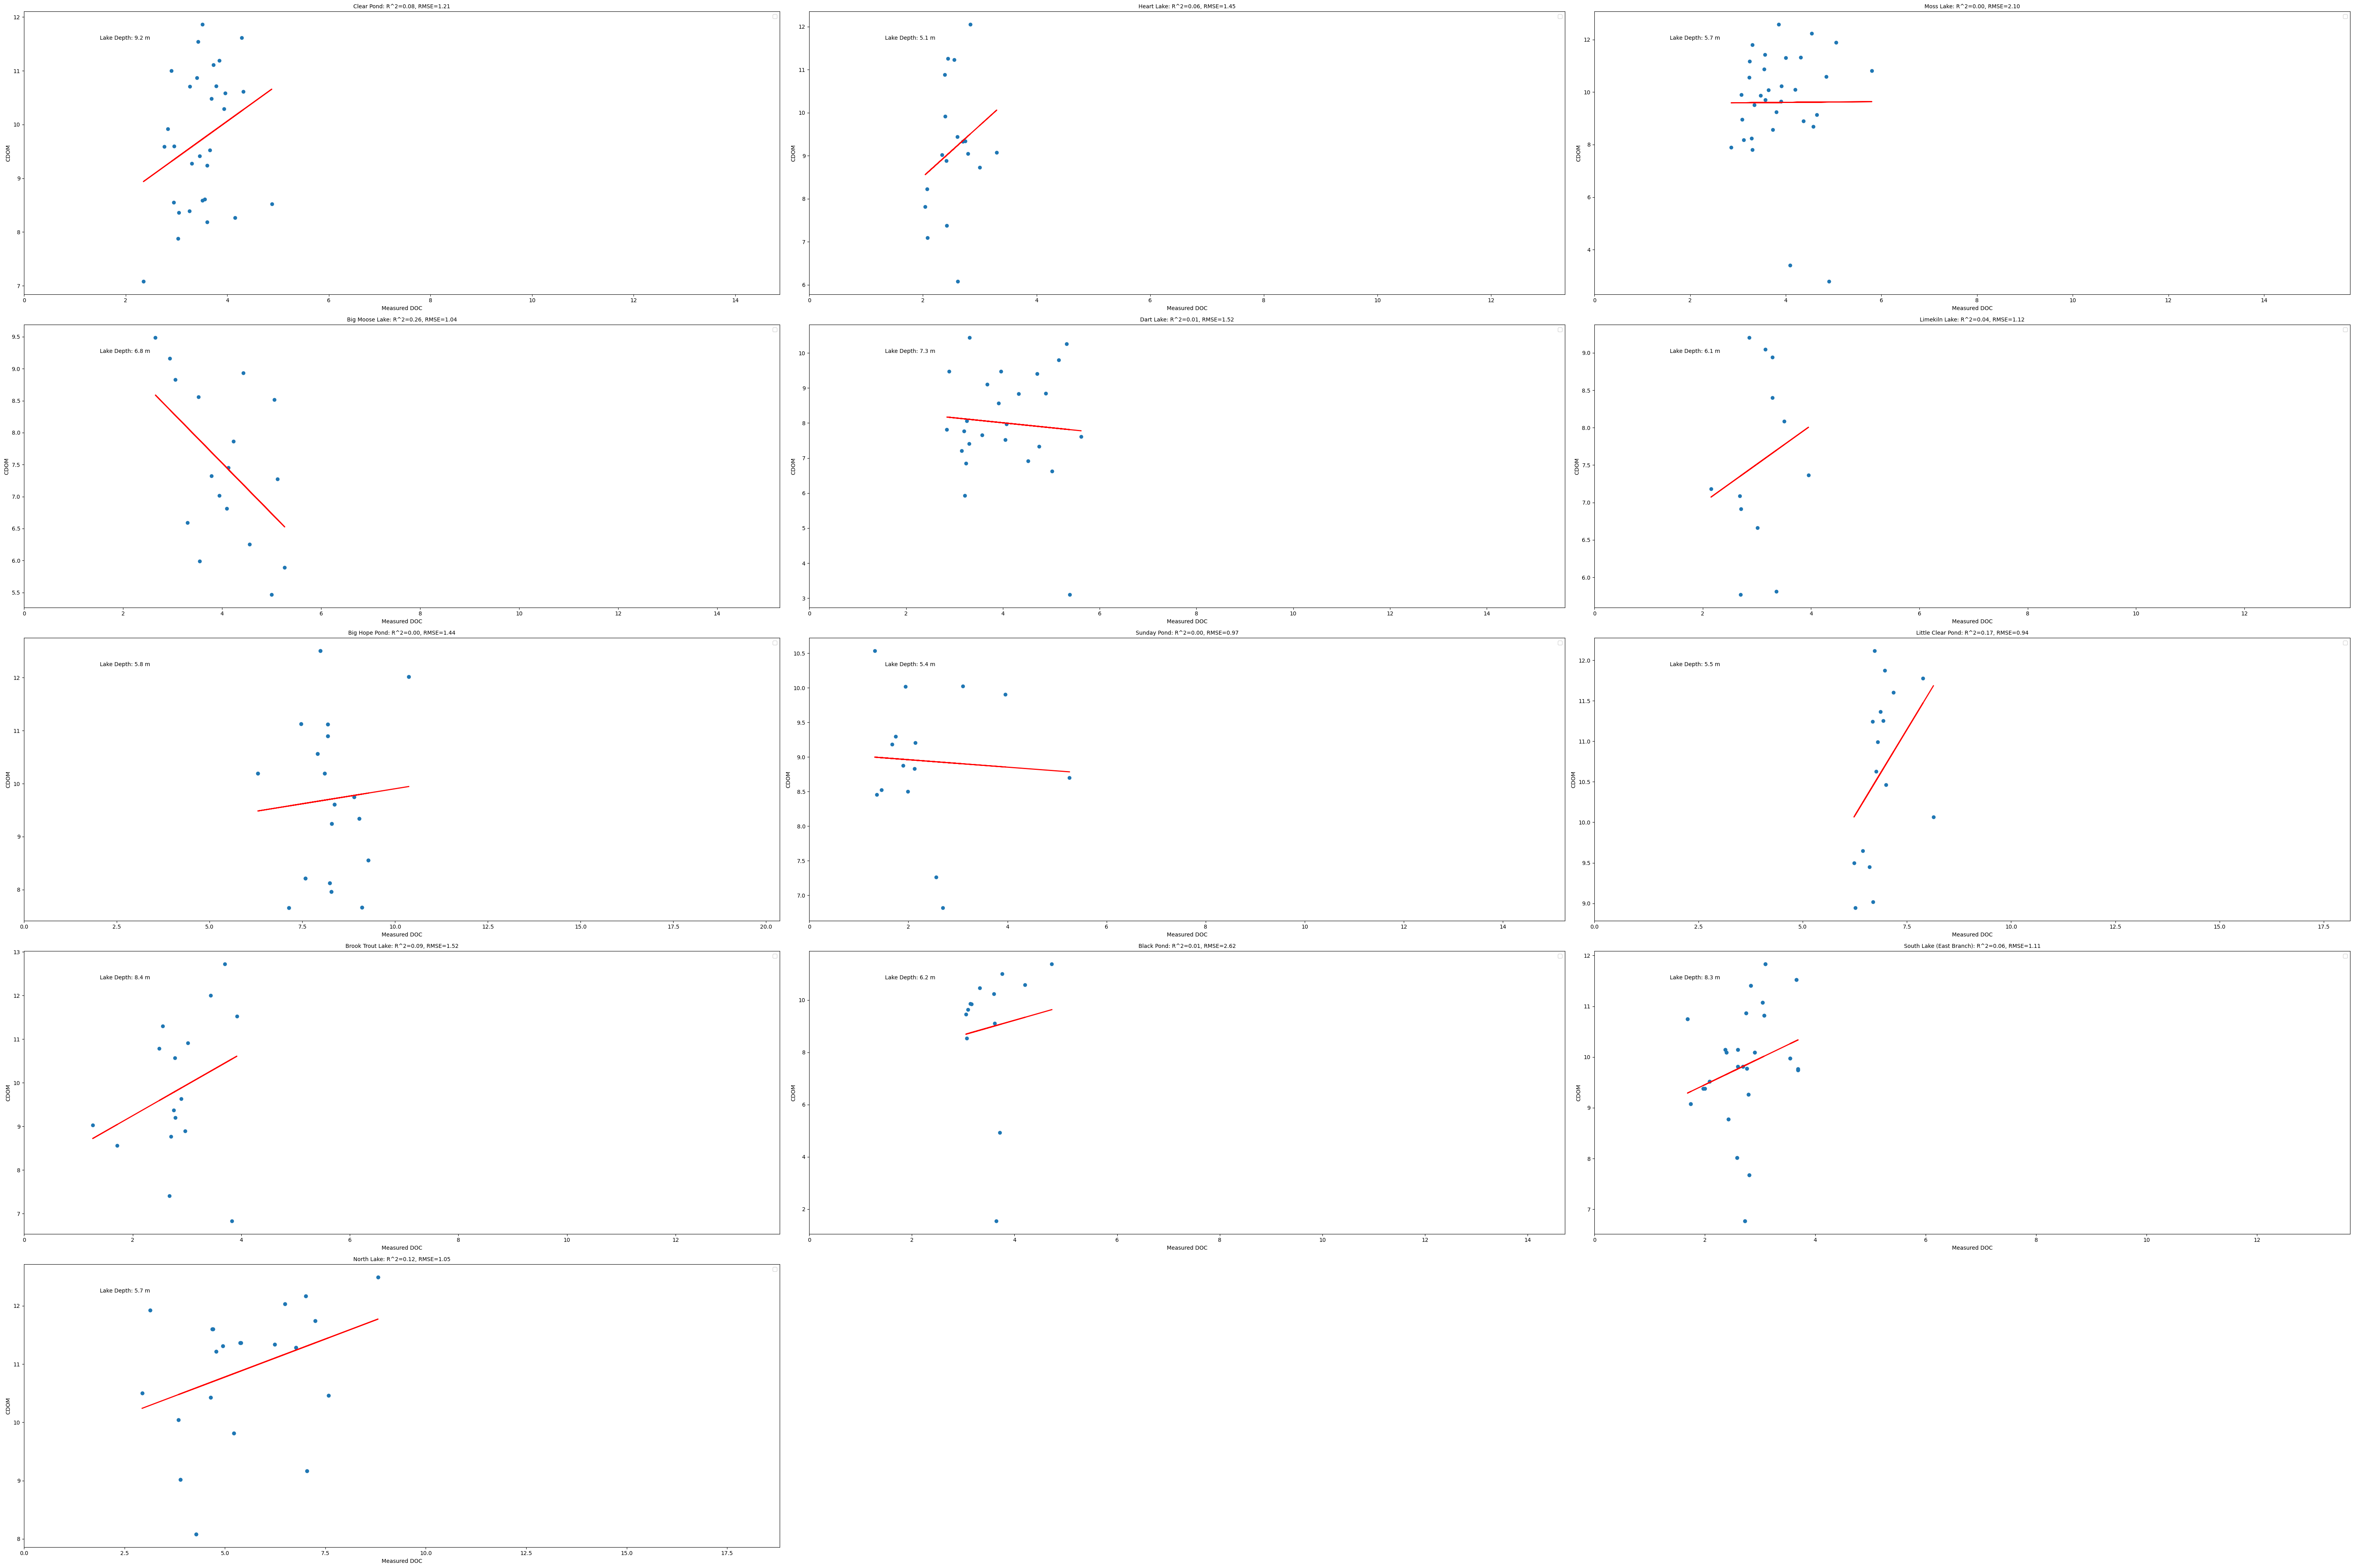

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'ln(a440)_equation4'  # Replace with the actual column name for aCDOM_485

# Filter data for lakes with LAKE_DEPTH (m) between 5 and 10
filtered_data = merged_data[(merged_data['LAKE_DEPTH_MEAN'] > 5) & (merged_data['LAKE_DEPTH_MEAN'] < 10)]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(filtered_data['SITE_NAME'].unique())
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for filtered lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(60, 40))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(filtered_data['SITE_NAME'].unique()):
    # Filter the data for the current lake
    lake_data = filtered_data[filtered_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}', fontsize=10)
        axes[i].set_xlim([0, max(X)[0] + 10])  # Adjust the x-axis limit
        axes[i].text(0.1, 0.9, f'Lake Depth: {lake_data["LAKE_DEPTH_MEAN"].values[0]:.1f} m',
                     transform=axes[i].transAxes, fontsize=10)
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(num_lakes, num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


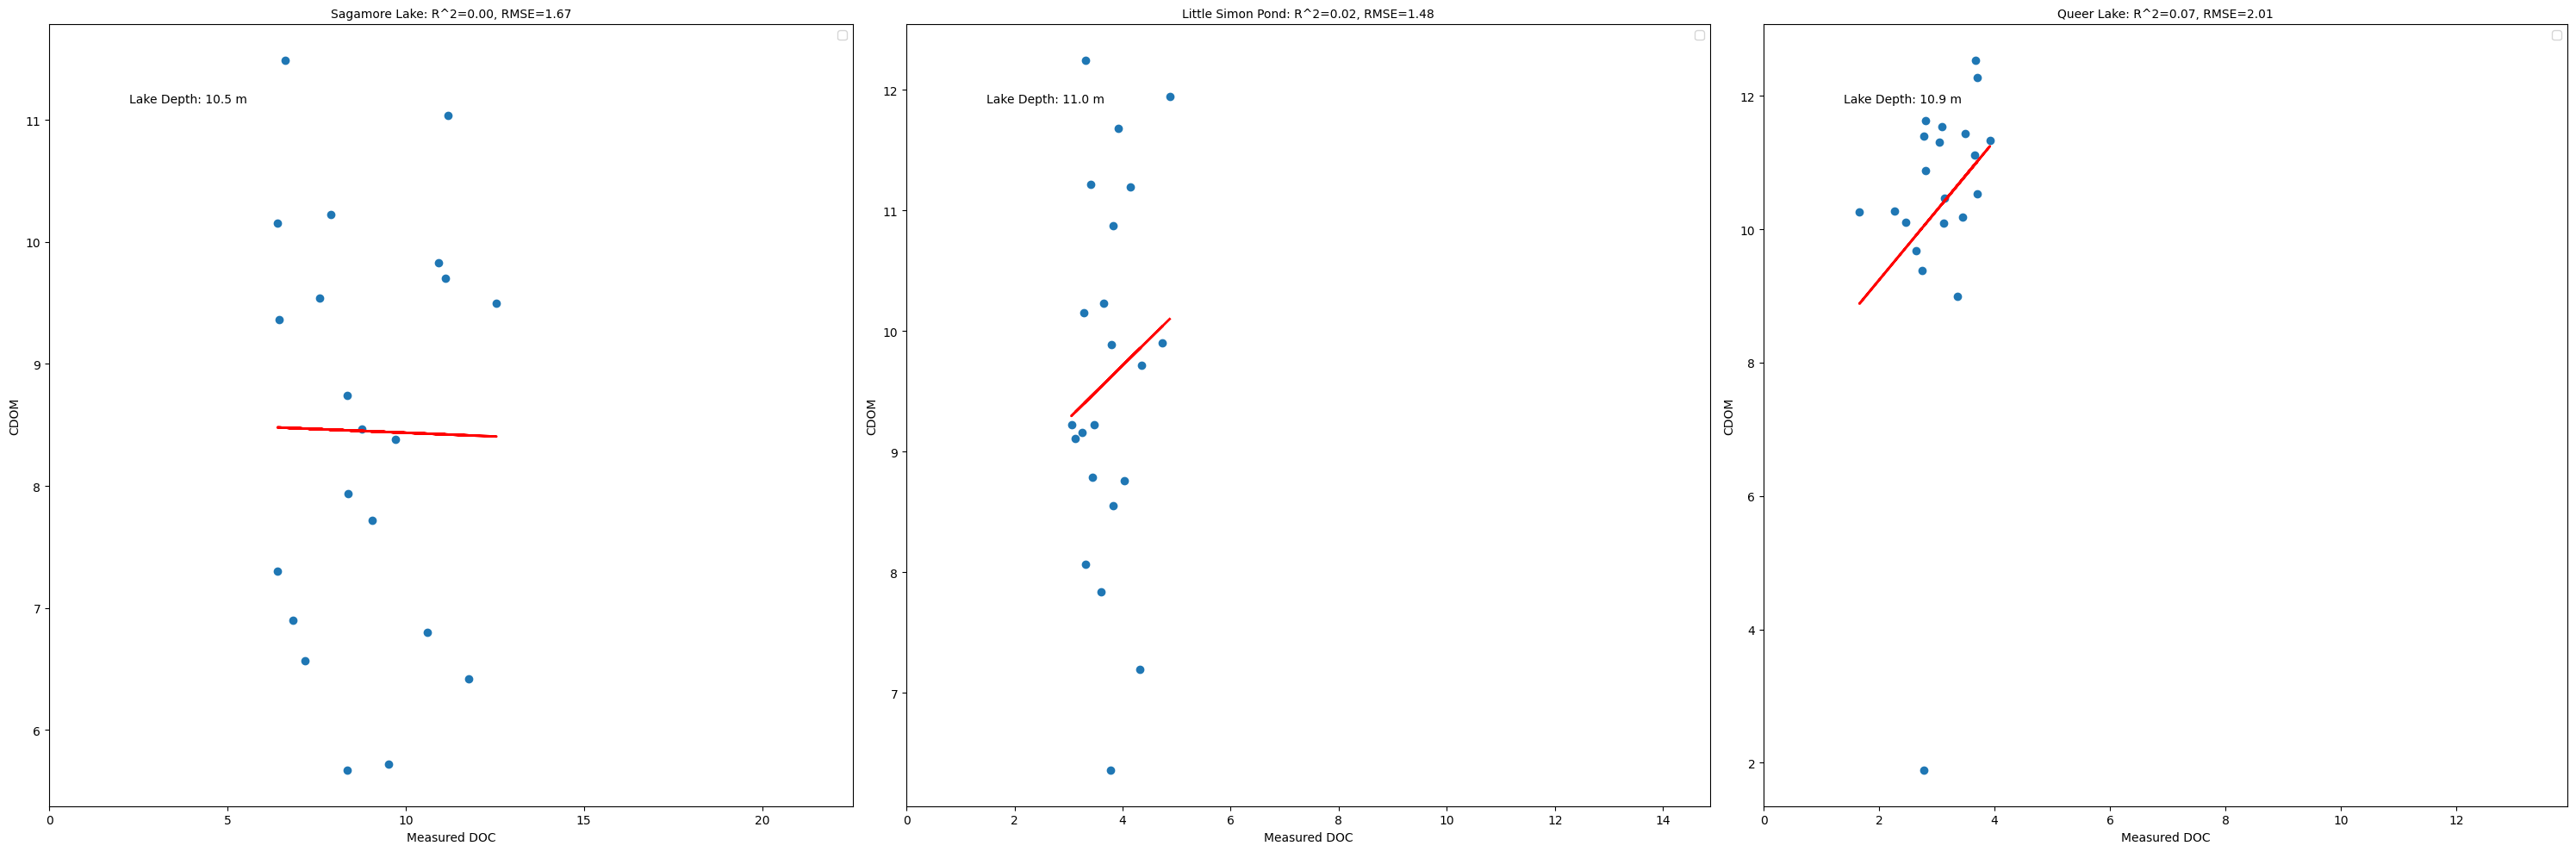

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'ln(a440)_equation4'  # Replace with the actual column name for aCDOM_485

# Filter data for lakes with LAKE_DEPTH (m) greater than 10
filtered_data = merged_data[merged_data['LAKE_DEPTH_MEAN'] > 10]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(filtered_data['SITE_NAME'].unique())
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for filtered lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 10))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(filtered_data['SITE_NAME'].unique()):
    # Filter the data for the current lake
    lake_data = filtered_data[filtered_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}', fontsize=10)
        axes[i].set_xlim([0, max(X)[0] + 10])  # Adjust the x-axis limit
        axes[i].text(0.1, 0.9, f'Lake Depth: {lake_data["LAKE_DEPTH_MEAN"].values[0]:.1f} m',
                     transform=axes[i].transAxes, fontsize=10)
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(num_lakes, num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


In [51]:
#Brezonik et al. (2005)
a1= 2.304
a2= -255.88 
a3= -0.2542

# LC5_BANDS = ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7', 'ST_B6', 'QA_PIXEL']
# LC8_BANDS = ['SR_B2','SR_B3','SR_B4',  'SR_B5','SR_B6','SR_B7','ST_B10','QA_PIXEL']; #Landsat 8
# STD_NAMES = ['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'temp', 'QA']

df_all_lakes['ln(a440)_equation5'] = a1 + a2 * df_all_lakes['green'] + a3 * (df_all_lakes['green'] / df_all_lakes['swir1'])



In [52]:
df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
data_modified['DATE_SMP'] = pd.to_datetime(data_modified['DATE_SMP'])

data_modified.sort_values('DATE_SMP', inplace=True)
df_all_lakes.sort_values('DATE_SMP', inplace=True)


merged_data = pd.merge_asof(data_modified, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=3))
# Drop rows with null values in the merged dataframe
merged_data.dropna(inplace=True)

merged_data = merged_data.dropna(subset=['blue'])

merged_data = merged_data.dropna(subset=['DOC_MG_L'])

# merged_data = merged_data[merged_data['PROGRAM_ID'] == 'LTM_ALTM']
merged_data

SITE_ID   DATE_SMP   DOC_MG_L PROGRAM_ID         SITE_NAME  \
262    1A1-052 1985-07-22   5.000000   LTM_ALTM      Arbutus Pond   
263    1A2-077 1985-07-22   3.300000   LTM_ALTM        Clear Pond   
264    1A1-107 1985-07-22  13.800000   LTM_ALTM  Little Echo Pond   
265    1A1-102 1985-07-22   3.000000   LTM_ALTM        Heart Lake   
286    1A1-102 1985-10-26   3.300000   LTM_ALTM        Heart Lake   
...        ...        ...        ...        ...               ...   
17553  1A1-105 2020-07-07   6.066766   LTM_ALTM      Cascade Lake   
17558  1A1-110 2020-07-09   4.457849   LTM_ALTM      Lake Rondaxe   
17745  1A1-111 2021-05-06  11.240100   LTM_ALTM       Squash Pond   
17746  1A1-017 2021-05-06   8.036800   LTM_ALTM    Constable Pond   
17755   040576 2021-05-13   4.763200   LTM_ALTM        Woods Lake   

       LAKE_DEPTH_MEAN     LATDD     LONDD  LATDD_CENT  LONDD_CENT  ...  \
262                2.8  43.98230 -74.23556    43.98787   -74.24151  ...   
263                9.2  43.99568 -73.83082    43.99719   -73.82435  ...   
264                2.9  44.30576 -74.35721    44.30849   -74.35564  ...   
265                5.1  44.18050 -73.96726    44.18229   -73.96920  ...   
286                5.1  44.18050 -73.96726    44.18229   -73.96920  ...   
...                ...       ...       ...         ...         ...  ...   
17553              4.2  43.78910 -74.81204    43.79039   -74.80236  ...   
17558              3.0  43.76088 -74.91592    43.76697   -74.90136  ...   
17745              1.4  43.82557 -74.88614    43.82649   -74.88699  ...   
17746              2.1  43.83101 -74.80642    43.83290   -74.79820  ...   
17755              3.5  43.86566 -74.95512    43.87003   -74.95232  ...   

            temp  LAKE_LABEL  B4_B1_Ratio  aCDOM_485  Rrs_ratio1  Rrs_ratio2  \
262    21.863874       194.0     2.475130  13.140845    0.745848    1.945299   
263    21.227089       198.0     3.065729  16.419260    0.672361    2.274927   
264    21.886970        23.0     3.720795  20.055535    0.532318    2.447787   
265    21.025456        37.0     2.993849  16.020256    0.589207    2.084973   
286     9.464886        37.0     2.788595  14.880891    0.893807    2.174652   
...          ...         ...          ...        ...         ...         ...   
17553  26.343214        40.0     8.459851  46.362031    0.560806    5.392583   
17558  28.701132        47.0     9.523442  52.266025    0.544737    3.636551   
17745  11.411781        28.0     7.593103  41.550713    0.964441    4.368309   
17746   9.834784        21.0     9.192036  50.426389    0.915704    4.826249   
17755  14.590739        60.0     2.334074  12.357847    1.015194    1.838605   

         ln_a440  ln_CDOM_a440  ln(a440)_equation4  ln(a440)_equation5  
262     9.865341      4.456519            8.434343           -3.799960  
263    10.424510      4.241067            9.277182           -2.915906  
264    10.675112      3.729107            9.559221           -1.625332  
265    10.049569      3.826163            8.729795           -3.623218  
286    10.338026      4.896757            9.078954           -4.905120  
...          ...           ...                 ...                 ...  
17553  15.958263      3.592111           12.312328           -5.427318  
17558  12.808215      3.783914           11.003312           -4.316837  
17745  14.294338      5.390803           11.731830           -2.710016  
17746  15.093581      5.121629           11.977032           -4.989429  
17755   9.787484      5.187117            8.078079           -6.334903  

[984 rows x 27 columns]

R^2: 0.0026994174037431318
RMSE: 11.948158041904072


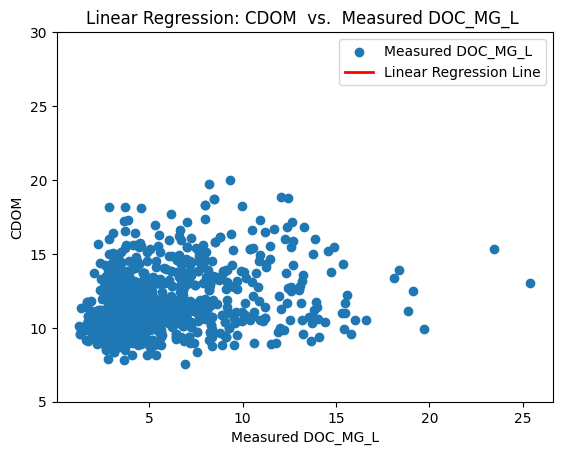

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X = merged_data['DOC_MG_L'].values.reshape(-1, 1)
y = merged_data['ln(a440)_equation5'].values

# Create a linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Predict y values using the model
y_pred = regression_model.predict(X)

# Calculate R^2
r2 = r2_score(y, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Print R^2 and RMSE
print("R^2:", r2)
print("RMSE:", rmse)

# Plot measured DOC_MG_L against aCDOM
plt.scatter(merged_data['DOC_MG_L'], merged_data['ln_a440'],  label='Measured DOC_MG_L')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Measured DOC_MG_L')
plt.ylabel('CDOM')
plt.title('Linear Regression: CDOM  vs.  Measured DOC_MG_L ')
plt.legend()
plt.ylim(5,30)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


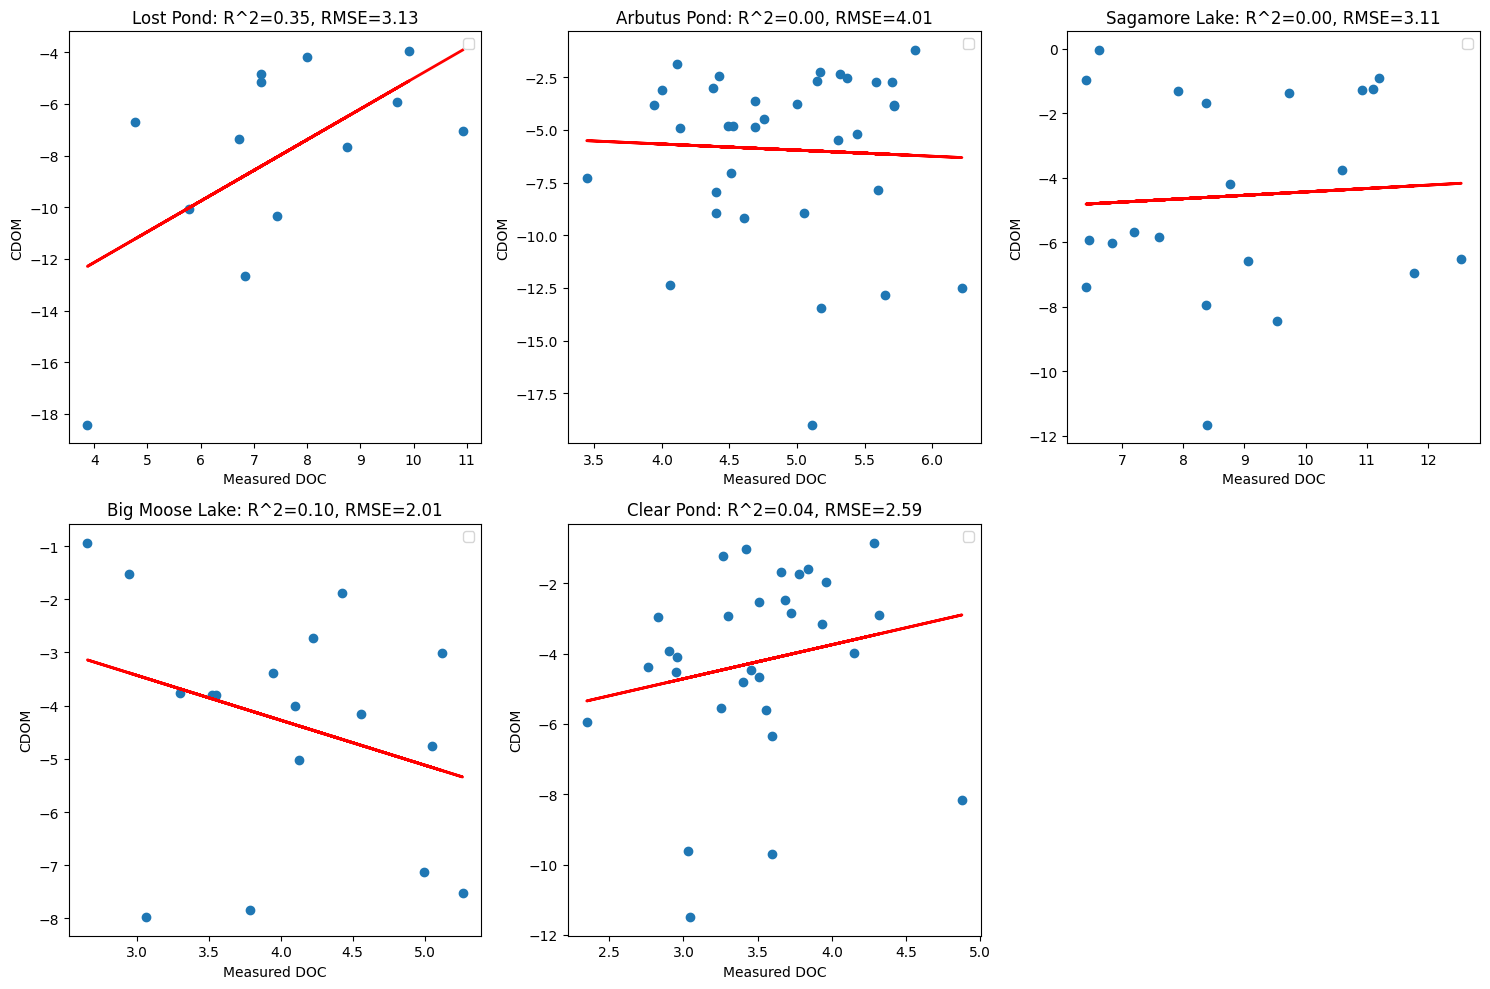

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'ln(a440)_equation5'  # Replace with the actual column name for aCDOM_485

# Create a list of lakes
lakes = ["Lost Pond", "Arbutus Pond", "Sagamore Lake", "Big Moose Lake", "Clear Pond"]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(lakes)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for all lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(lakes):
    # Filter the data for the current lake
    lake_data = merged_data[merged_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(len(lakes), num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

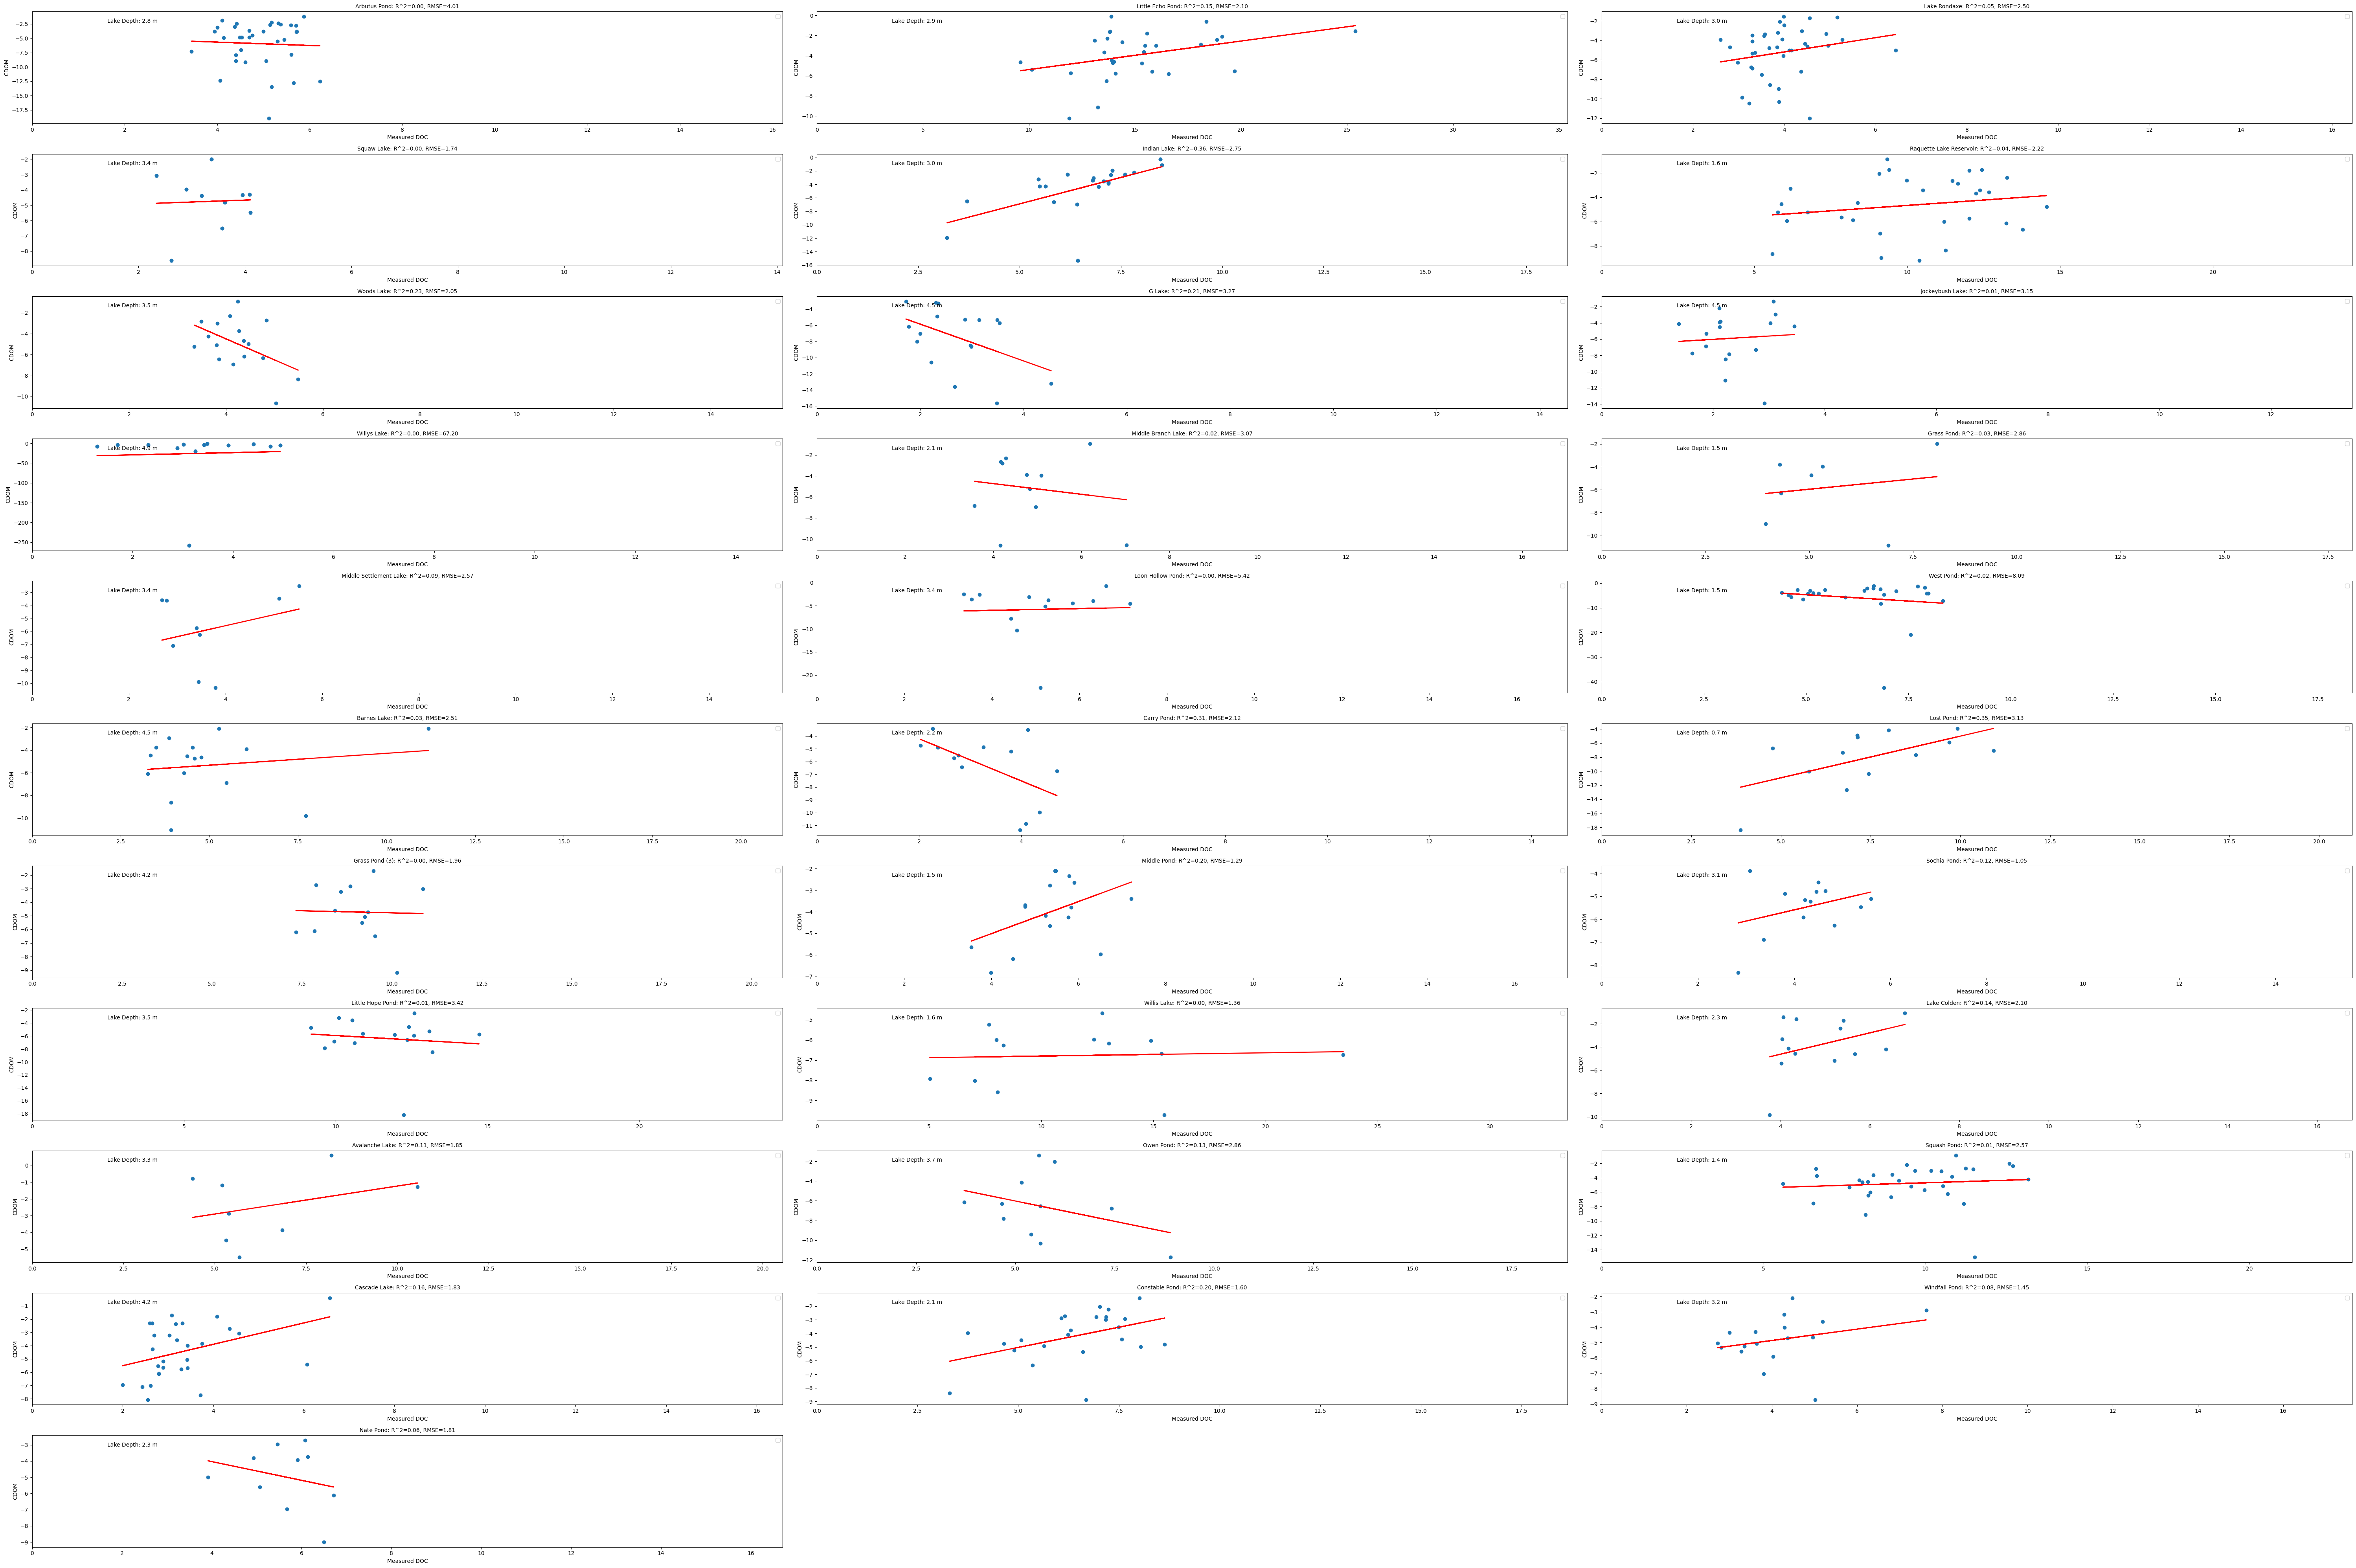

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'ln(a440)_equation5'  # Replace with the actual column name for aCDOM_485

# Filter data for lakes with LAKE_DEPTH (m) less than or equal to 5
filtered_data = merged_data[merged_data['LAKE_DEPTH_MEAN'] <= 5]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(filtered_data['SITE_NAME'].unique())
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for filtered lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(60, 40))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(filtered_data['SITE_NAME'].unique()):
    # Filter the data for the current lake
    lake_data = filtered_data[filtered_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}', fontsize=10)
        axes[i].set_xlim([0, max(X)[0] + 10])  # Adjust the x-axis limit
        axes[i].text(0.1, 0.9, f'Lake Depth: {lake_data["LAKE_DEPTH_MEAN"].values[0]:.1f} m',
                     transform=axes[i].transAxes, fontsize=10)
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(num_lakes, num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

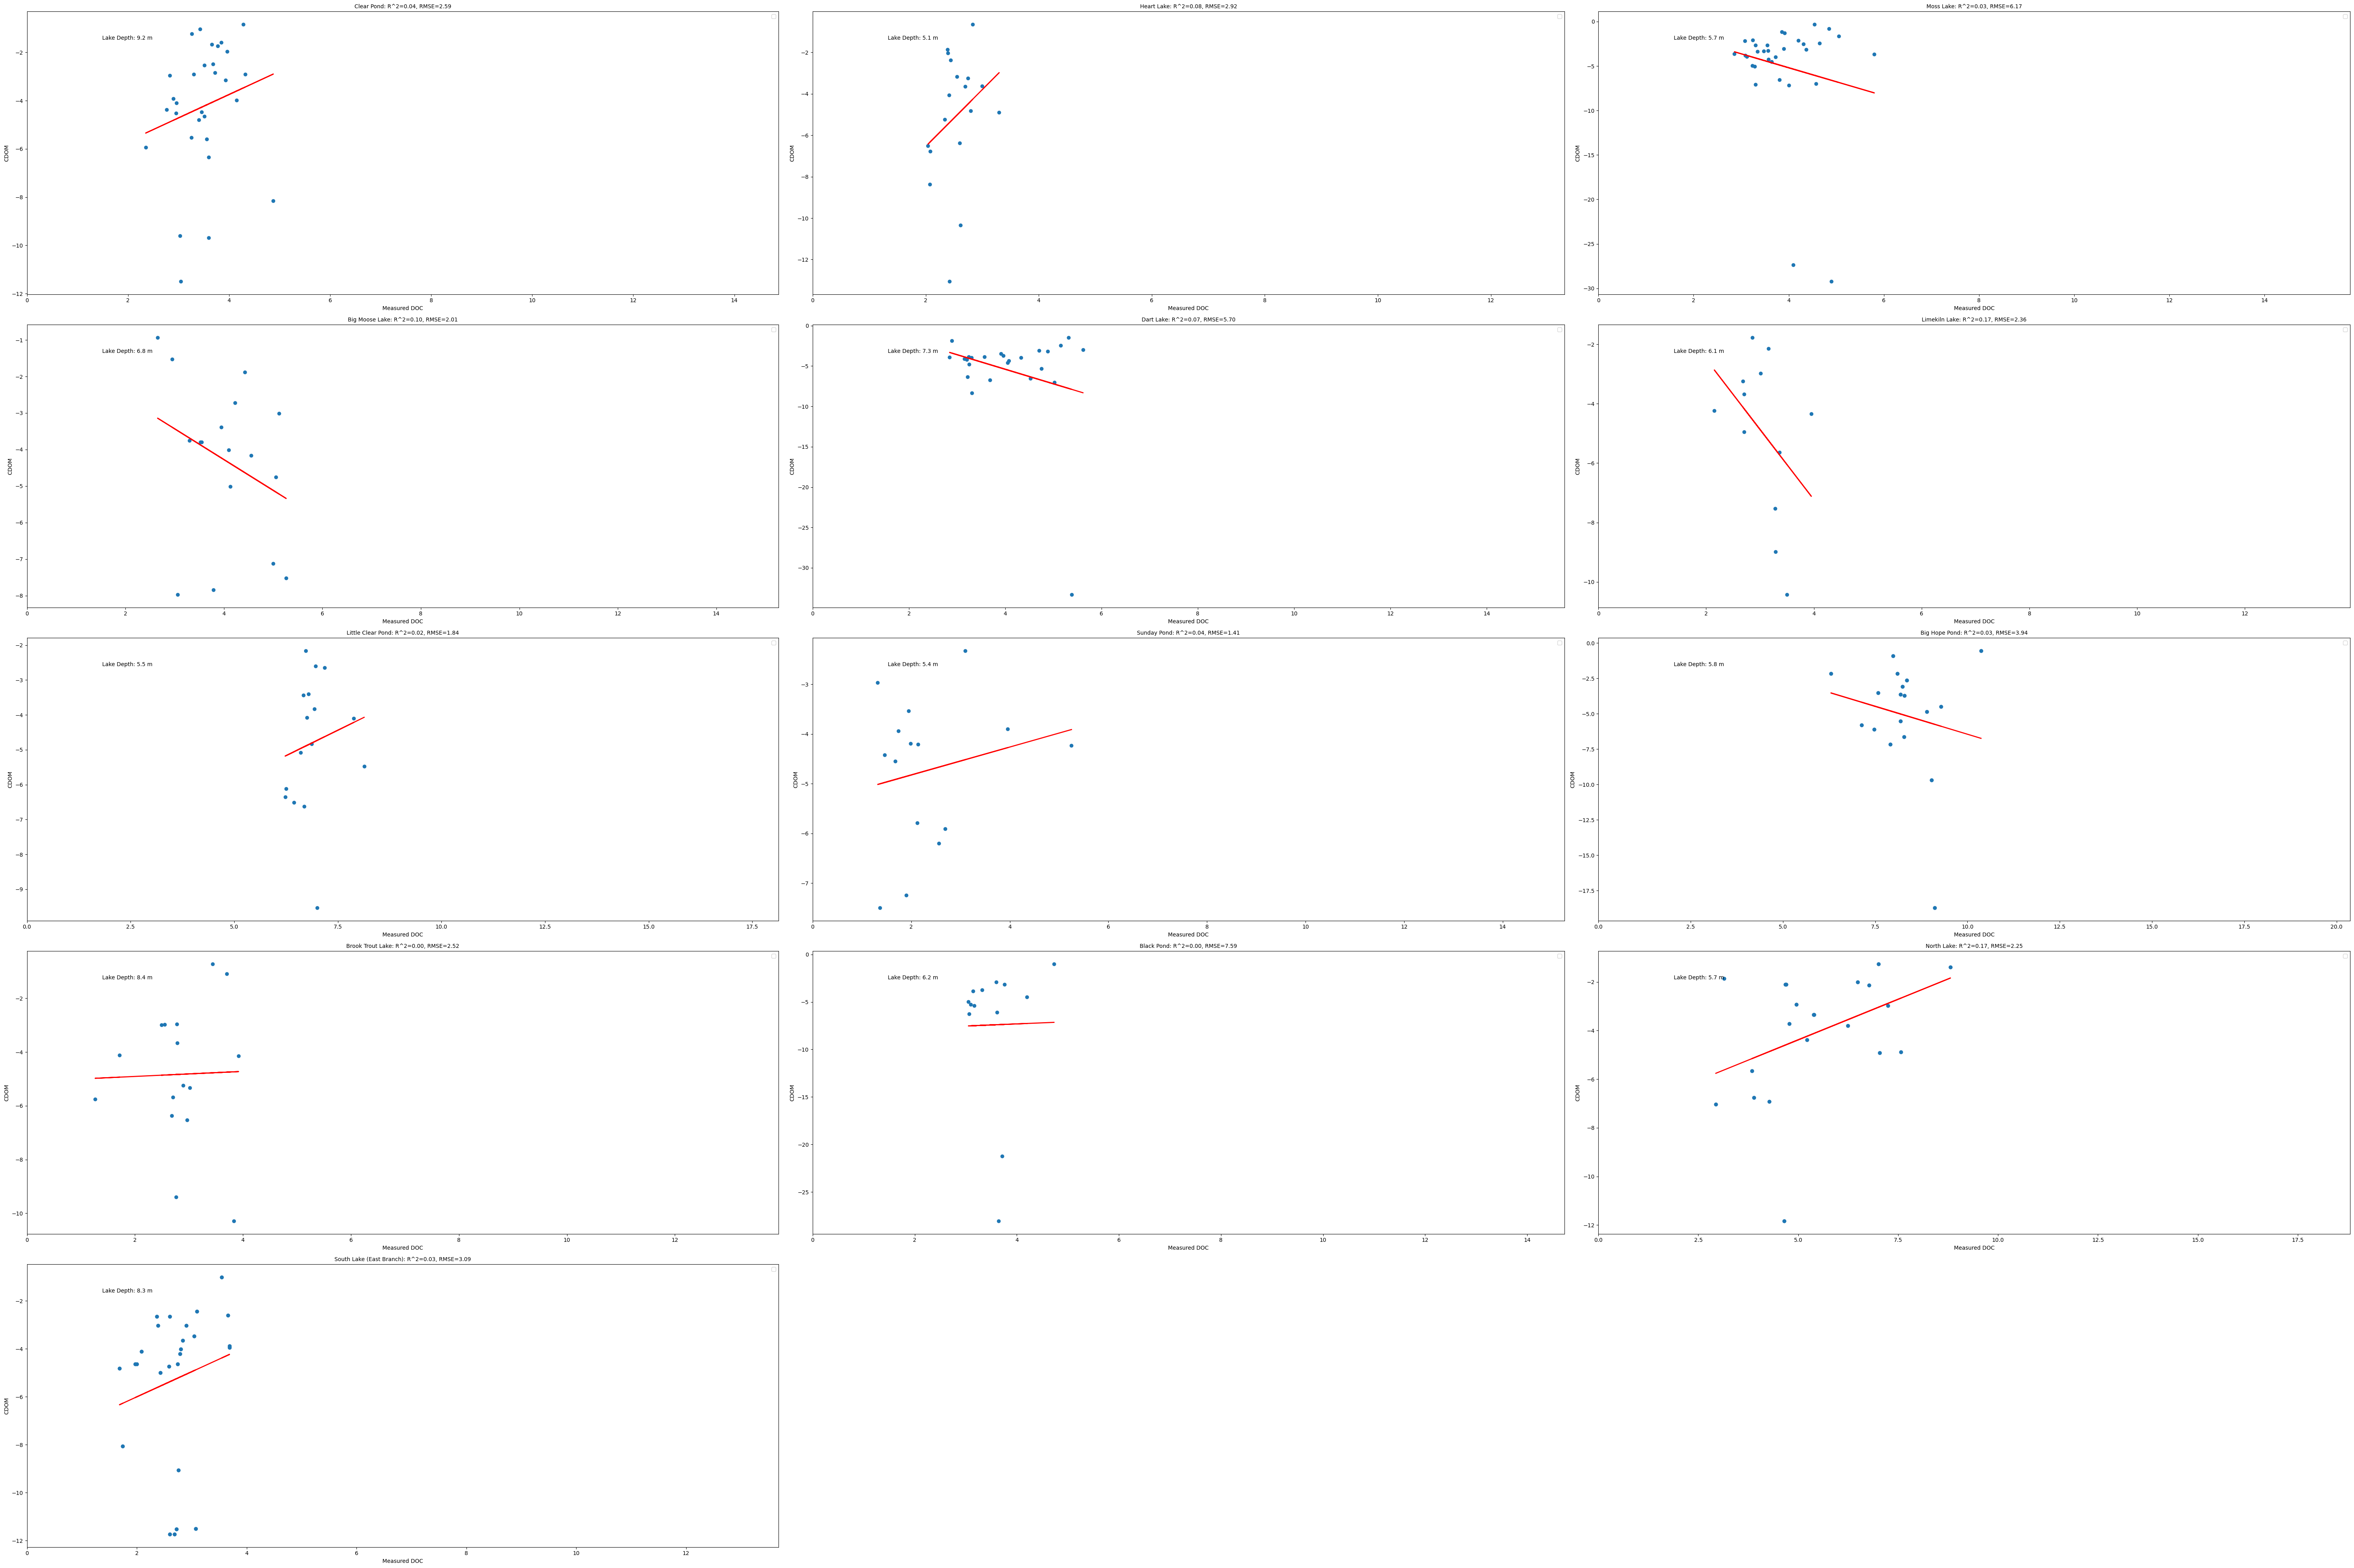

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'ln(a440)_equation5'  # Replace with the actual column name for aCDOM_485

# Filter data for lakes with LAKE_DEPTH (m) between 5 and 10
filtered_data = merged_data[(merged_data['LAKE_DEPTH_MEAN'] > 5) & (merged_data['LAKE_DEPTH_MEAN'] < 10)]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(filtered_data['SITE_NAME'].unique())
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for filtered lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(60, 40))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(filtered_data['SITE_NAME'].unique()):
    # Filter the data for the current lake
    lake_data = filtered_data[filtered_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}', fontsize=10)
        axes[i].set_xlim([0, max(X)[0] + 10])  # Adjust the x-axis limit
        axes[i].text(0.1, 0.9, f'Lake Depth: {lake_data["LAKE_DEPTH_MEAN"].values[0]:.1f} m',
                     transform=axes[i].transAxes, fontsize=10)
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(num_lakes, num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


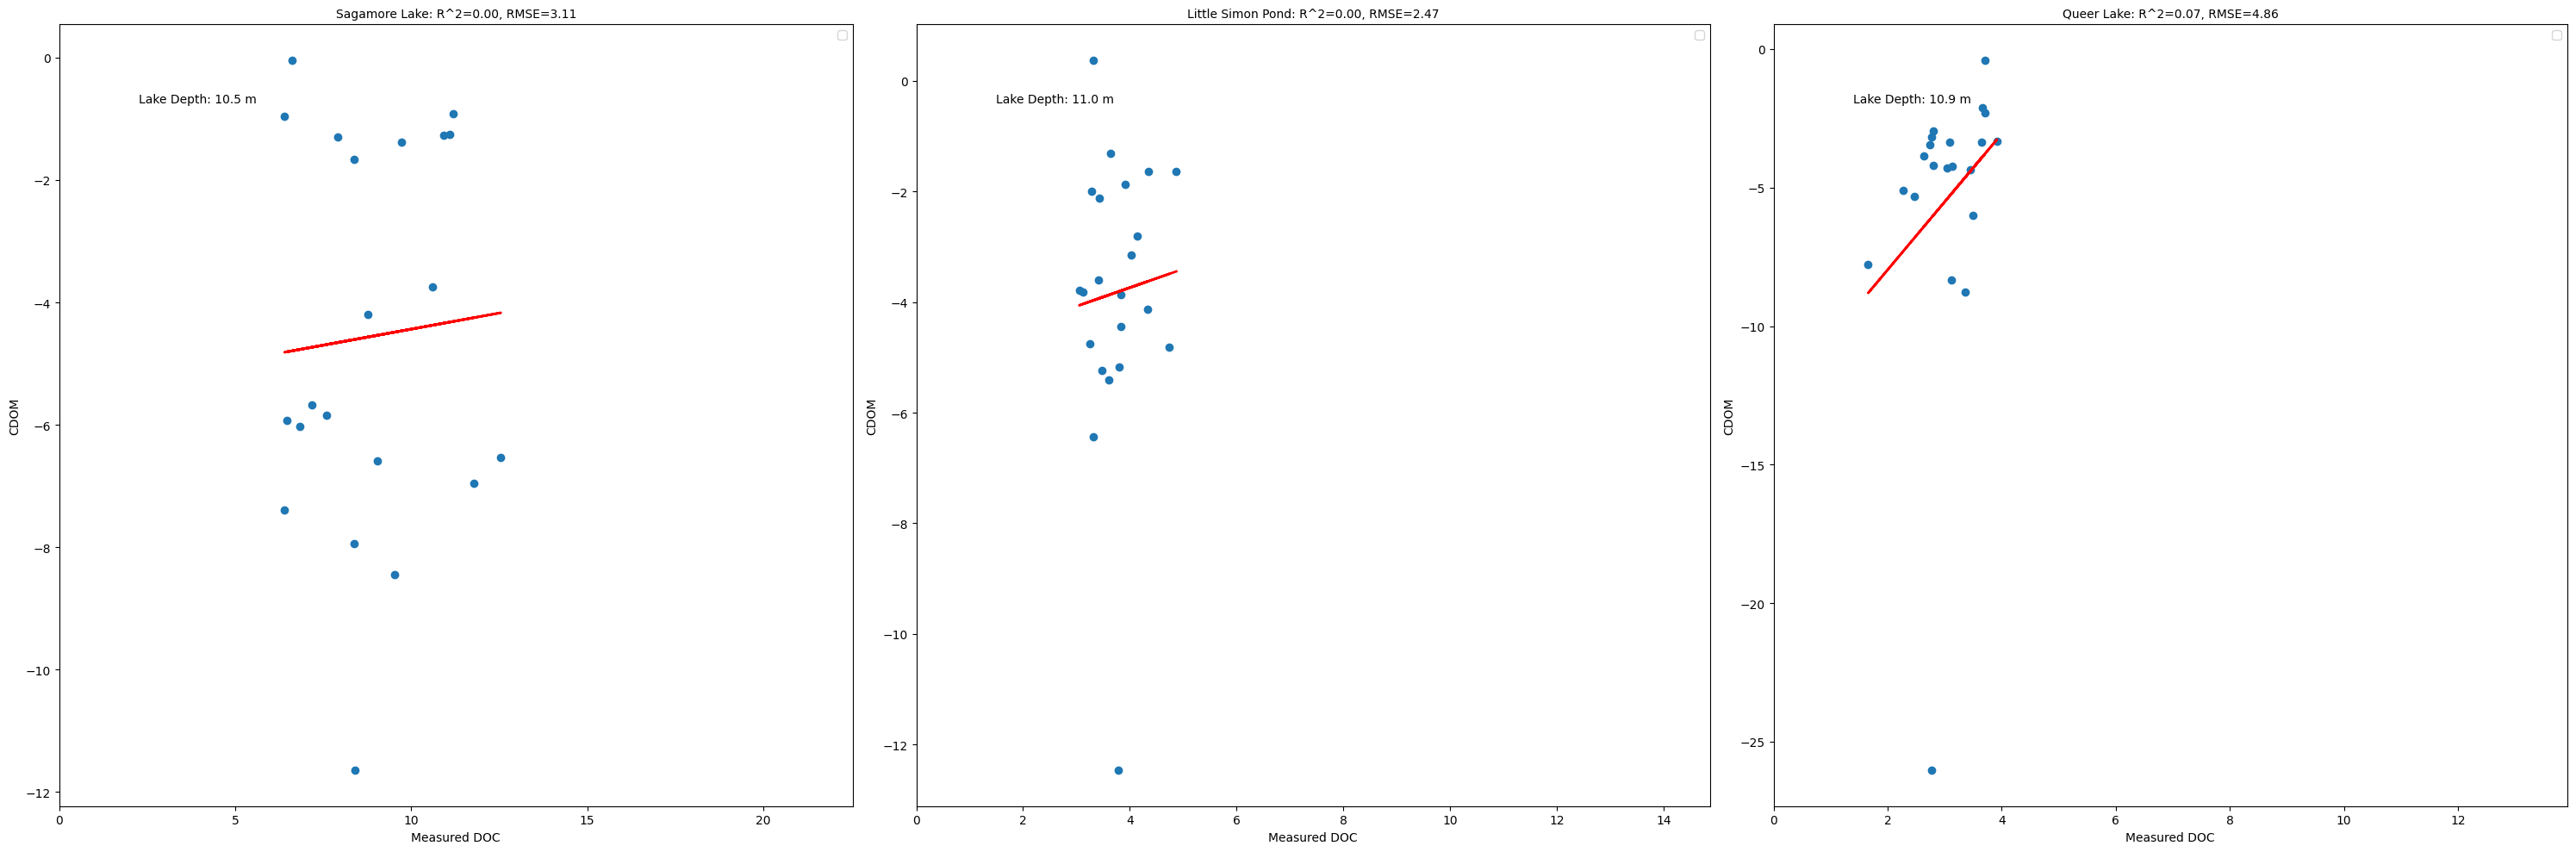

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'ln(a440)_equation5'  # Replace with the actual column name for aCDOM_485

# Filter data for lakes with LAKE_DEPTH (m) greater than 10
filtered_data = merged_data[merged_data['LAKE_DEPTH_MEAN'] > 10]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(filtered_data['SITE_NAME'].unique())
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for filtered lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 10))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(filtered_data['SITE_NAME'].unique()):
    # Filter the data for the current lake
    lake_data = filtered_data[filtered_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}', fontsize=10)
        axes[i].set_xlim([0, max(X)[0] + 10])  # Adjust the x-axis limit
        axes[i].text(0.1, 0.9, f'Lake Depth: {lake_data["LAKE_DEPTH_MEAN"].values[0]:.1f} m',
                     transform=axes[i].transAxes, fontsize=10)
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(num_lakes, num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


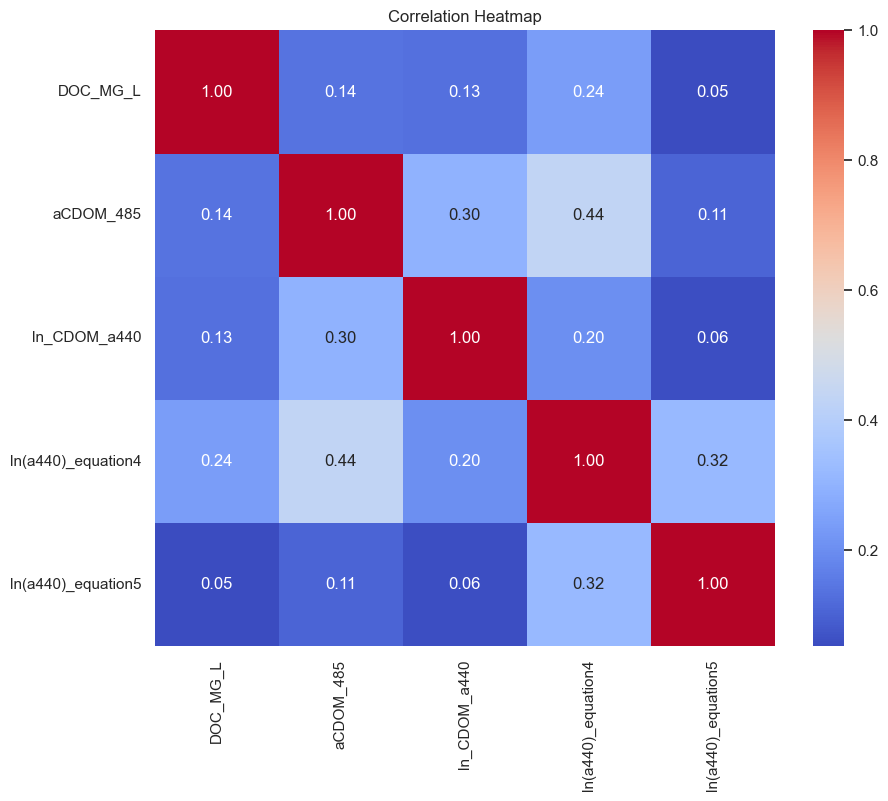

In [58]:
selected_columns = ['DOC_MG_L', 'aCDOM_485', 'ln_CDOM_a440', 'ln(a440)_equation4', 'ln(a440)_equation5']
data_subset = merged_data[selected_columns]
correlation_matrix = data_subset.corr()
# Set the figure size
plt.figure(figsize=(10, 8))

# Customize the heatmap using seaborn
sns.set(font_scale=1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()
